In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# This cell performs data processing or transformation
def transform(df):
    df['Coin'] = df['Coin'].str.lower().astype('category')
    df['Buy/Sell'] = df['Buy/Sell'].str.strip().str.lower().astype('category')
    df['Crossed'] = df['Crossed'].astype('bool')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'],format="%Y-%m-%d %H:%M:%S")
    df['TimeofDay'] = df['TimeofDay'].astype('category')
    df['Direction'] = df['Direction'].astype('category')
    df['Fear/Greed'] = df['Fear/Greed'].astype('category')
    df['Coin_Type'] = df['Coin_Type'].astype('category')
    df['TradeResult'] = df['TradeResult'].astype('category')
    df['DayOfWeek'] = df['DayOfWeek'].astype('category')
    return df

In [ ]:
df = transform(df)

# EDA


In [7]:
df = pd.read_csv('Final_df.csv')

In [8]:
df.describe()

Execution_Price   Size_Tokens  Total_Amount  Start_Position  \
count    211218.000000  2.112180e+05  2.112180e+05    2.112180e+05   
mean      11415.047529  4.623341e+03  5.639192e+03   -2.994671e+04   
std       29448.010305  1.042744e+05  3.657557e+04    6.738170e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.858550  2.940000e+00  1.937900e+02   -3.760725e+02   
50%          18.280000  3.200000e+01  5.970200e+02    8.477051e+01   
75%         101.895000  1.878900e+02  2.058878e+03    9.337697e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

                 PnL            Fee  Setinment_Index           Hour  
count  211218.000000  211218.000000    211218.000000  211218.000000  
mean       48.549304       1.163960        51.649656      11.680231  
std       917.989791       6.758948        21.012784       7.363048  
min   -117990.104100      -1.175712        10.000000       0.000000  
25%         0.000000       0.016121        33.000000       5.000000  
50%         0.000000       0.089572        49.000000      12.000000  
75%         5.790132       0.393774        72.000000      19.000000  
max    135329.090100     837.471593        94.000000      23.000000

In [9]:
# Display information about the DataFrame, including data types and missing values.
df.info()

# Display summary statistics for numerical columns.
display(df.describe())

# Identify the sentiment column (likely 'Setinment_Index') and its data type.
sentiment_column = 'Setinment_Index'
print(f"\nSentiment Column: {sentiment_column}, Data Type: {df[sentiment_column].dtype}")

# Categorize other columns based on data types.
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\nNumerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)
print("\nDatetime Columns:", datetime_cols)


# Analyze missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

rows_with_missing_values = df[df.isnull().any(axis=1)]
num_rows_with_missing_values = len(rows_with_missing_values)
print(f"\nNumber of rows with at least one missing value: {num_rows_with_missing_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User_Id          211218 non-null  object 
 1   Coin             211218 non-null  object 
 2   Execution_Price  211218 non-null  float64
 3   Size_Tokens      211218 non-null  float64
 4   Total_Amount     211218 non-null  float64
 5   Buy/Sell         211218 non-null  object 
 6   Timestamp        211218 non-null  object 
 7   TimeofDay        211218 non-null  object 
 8   Start_Position   211218 non-null  float64
 9   Direction        211218 non-null  object 
 10  PnL              211218 non-null  float64
 11  Crossed          211218 non-null  bool   
 12  Fee              211218 non-null  float64
 13  Date             211218 non-null  object 
 14  Setinment_Index  211218 non-null  int64  
 15  Fear/Greed       211218 non-null  object 
 16  Coin_Type        211218 non-null  obje

Execution_Price   Size_Tokens  Total_Amount  Start_Position  \
count    211218.000000  2.112180e+05  2.112180e+05    2.112180e+05   
mean      11415.047529  4.623341e+03  5.639192e+03   -2.994671e+04   
std       29448.010305  1.042744e+05  3.657557e+04    6.738170e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.858550  2.940000e+00  1.937900e+02   -3.760725e+02   
50%          18.280000  3.200000e+01  5.970200e+02    8.477051e+01   
75%         101.895000  1.878900e+02  2.058878e+03    9.337697e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

                 PnL            Fee  Setinment_Index           Hour  
count  211218.000000  211218.000000    211218.000000  211218.000000  
mean       48.549304       1.163960        51.649656      11.680231  
std       917.989791       6.758948        21.012784       7.363048  
min   -117990.104100      -1.175712        10.000000       0.000000  
25%         0.000000       0.016121        33.000000       5.000000  
50%         0.000000       0.089572        49.000000      12.000000  
75%         5.790132       0.393774        72.000000      19.000000  
max    135329.090100     837.471593        94.000000      23.000000


Sentiment Column: Setinment_Index, Data Type: int64

Numerical Columns: ['Execution_Price', 'Size_Tokens', 'Total_Amount', 'Start_Position', 'PnL', 'Fee', 'Setinment_Index', 'Hour']

Categorical Columns: ['User_Id', 'Coin', 'Buy/Sell', 'Timestamp', 'TimeofDay', 'Direction', 'Date', 'Fear/Greed', 'Coin_Type', 'TradeResult', 'DayOfWeek']

Datetime Columns: []

Missing Values:
 User_Id            0
Coin               0
Execution_Price    0
Size_Tokens        0
Total_Amount       0
Buy/Sell           0
Timestamp          0
TimeofDay          0
Start_Position     0
Direction          0
PnL                0
Crossed            0
Fee                0
Date               0
Setinment_Index    0
Fear/Greed         0
Coin_Type          0
TradeResult        0
Hour               0
DayOfWeek          0
dtype: int64

Missing Value Percentage:
 User_Id            0.0
Coin               0.0
Execution_Price    0.0
Size_Tokens        0.0
Total_Amount       0.0
Buy/Sell           0.0
Timestamp          0.0

In [11]:
# Check for inconsistencies in numerical columns.
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numerical_cols:
    print(f"Column: {col}")
    print(df[col].describe())
    print(f"Unique Values: {df[col].nunique()}")
    print("-" * 20)

# Check for inconsistencies in categorical columns.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print("-" * 20)

# Check for inconsistencies in the datetime columns (if any exist)
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
for col in datetime_cols:
    print(f"Column: {col}")
    print(f"Min Date: {df[col].min()}")
    print(f"Max Date: {df[col].max()}")
    print("-" * 20)

Column: Execution_Price
count    211218.000000
mean      11415.047529
std       29448.010305
min           0.000005
25%           4.858550
50%          18.280000
75%         101.895000
max      109004.000000
Name: Execution_Price, dtype: float64
Unique Values: 60160
--------------------
Column: Size_Tokens
count    2.112180e+05
mean     4.623341e+03
std      1.042744e+05
min      8.740000e-07
25%      2.940000e+00
50%      3.200000e+01
75%      1.878900e+02
max      1.582244e+07
Name: Size_Tokens, dtype: float64
Unique Values: 59300
--------------------
Column: Total_Amount
count    2.112180e+05
mean     5.639192e+03
std      3.657557e+04
min      0.000000e+00
25%      1.937900e+02
50%      5.970200e+02
75%      2.058878e+03
max      3.921431e+06
Name: Total_Amount, dtype: float64
Unique Values: 118488
--------------------
Column: Start_Position
count    2.112180e+05
mean    -2.994671e+04
std      6.738170e+05
min     -1.433463e+07
25%     -3.760725e+02
50%      8.477051e+01
75%      9

In [16]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['User_Id']= label_encoder.fit_transform(df['User_Id'])

df['User_Id'].unique()

array([25, 16, 13,  0,  9, 20, 12, 17,  8, 27,  1, 14, 29, 26,  5, 23, 21,
       19, 10,  7,  3,  6, 18, 24, 28,  4, 31, 11, 22, 30,  2, 15])

# Task
Generate correlation heatmaps for numerical columns for each unique value in the 'Direction' column using data from "/content/merged_df.xls".

## Filter by direction

### Subtask:
Create separate DataFrames for each unique value in the 'Direction' column.


**Reasoning**:
Create separate dataframes for each unique value in the 'Direction' column.



In [17]:
unique_directions = df['Direction'].unique()

direction_dfs = {}
for direction in unique_directions:
    df_name = direction.replace(' ', '_') + '_df'
    direction_dfs[df_name] = df[df['Direction'] == direction].copy()


## Calculate correlation matrices

### Subtask:
For each filtered DataFrame, calculate the correlation matrix for all numerical columns.


**Reasoning**:
Calculate the correlation matrix for numerical columns in each filtered DataFrame and store them.



In [18]:
correlation_matrices = {}
for df_name, temp in direction_dfs.items():
    numerical_cols = temp.select_dtypes(include=['number']).columns.tolist()
    correlation_matrices[df_name] = temp[numerical_cols].corr()

for df_name, corr_matrix in correlation_matrices.items():
    print(f"Correlation Matrix for {df_name}:")
    display(corr_matrix)
    print("-" * 30)

Correlation Matrix for open_long_df:


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.193225    -0.017173     -0.058718   
Execution_Price -0.193225         1.000000    -0.016465      0.161936   
Size_Tokens     -0.017173        -0.016465     1.000000      0.018254   
Total_Amount    -0.058718         0.161936     0.018254      1.000000   
Start_Position   0.026575        -0.081717     0.248015     -0.014734   
PnL                   NaN              NaN          NaN           NaN   
Fee             -0.074197         0.190022     0.016717      0.694225   
Setinment_Index -0.290452         0.021192     0.024117     -0.019591   
Hour             0.015353         0.064838     0.009135      0.008242   

                 Start_Position  PnL       Fee  Setinment_Index      Hour  
User_Id                0.026575  NaN -0.074197        -0.290452  0.015353  
Execution_Price       -0.081717  NaN  0.190022         0.021192  0.064838  
Size_Tokens            0.248015  NaN  0.016717         0.024117  0.009135  
Total_Amount          -0.014734  NaN  0.694225        -0.019591  0.008242  
Start_Position         1.000000  NaN  0.001360        -0.042986 -0.037144  
PnL                         NaN  NaN       NaN              NaN       NaN  
Fee                    0.001360  NaN  1.000000        -0.011261 -0.002109  
Setinment_Index       -0.042986  NaN -0.011261         1.000000  0.018685  
Hour                  -0.037144  NaN -0.002109         0.018685  1.000000

------------------------------
Correlation Matrix for close_long_df:


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.177385    -0.035202     -0.044006   
Execution_Price -0.177385         1.000000    -0.021459      0.198272   
Size_Tokens     -0.035202        -0.021459     1.000000      0.005288   
Total_Amount    -0.044006         0.198272     0.005288      1.000000   
Start_Position  -0.071259        -0.066098     0.372496     -0.015182   
PnL              0.000437         0.006917     0.017710      0.251881   
Fee             -0.048897         0.225185     0.001614      0.739867   
Setinment_Index -0.201322        -0.047433     0.038538     -0.030594   
Hour             0.110736        -0.013528     0.017276      0.007219   

                 Start_Position       PnL       Fee  Setinment_Index      Hour  
User_Id               -0.071259  0.000437 -0.048897        -0.201322  0.110736  
Execution_Price       -0.066098  0.006917  0.225185        -0.047433 -0.013528  
Size_Tokens            0.372496  0.017710  0.001614         0.038538  0.017276  
Total_Amount          -0.015182  0.251881  0.739867        -0.030594  0.007219  
Start_Position         1.000000  0.001019 -0.018952         0.017683  0.024653  
PnL                    0.001019  1.000000  0.201549         0.051555  0.010203  
Fee                   -0.018952  0.201549  1.000000        -0.029500  0.006114  
Setinment_Index        0.017683  0.051555 -0.029500         1.000000  0.002525  
Hour                   0.024653  0.010203  0.006114         0.002525  1.000000

------------------------------
Correlation Matrix for open_short_df:


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.113605     0.006156     -0.054484   
Execution_Price -0.113605         1.000000    -0.013813      0.258121   
Size_Tokens      0.006156        -0.013813     1.000000      0.027581   
Total_Amount    -0.054484         0.258121     0.027581      1.000000   
Start_Position  -0.022747         0.050376     0.071178      0.019435   
PnL                   NaN              NaN          NaN           NaN   
Fee             -0.026512         0.302887     0.004609      0.843448   
Setinment_Index -0.118555        -0.057926     0.010751     -0.038478   
Hour            -0.006987        -0.045817     0.007277     -0.016098   

                 Start_Position  PnL       Fee  Setinment_Index      Hour  
User_Id               -0.022747  NaN -0.026512        -0.118555 -0.006987  
Execution_Price        0.050376  NaN  0.302887        -0.057926 -0.045817  
Size_Tokens            0.071178  NaN  0.004609         0.010751  0.007277  
Total_Amount           0.019435  NaN  0.843448        -0.038478 -0.016098  
Start_Position         1.000000  NaN  0.018376        -0.006135  0.010144  
PnL                         NaN  NaN       NaN              NaN       NaN  
Fee                    0.018376  NaN  1.000000        -0.042651 -0.017666  
Setinment_Index       -0.006135  NaN -0.042651         1.000000 -0.014390  
Hour                   0.010144  NaN -0.017666        -0.014390  1.000000

------------------------------
Correlation Matrix for close_short_df:


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.077255     0.002686     -0.044383   
Execution_Price -0.077255         1.000000    -0.027228      0.216346   
Size_Tokens      0.002686        -0.027228     1.000000      0.006545   
Total_Amount    -0.044383         0.216346     0.006545      1.000000   
Start_Position  -0.039806         0.071924    -0.206035      0.027956   
PnL             -0.036319        -0.017374     0.008656      0.104719   
Fee             -0.033243         0.275576    -0.004671      0.837298   
Setinment_Index -0.113905        -0.008885     0.031299     -0.037879   
Hour             0.000151        -0.035917     0.017186     -0.027142   

                 Start_Position       PnL       Fee  Setinment_Index      Hour  
User_Id               -0.039806 -0.036319 -0.033243        -0.113905  0.000151  
Execution_Price        0.071924 -0.017374  0.275576        -0.008885 -0.035917  
Size_Tokens           -0.206035  0.008656 -0.004671         0.031299  0.017186  
Total_Amount           0.027956  0.104719  0.837298        -0.037879 -0.027142  
Start_Position         1.000000  0.008867  0.033940        -0.100399  0.016598  
PnL                    0.008867  1.000000  0.039050        -0.029036 -0.022094  
Fee                    0.033940  0.039050  1.000000        -0.034285 -0.031129  
Setinment_Index       -0.100399 -0.029036 -0.034285         1.000000 -0.019573  
Hour                   0.016598 -0.022094 -0.031129        -0.019573  1.000000

------------------------------


# Task
Analyze the relationship between sentiment and other columns in the dataset from "merged_df.xls", visualize these relationships, calculate and visualize the average profit and loss at different times of the day, and generate correlation heatmaps for numerical columns within each 'Direction' category, excluding 'PnL' for 'open long' and 'open short'.

## Analyze average profit and loss

### Subtask:
Calculate and visualize the average profit and loss at different times of the day.


**Reasoning**:
Filter the DataFrame to get profitable and losing trades, then calculate the average PnL for each group based on 'TimeofDay', and finally visualize the results.



## Generate correlation heatmaps by direction

### Subtask:
For each filtered DataFrame, generate a correlation heatmap for all numerical columns, excluding 'PnL' for 'open long' and 'open short' dataframes.


**Reasoning**:
Iterate through the filtered dataframes, select numerical columns, exclude 'PnL' for 'open long' and 'open short' dataframes, calculate correlation matrices, and generate heatmaps.



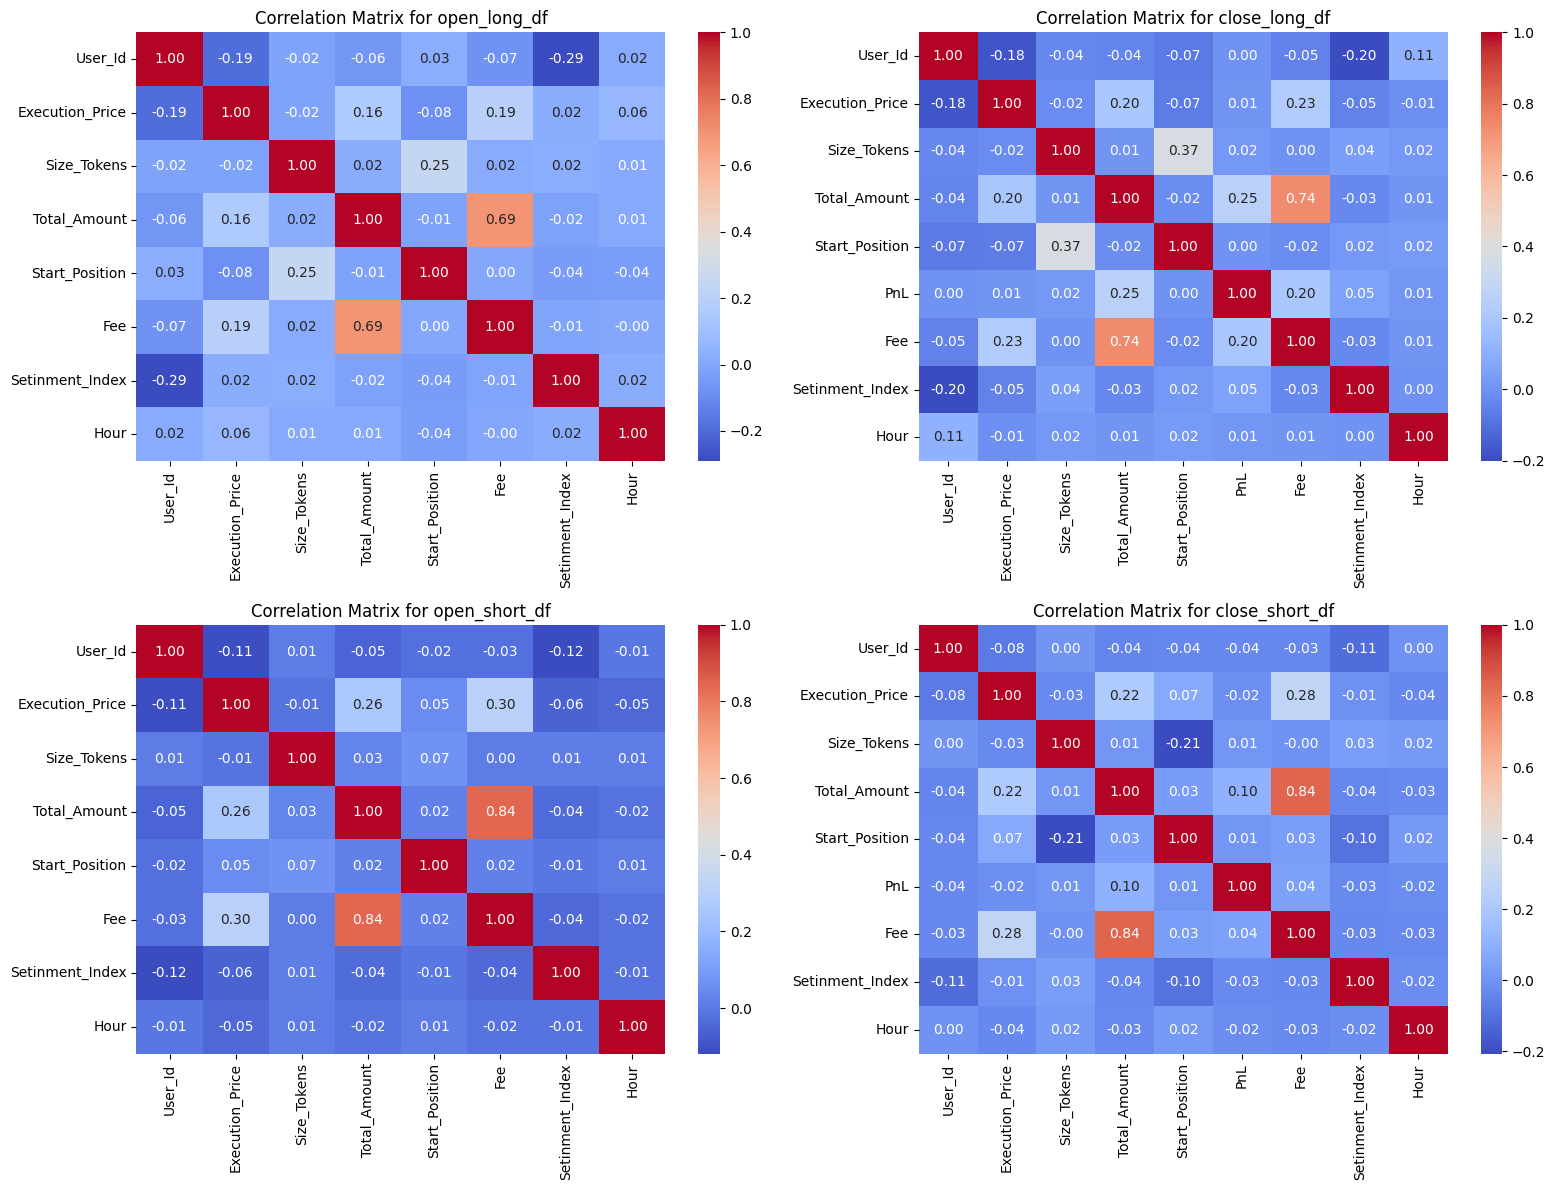

In [19]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Flatten the 2x2 array to easily iterate

directions = list(direction_dfs.keys())

for i, df_name in enumerate(directions):
    df = direction_dfs[df_name]
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Exclude 'PnL' for 'open long' and 'open short' dataframes
    if df_name in ['open_long_df', 'open_short_df'] and 'PnL' in numerical_cols:
        numerical_cols.remove('PnL')

    correlation_matrix = df[numerical_cols].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for {df_name}')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The average profit varies across different times of the day, with some times showing higher average profits than others.
*   Similarly, the average loss also varies across different times of the day, indicating certain times might be associated with larger losses.
*   Correlation heatmaps were generated for each trading direction (open long, open short, close long, close short).
*   For 'open long' and 'open short' trades, the correlation between numerical features was analyzed without including 'PnL'.

### Insights or Next Steps

*   Further investigate the times of day with the highest average profits and losses to understand potential underlying factors.
*   Analyze the correlation heatmaps for each direction to identify any strong relationships between numerical features that could inform trading strategies.


/tmp/ipython-input-20-3072636172.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_profit_by_timeofday.index, y=average_profit_by_timeofday.values, palette='viridis', ax=axes[0])
/tmp/ipython-input-20-3072636172.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loss_by_timeofday.index, y=average_loss_by_timeofday.values, palette='plasma', ax=axes[1])


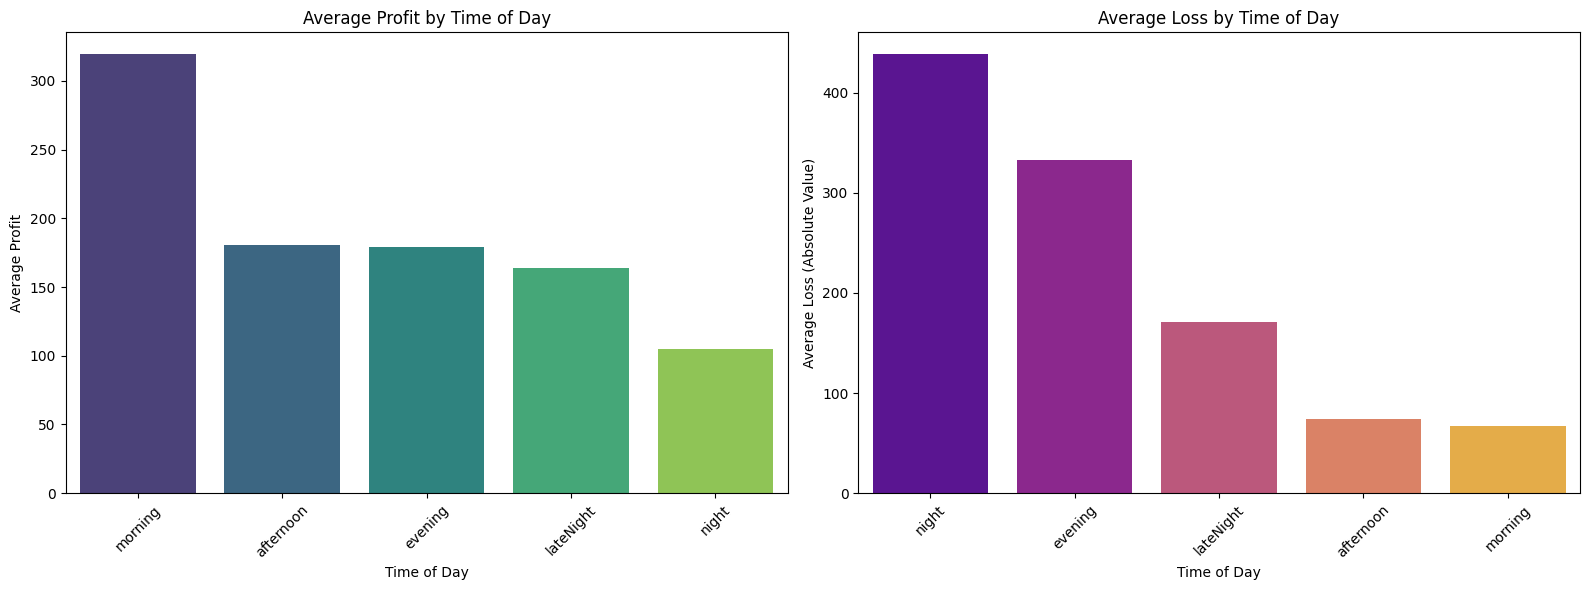

In [20]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0]

# Calculate the average profit for each TimeofDay
average_profit_by_timeofday = profitable_trades.groupby('TimeofDay')['PnL'].mean().sort_values(ascending=False)

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0]

# Calculate the average loss (absolute value) for each TimeofDay
average_loss_by_timeofday = losing_trades.groupby('TimeofDay')['PnL'].mean().abs().sort_values(ascending=False)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for average profit
sns.barplot(x=average_profit_by_timeofday.index, y=average_profit_by_timeofday.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Profit by Time of Day')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for average loss
sns.barplot(x=average_loss_by_timeofday.index, y=average_loss_by_timeofday.values, palette='plasma', ax=axes[1])
axes[1].set_title('Average Loss by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

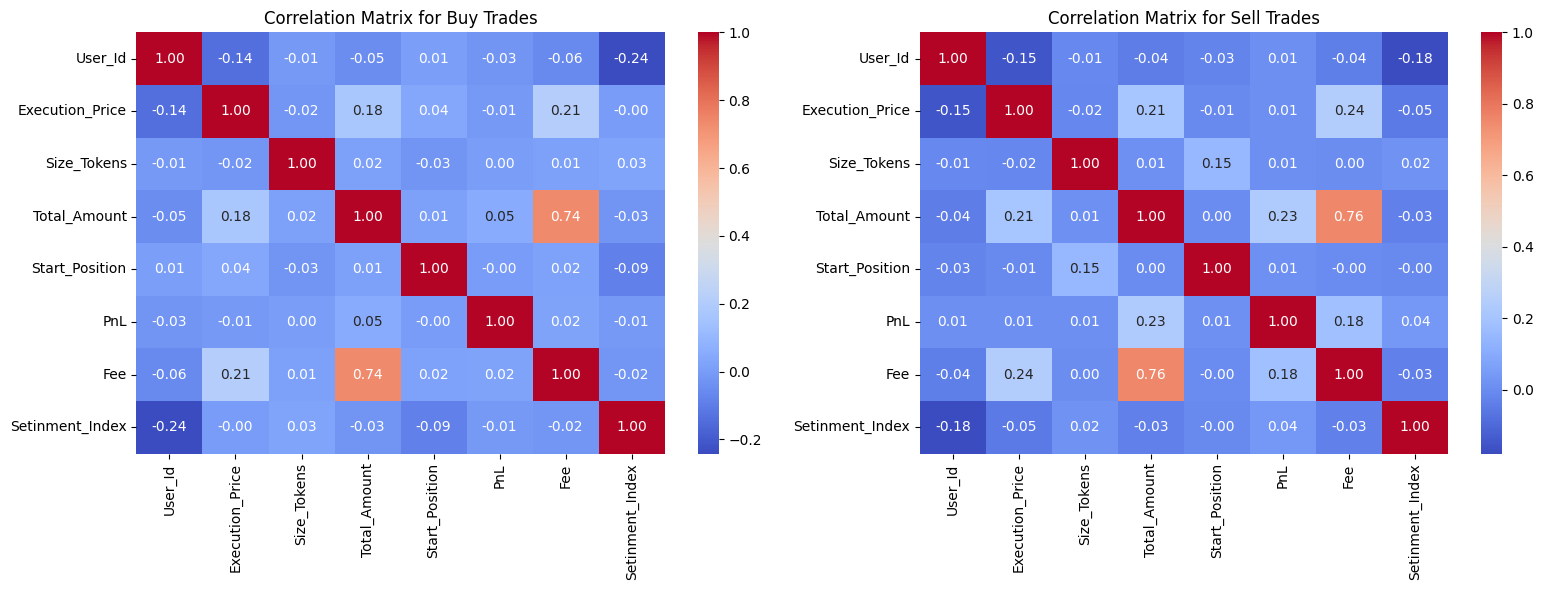

In [ ]:
# Filter the DataFrame for rows where 'Buy/Sell' is 'buy'
buy_trades_df = df[df['Buy/Sell'] == 'buy']

# Filter the DataFrame for rows where 'Buy/Sell' is 'sell'
sell_trades_df = df[df['Buy/Sell'] == 'sell']

# Select only numerical columns for each filtered DataFrame
numerical_cols_buy = buy_trades_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols_sell = sell_trades_df.select_dtypes(include=['number']).columns.tolist()


# Calculate the correlation matrix for each filtered data
buy_correlation_matrix = buy_trades_df[numerical_cols_buy].corr()
sell_correlation_matrix = sell_trades_df[numerical_cols_sell].corr()


# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualize the correlation matrix for buy trades
sns.heatmap(buy_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix for Buy Trades')

# Visualize the correlation matrix for sell trades
sns.heatmap(sell_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix for Sell Trades')

plt.tight_layout()
plt.show()

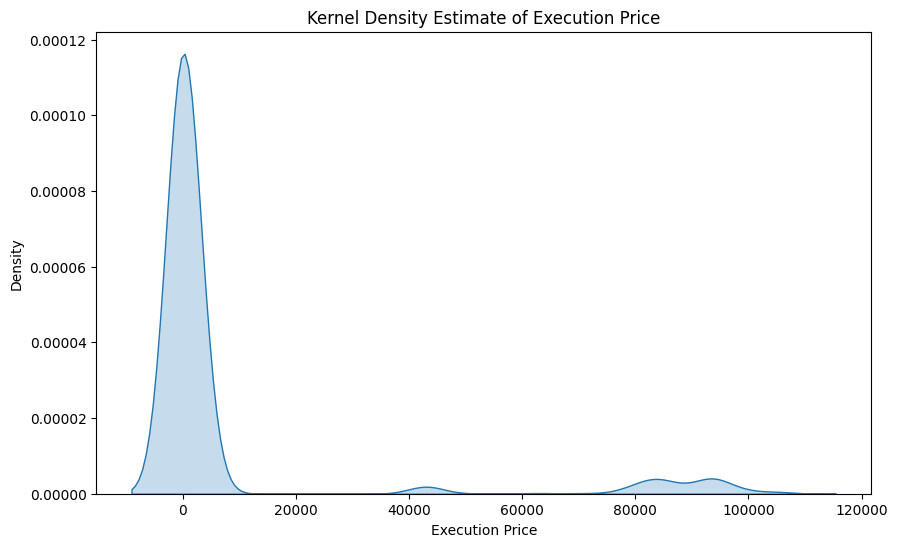

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Execution_Price'], fill=True)
plt.title('Kernel Density Estimate of Execution Price')
plt.xlabel('Execution Price')
plt.ylabel('Density')
plt.show()

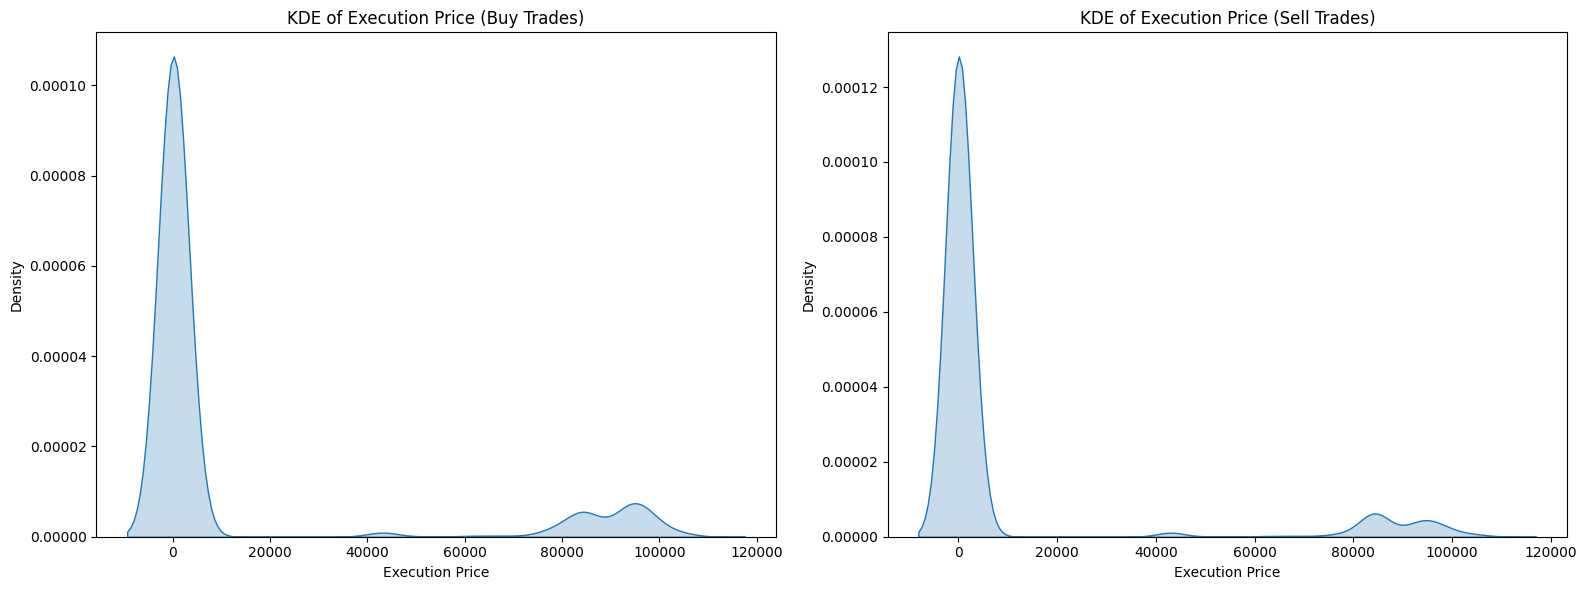

In [ ]:
# Filter data for buy and sell trades
buy_trades_df = df[df['Buy/Sell'] == 'buy']
sell_trades_df = df[df['Buy/Sell'] == 'sell']

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for Execution_Price during buy trades
sns.kdeplot(buy_trades_df['Execution_Price'], fill=True, ax=axes[0])
axes[0].set_title('KDE of Execution Price (Buy Trades)')
axes[0].set_xlabel('Execution Price')
axes[0].set_ylabel('Density')

# KDE plot for Execution_Price during sell trades
sns.kdeplot(sell_trades_df['Execution_Price'], fill=True, ax=axes[1])
axes[1].set_title('KDE of Execution Price (Sell Trades)')
axes[1].set_xlabel('Execution Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

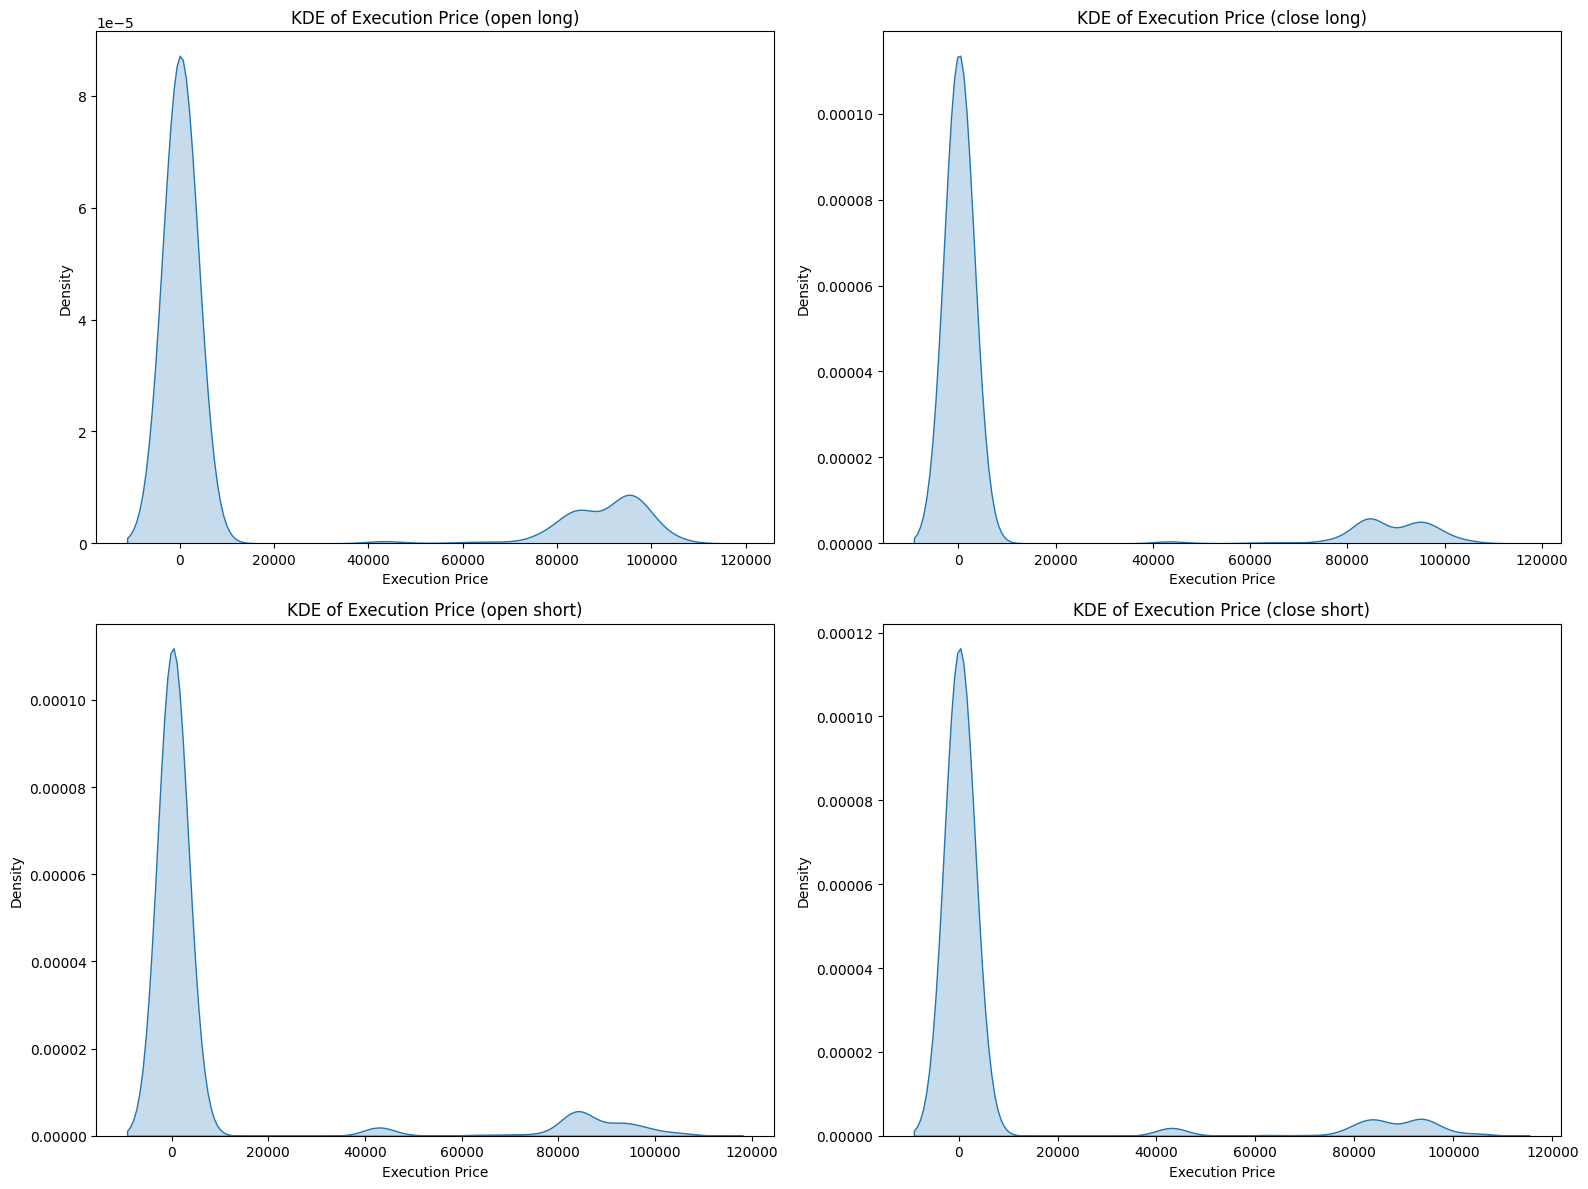

In [ ]:
# Get unique directions
unique_directions = df['Direction'].unique()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Flatten the 2x2 array to easily iterate

for i, direction in enumerate(unique_directions):
    # Filter data for the current direction
    direction_df = df[df['Direction'] == direction]

    # KDE plot for Execution_Price for the current direction
    sns.kdeplot(direction_df['Execution_Price'], fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of Execution Price ({direction})')
    axes[i].set_xlabel('Execution Price')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

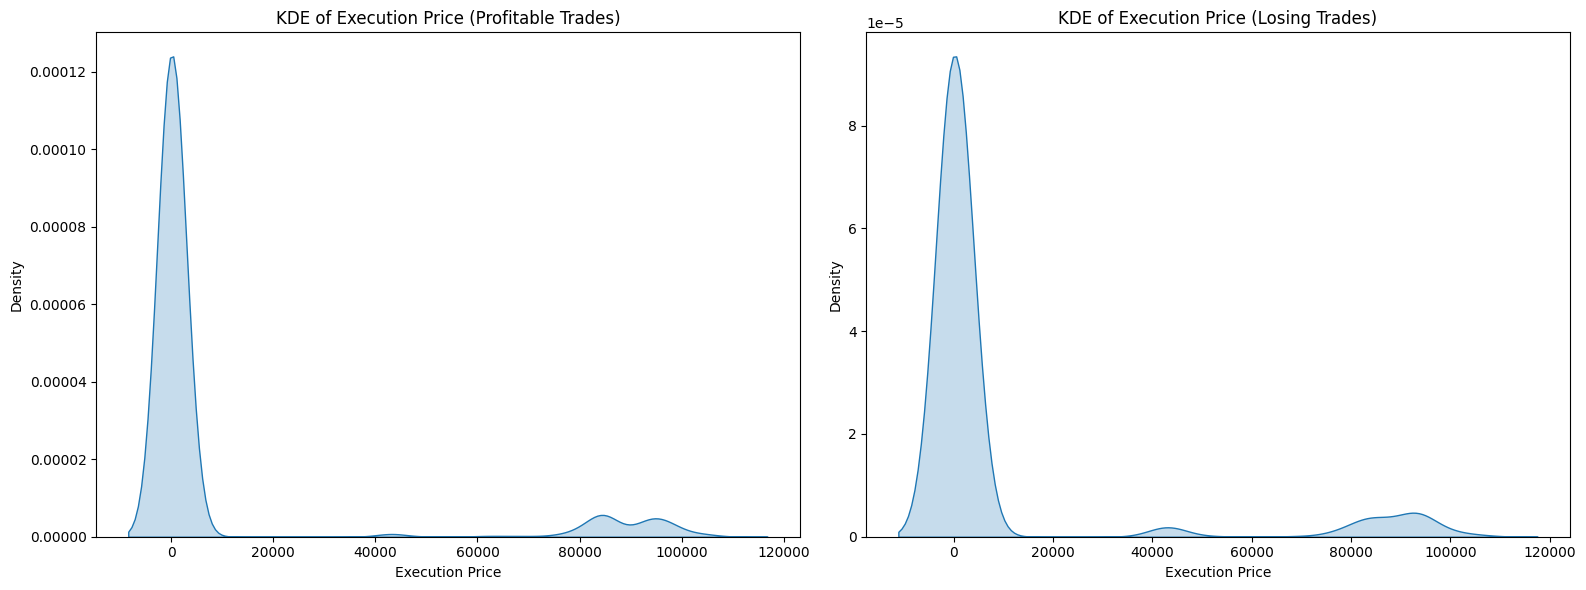

In [ ]:
# Filter data for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0]

# Filter data for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0]

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for Execution_Price during profitable trades
sns.kdeplot(profitable_trades['Execution_Price'], fill=True, ax=axes[0])
axes[0].set_title('KDE of Execution Price (Profitable Trades)')
axes[0].set_xlabel('Execution Price')
axes[0].set_ylabel('Density')

# KDE plot for Execution_Price during losing trades
sns.kdeplot(losing_trades['Execution_Price'], fill=True, ax=axes[1])
axes[1].set_title('KDE of Execution Price (Losing Trades)')
axes[1].set_xlabel('Execution Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

count     36057.000000
mean       8041.193519
std       24531.820521
min           0.002185
25%           0.730830
50%          13.615000
75%          27.925000
max      106461.000000
Name: Execution_Price, dtype: float64

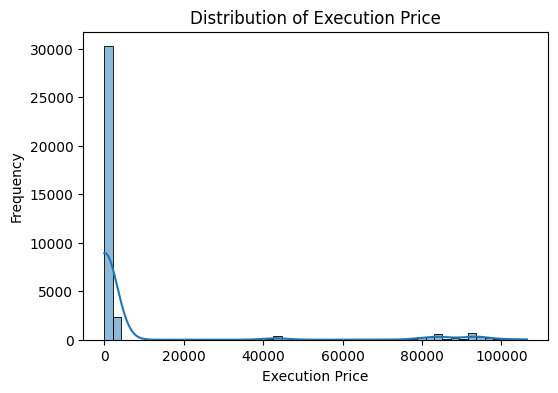


Example thresholds based on quartiles:
Penny (<= 0.73)
Moderate (> 0.73 and <= 27.93)
Expensive (> 27.93)

Distribution of Coin Types:
Coin_Type
moderate     18028
penny         9015
expensive     9014
Name: count, dtype: int64


User_Id   Coin  Execution_Price  Size_Tokens  Total_Amount Buy/Sell  \
722       16  eigen            2.912         7.62         22.19      buy   
723       16  eigen            2.912       211.24        615.13      buy   
724       16  eigen            2.912        76.39        222.45      buy   
725       16  eigen            2.912       778.26       2266.29      buy   
726       16  eigen            2.912      6926.49      20169.94      buy   

               Timestamp TimeofDay  Start_Position    Direction          PnL  \
722  2024-10-25 23:40:00     night       -40797.51  close short     8.279130   
723  2024-10-25 23:40:00     night       -40789.89  close short   229.512260   
724  2024-10-25 23:40:00     night       -40578.65  close short    82.997735   
725  2024-10-25 23:40:00     night       -40502.26  close short   845.579490   
726  2024-10-25 23:41:00     night       -39724.00  close short  7525.631385   

     Crossed       Fee        Date  Setinment_Index Fear/Greed Coin_Type  \
722    False  0.002129  2024-10-25               72      greed  moderate   
723    False  0.059052  2024-10-25               72      greed  moderate   
724    False  0.021354  2024-10-25               72      greed  moderate   
725    False  0.217563  2024-10-25               72      greed  moderate   
726    False  1.936313  2024-10-25               72      greed  moderate   

    TradeResult  Hour DayOfWeek  
722      profit    23    Friday  
723      profit    23    Friday  
724      profit    23    Friday  
725      profit    23    Friday  
726      profit    23    Friday

In [22]:
# Analyze the distribution of 'Execution_Price' to determine thresholds
display(df['Execution_Price'].describe())
plt.figure(figsize=(6,4))
sns.histplot(df['Execution_Price'], bins=50, kde=True)
plt.title('Distribution of Execution Price')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, define thresholds (these can be adjusted)
# For example, let's use quantiles or specific price points
# Here, I'll use example thresholds based on the previous describe output, adjusting as needed after seeing the plot
penny_threshold = df['Execution_Price'].quantile(0.25) # Example: coins below the 25th percentile
expensive_threshold = df['Execution_Price'].quantile(0.75) # Example: coins above the 75th percentile

print(f"\nExample thresholds based on quartiles:")
print(f"Penny (<= {penny_threshold:.2f})")
print(f"Moderate (> {penny_threshold:.2f} and <= {expensive_threshold:.2f})")
print(f"Expensive (> {expensive_threshold:.2f})")

# Function to classify coins
def classify_coin_type(price):
    if price <= penny_threshold:
        return 'penny'
    elif price > penny_threshold and price <= expensive_threshold:
        return 'moderate'
    else:
        return 'expensive'

# Apply the function to create the new column
df['Coin_Type'] = df['Execution_Price'].apply(classify_coin_type)

# Display the value counts of the new column to check the distribution
print("\nDistribution of Coin Types:")
print(df['Coin_Type'].value_counts())

# Display the first few rows with the new column
display(df.head())

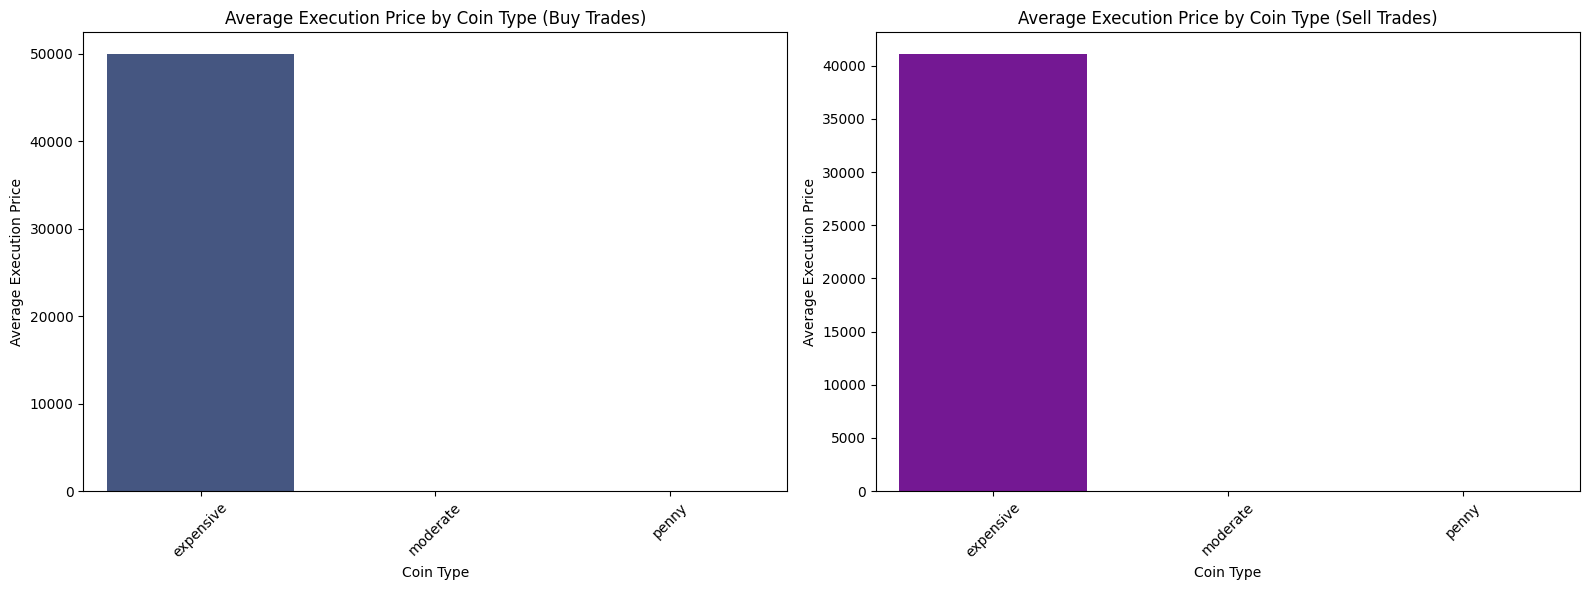

In [ ]:
# Filter data for buy and sell trades
buy_trades_df = df[df['Buy/Sell'] == 'buy'].copy()
sell_trades_df = df[df['Buy/Sell'] == 'sell'].copy()

# Calculate the average Execution_Price for each Coin_Type during buy trades
average_execution_price_buy = buy_trades_df.groupby('Coin_Type')['Execution_Price'].mean().sort_values(ascending=False)

# Calculate the average Execution_Price for each Coin_Type during sell trades
average_execution_price_sell = sell_trades_df.groupby('Coin_Type')['Execution_Price'].mean().sort_values(ascending=False)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for average Execution_Price during buy trades
sns.barplot(x=average_execution_price_buy.index, y=average_execution_price_buy.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Execution Price by Coin Type (Buy Trades)')
axes[0].set_xlabel('Coin Type')
axes[0].set_ylabel('Average Execution Price')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for average Execution_Price during sell trades
sns.barplot(x=average_execution_price_sell.index, y=average_execution_price_sell.values, palette='plasma', ax=axes[1])
axes[1].set_title('Average Execution Price by Coin Type (Sell Trades)')
axes[1].set_xlabel('Coin Type')
axes[1].set_ylabel('Average Execution Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-22-1376572890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_counts_by_cointype.index, y=trade_counts_by_cointype.values, palette='viridis')


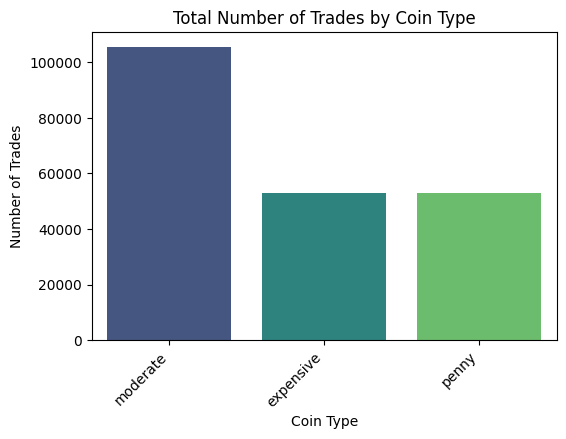

In [ ]:
# Calculate the total number of trades for each Coin_Type
trade_counts_by_cointype = df['Coin_Type'].value_counts()

# Create a bar chart for the total number of trades by Coin_Type
plt.figure(figsize=(6,4))
sns.barplot(x=trade_counts_by_cointype.index, y=trade_counts_by_cointype.values, palette='viridis')
plt.title('Total Number of Trades by Coin Type')
plt.xlabel('Coin Type')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipython-input-23-4217226356.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_profit_by_cointype.index, y=average_profit_by_cointype.values, palette='viridis', ax=axes[0])
/tmp/ipython-input-23-4217226356.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loss_by_cointype.index, y=average_loss_by_cointype.values, palette='plasma', ax=axes[1])


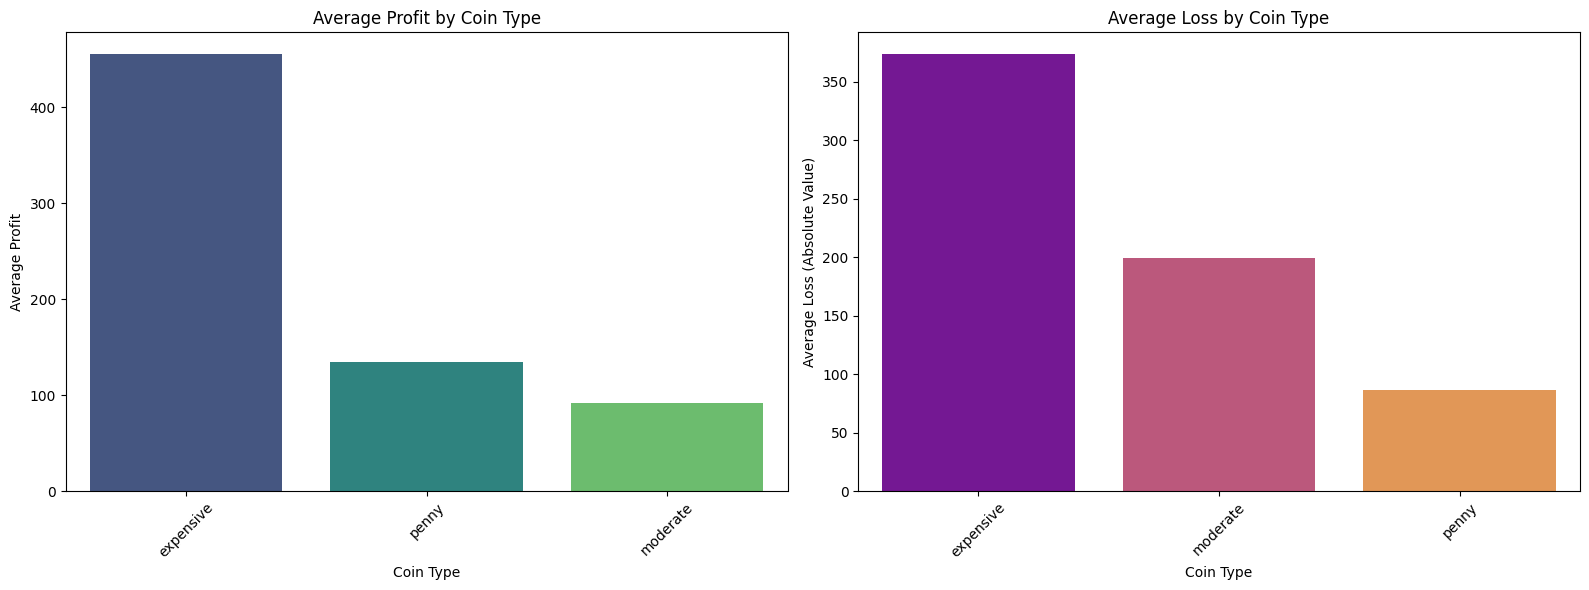

In [23]:
# Filter for profitable trades (PnL > 0)
profitable_trades_cointype = df[df['PnL'] > 0].copy()

# Calculate the average profit for each Coin_Type
average_profit_by_cointype = profitable_trades_cointype.groupby('Coin_Type')['PnL'].mean().sort_values(ascending=False)

# Filter for losing trades (PnL < 0)
losing_trades_cointype = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) for each Coin_Type
average_loss_by_cointype = losing_trades_cointype.groupby('Coin_Type')['PnL'].mean().abs().sort_values(ascending=False)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for average profit
sns.barplot(x=average_profit_by_cointype.index, y=average_profit_by_cointype.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Profit by Coin Type')
axes[0].set_xlabel('Coin Type')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for average loss
sns.barplot(x=average_loss_by_cointype.index, y=average_loss_by_cointype.values, palette='plasma', ax=axes[1])
axes[1].set_title('Average Loss by Coin Type')
axes[1].set_xlabel('Coin Type')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

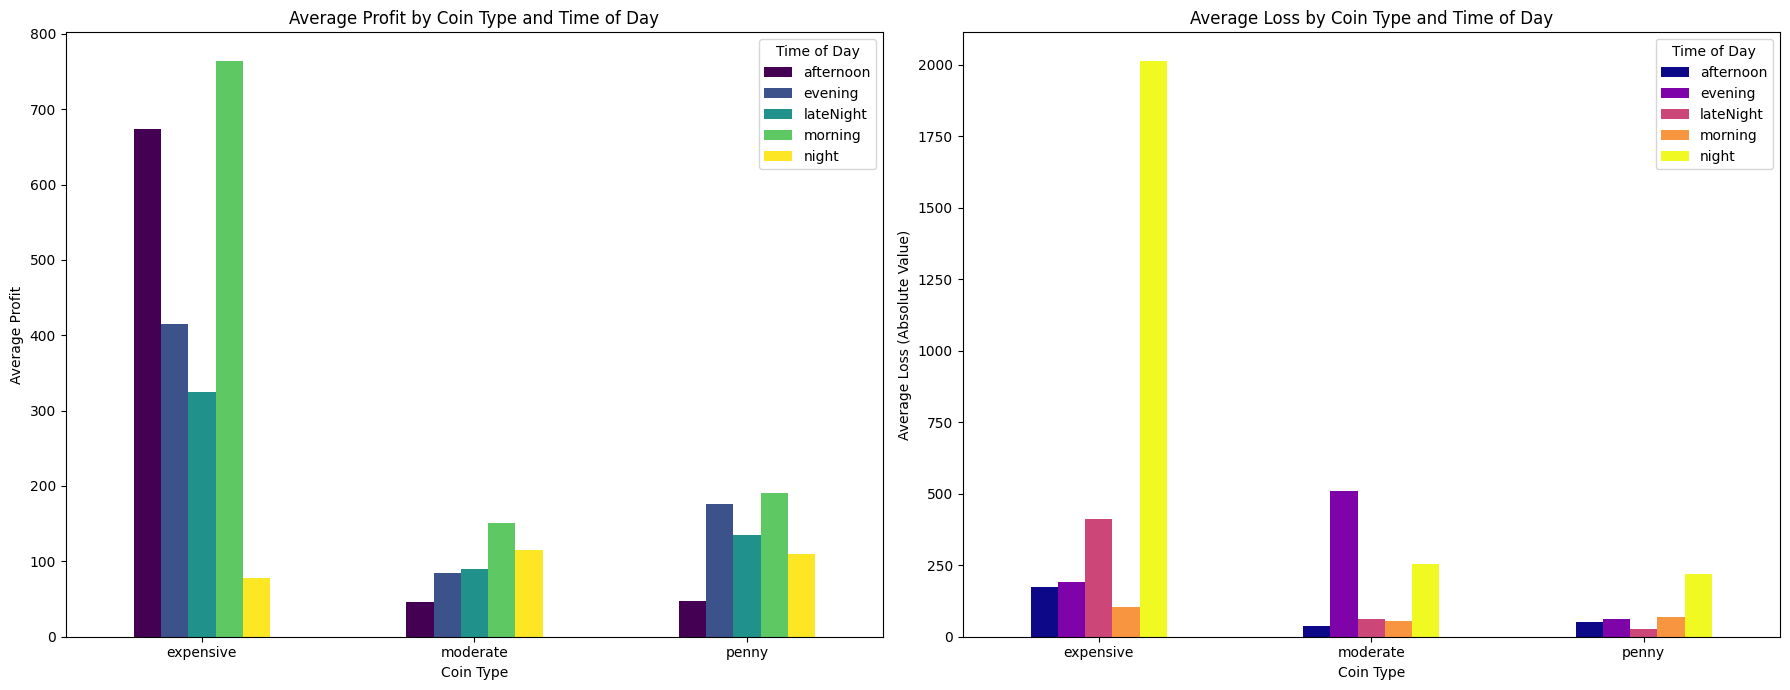

In [25]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0].copy()

# Calculate the average profit for each Coin_Type and TimeofDay
average_profit_by_cointype_timeofday = profitable_trades.groupby(['Coin_Type', 'TimeofDay'])['PnL'].mean().unstack()

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) for each Coin_Type and TimeofDay
average_loss_by_cointype_timeofday = losing_trades.groupby(['Coin_Type', 'TimeofDay'])['PnL'].mean().abs().unstack()

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Create a grouped bar chart for average profit
average_profit_by_cointype_timeofday.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Average Profit by Coin Type and Time of Day')
axes[0].set_xlabel('Coin Type')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Time of Day')

# Create a grouped bar chart for average loss
average_loss_by_cointype_timeofday.plot(kind='bar', ax=axes[1], colormap='plasma')
axes[1].set_title('Average Loss by Coin Type and Time of Day')
axes[1].set_xlabel('Coin Type')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Time of Day')

plt.tight_layout()
plt.show()

In [24]:
df.head()

User_Id   Coin  Execution_Price  Size_Tokens  Total_Amount Buy/Sell  \
722       16  eigen            2.912         7.62         22.19      buy   
723       16  eigen            2.912       211.24        615.13      buy   
724       16  eigen            2.912        76.39        222.45      buy   
725       16  eigen            2.912       778.26       2266.29      buy   
726       16  eigen            2.912      6926.49      20169.94      buy   

               Timestamp TimeofDay  Start_Position    Direction          PnL  \
722  2024-10-25 23:40:00     night       -40797.51  close short     8.279130   
723  2024-10-25 23:40:00     night       -40789.89  close short   229.512260   
724  2024-10-25 23:40:00     night       -40578.65  close short    82.997735   
725  2024-10-25 23:40:00     night       -40502.26  close short   845.579490   
726  2024-10-25 23:41:00     night       -39724.00  close short  7525.631385   

     Crossed       Fee        Date  Setinment_Index Fear/Greed Coin_Type  \
722    False  0.002129  2024-10-25               72      greed  moderate   
723    False  0.059052  2024-10-25               72      greed  moderate   
724    False  0.021354  2024-10-25               72      greed  moderate   
725    False  0.217563  2024-10-25               72      greed  moderate   
726    False  1.936313  2024-10-25               72      greed  moderate   

    TradeResult  Hour DayOfWeek  
722      profit    23    Friday  
723      profit    23    Friday  
724      profit    23    Friday  
725      profit    23    Friday  
726      profit    23    Friday

/tmp/ipython-input-25-250822525.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_profit_by_fear_greed.index, y=average_profit_by_fear_greed.values, palette='viridis', ax=axes[0])
/tmp/ipython-input-25-250822525.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loss_by_fear_greed.index, y=average_loss_by_fear_greed.values, palette='plasma', ax=axes[1])


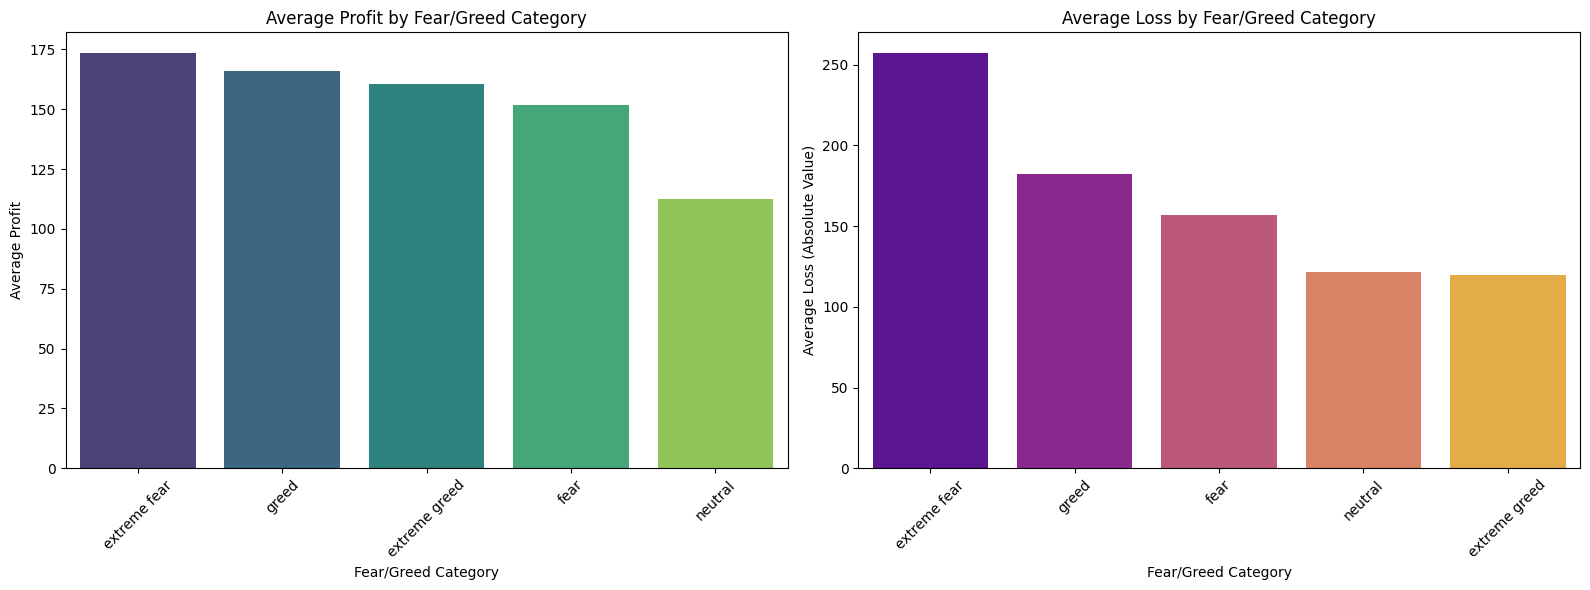

In [ ]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0].copy()

# Calculate the average profit for each Fear/Greed category
average_profit_by_fear_greed = profitable_trades.groupby('Fear/Greed')['PnL'].mean().sort_values(ascending=False)

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) for each Fear/Greed category
average_loss_by_fear_greed = losing_trades.groupby('Fear/Greed')['PnL'].mean().abs().sort_values(ascending=False)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for average profit
sns.barplot(x=average_profit_by_fear_greed.index, y=average_profit_by_fear_greed.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Profit by Fear/Greed Category')
axes[0].set_xlabel('Fear/Greed Category')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for average loss
sns.barplot(x=average_loss_by_fear_greed.index, y=average_loss_by_fear_greed.values, palette='plasma', ax=axes[1])
axes[1].set_title('Average Loss by Fear/Greed Category')
axes[1].set_xlabel('Fear/Greed Category')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Check the number of unique users
num_unique_users = df['User_Id'].nunique()
print(f"Number of unique users: {num_unique_users}")

Number of unique users: 32


In [26]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0].copy()

# Calculate the average profit for each User_Id and Fear/Greed category
average_profit_by_user_fear_greed = profitable_trades.groupby(['User_Id', 'Fear/Greed'])['PnL'].mean().unstack()

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) for each User_Id and Fear/Greed category
average_loss_by_user_fear_greed = losing_trades.groupby(['User_Id', 'Fear/Greed'])['PnL'].mean().abs().unstack()

# Display the calculated average profit and loss per user and fear/greed category
print("Average Profit by User and Fear/Greed Category:")
display(average_profit_by_user_fear_greed)

print("\nAverage Loss by User and Fear/Greed Category:")
display(average_loss_by_user_fear_greed)

Average Profit by User and Fear/Greed Category:


Fear/Greed  extreme fear  extreme greed         fear        greed      neutral
User_Id                                                                       
0            3372.141120    1803.870925  1507.489475  5156.179479   512.857619
1                    NaN            NaN     3.583931    17.472903          NaN
2               3.075229      69.605820    42.891064   108.995428          NaN
3               7.539717       3.495279     6.005606     5.068003     8.082524
5             451.707619            NaN    77.081397          NaN   119.642081
6             297.147157      60.457760   132.768054    19.462295   135.083223
8            3153.694096     285.141516  2930.369069  6041.475000  2971.746540
10             99.635941      24.452533    55.968767    21.196195    33.436289
11            221.000000            NaN   411.833955    59.490268   132.000000
12            169.385239     176.167339    93.225680   157.309997   125.070188
13            697.172940            NaN    52.598671    28.224009          NaN
14             31.853482            NaN    31.743669    12.505992          NaN
15                   NaN            NaN          NaN  2957.874125          NaN
16           2290.917007            NaN   589.047678   351.295283          NaN
17             60.938658      67.310475    37.498170    45.426132    17.603846
18              9.740226            NaN    17.203862          NaN    45.068462
19            645.091618     165.367235   338.313119    94.051438   617.509202
20             12.805095            NaN          NaN    89.947357    54.762235
21             12.899794      27.310826    20.301000    26.173929    16.155858
22            126.989217      58.858725          NaN    94.081094          NaN
23              8.325342            NaN     5.799974          NaN    23.130540
27                   NaN     206.781318   321.625123   196.340286   323.041005
28             35.216837            NaN    45.002252          NaN    77.425959
30           1374.895409     957.515419   678.447428   391.197401          NaN
31             18.207890      31.424130    16.615287    32.507915    31.996833


Average Loss by User and Fear/Greed Category:


Fear/Greed  extreme fear  extreme greed        fear        greed      neutral
User_Id                                                                      
0                    NaN     841.126799         NaN  3240.151507          NaN
1                    NaN            NaN         NaN    90.722822          NaN
2               1.785603            NaN    5.878637   655.638312    81.014215
3               0.172688       5.976379    4.878033    14.191831     9.797930
4                    NaN      33.441300         NaN          NaN          NaN
5                    NaN            NaN  441.856201          NaN          NaN
6             347.514756            NaN         NaN          NaN          NaN
10              1.076922      18.806174   19.836910    15.312323     9.529823
11             68.018598            NaN   18.333333    52.172283          NaN
12                   NaN     155.886030   11.561764   107.185650          NaN
13          12483.805926            NaN  122.734881          NaN          NaN
14                   NaN            NaN   30.900913          NaN          NaN
15                   NaN            NaN  570.292975          NaN          NaN
16            149.022338            NaN         NaN          NaN          NaN
17           5843.040000      56.805101   17.521444    14.755391   376.358273
18                   NaN            NaN    8.537576          NaN   194.800000
19                   NaN     925.365243   21.330722  1154.624378    92.547281
20            350.255637            NaN         NaN          NaN          NaN
21              7.434177       5.464653    8.419842    28.925765    28.949433
22                   NaN            NaN         NaN     3.089592          NaN
23                   NaN            NaN   10.120920    10.283869     2.942867
27                   NaN     149.133730         NaN    41.722871    25.410890
28            250.320488            NaN  615.654635          NaN    73.128091
30            758.343008     984.960017  387.100861   213.806628  1494.764344
31              3.616151      86.515887    8.875484    38.753348    28.818382

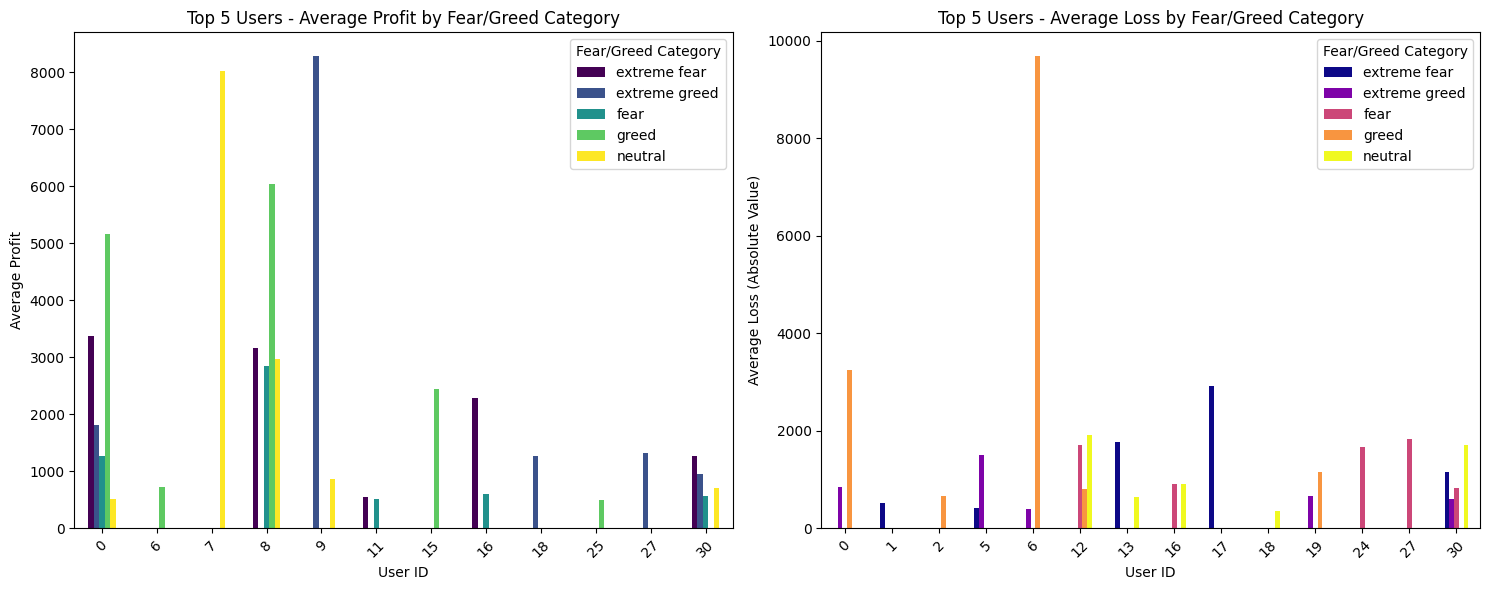

In [ ]:
# Define the number of top users to visualize
top_n_users = 5

# Function to get top N users by average PnL for each Fear/Greed category
def get_top_users_by_fear_greed(df, n, profit=True):
    top_users = {}
    for category in df.columns:
        if profit:
            # Sort by average profit
            sorted_users = df[category].sort_values(ascending=False).head(n)
        else:
            # Sort by average loss (absolute value)
            sorted_users = df[category].sort_values(ascending=False).head(n)
        top_users[category] = sorted_users
    return pd.DataFrame(top_users)

# Get top users for average profit and loss
top_profit_users = get_top_users_by_fear_greed(average_profit_by_user_fear_greed, top_n_users, profit=True)
top_loss_users = get_top_users_by_fear_greed(average_loss_by_user_fear_greed, top_n_users, profit=False)

# Create subplots for side-by-side visualization of top users' average profit and loss
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot grouped bar chart for top users' average profit
top_profit_users.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title(f'Top {top_n_users} Users - Average Profit by Fear/Greed Category')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Fear/Greed Category')

# Plot grouped bar chart for top users' average loss
top_loss_users.plot(kind='bar', ax=axes[1], colormap='plasma')
axes[1].set_title(f'Top {top_n_users} Users - Average Loss by Fear/Greed Category')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Fear/Greed Category')

plt.tight_layout()
plt.show()

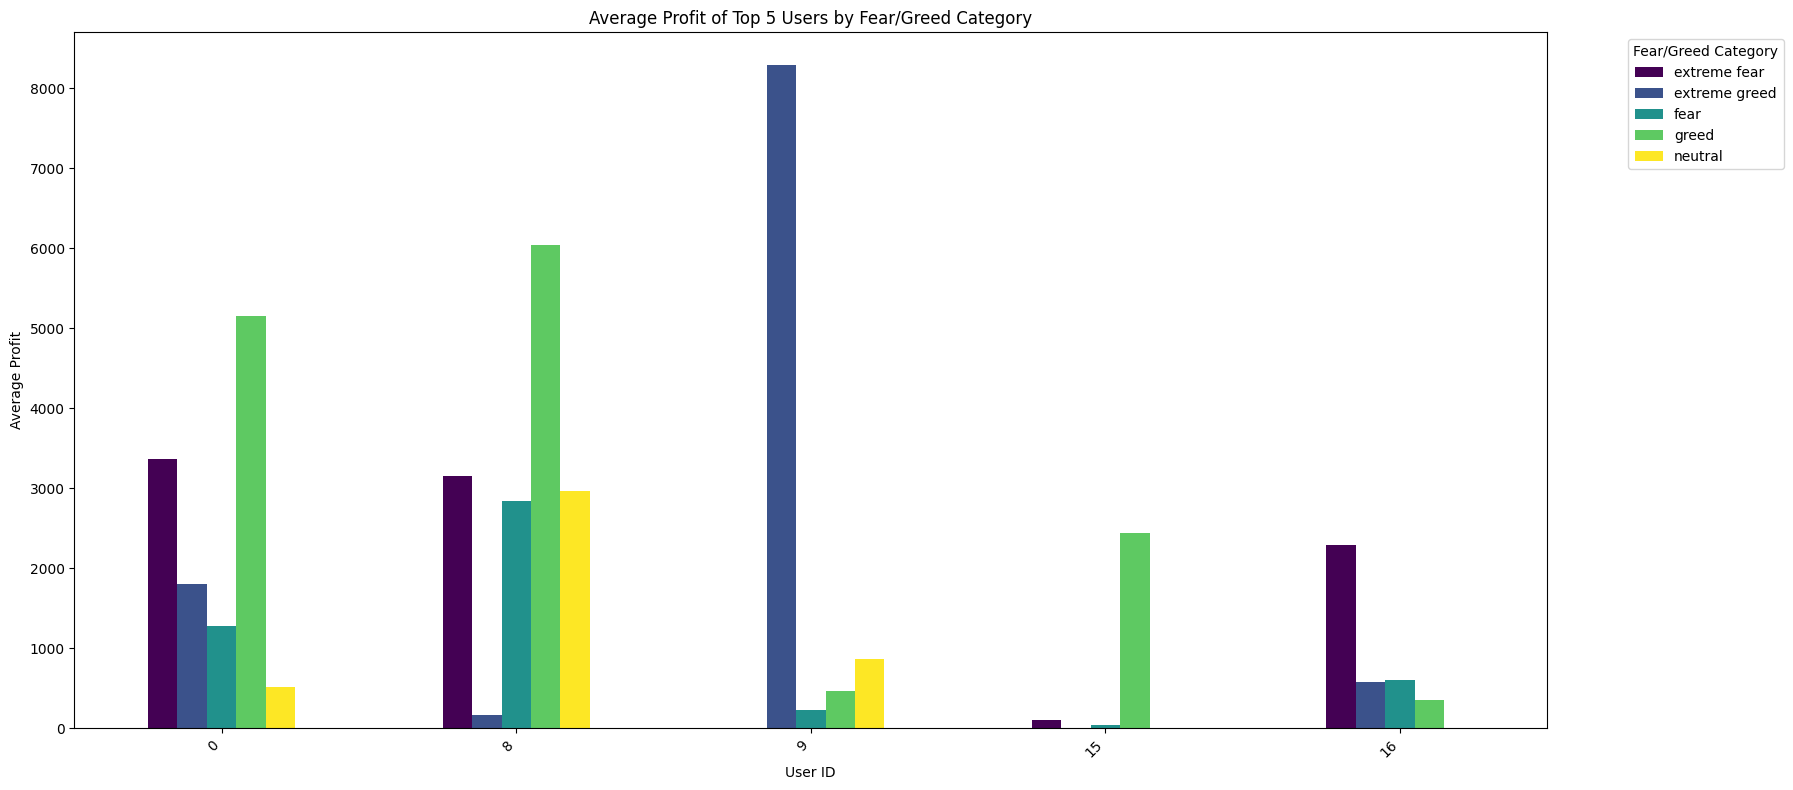

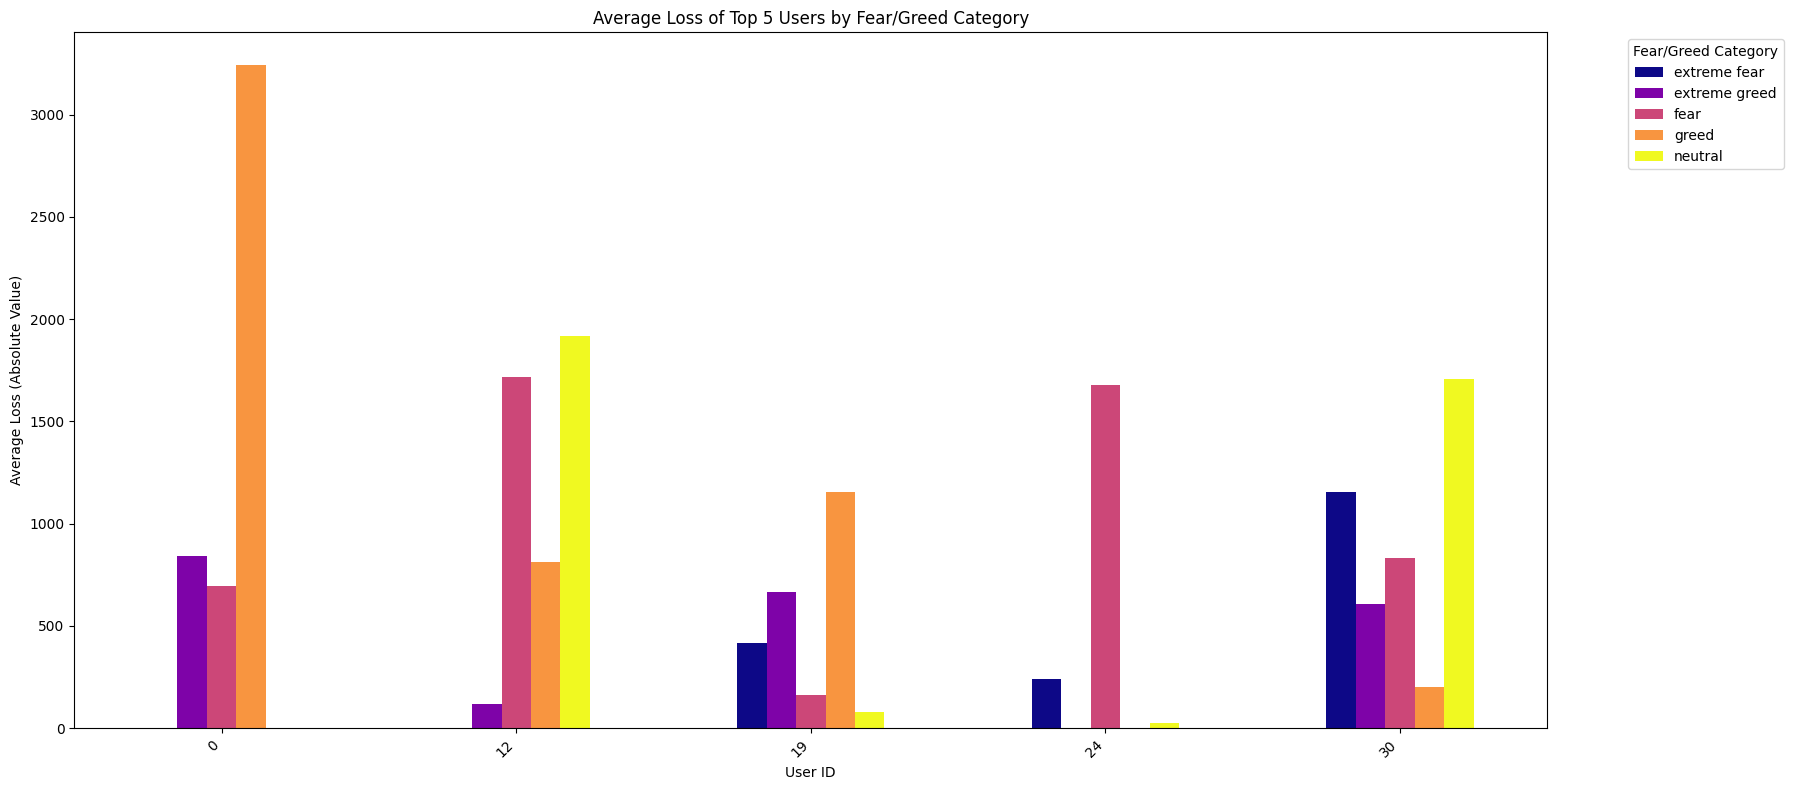

In [ ]:
# Calculate the average profit for each user across all fear/greed categories
average_profit_by_user = profitable_trades.groupby('User_Id')['PnL'].mean().sort_values(ascending=False)

# Get the top 5 users by average profit
top_5_profit_users = average_profit_by_user.head(5).index.tolist()

# Calculate the average loss for each user across all fear/greed categories
average_loss_by_user = losing_trades.groupby('User_Id')['PnL'].mean().abs().sort_values(ascending=False)

# Get the top 5 users by average loss
top_5_loss_users = average_loss_by_user.head(5).index.tolist()

# Filter the profitable trades data for the top 5 profit users
top_profit_trades = profitable_trades[profitable_trades['User_Id'].isin(top_5_profit_users)].copy()

# Filter the losing trades data for the top 5 loss users
top_loss_trades = losing_trades[losing_trades['User_Id'].isin(top_5_loss_users)].copy()

# Calculate the average profit for top users by fear/greed category
average_profit_top_users_fear_greed = top_profit_trades.groupby(['User_Id', 'Fear/Greed'])['PnL'].mean().unstack()

# Calculate the average loss for top users by fear/greed category
average_loss_top_users_fear_greed = top_loss_trades.groupby(['User_Id', 'Fear/Greed'])['PnL'].mean().abs().unstack()

# Create a bar chart for average profit of top users by fear/greed category
plt.figure(figsize=(18, 8))
average_profit_top_users_fear_greed.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Profit of Top 5 Users by Fear/Greed Category')
plt.xlabel('User ID')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fear/Greed Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a bar chart for average loss of top users by fear/greed category
plt.figure(figsize=(18, 8))
average_loss_top_users_fear_greed.plot(kind='bar', colormap='plasma', ax=plt.gca())
plt.title('Average Loss of Top 5 Users by Fear/Greed Category')
plt.xlabel('User ID')
plt.ylabel('Average Loss (Absolute Value)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fear/Greed Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# user 0  has made highest profit during greed
# also user 0 realised highest loss during greed

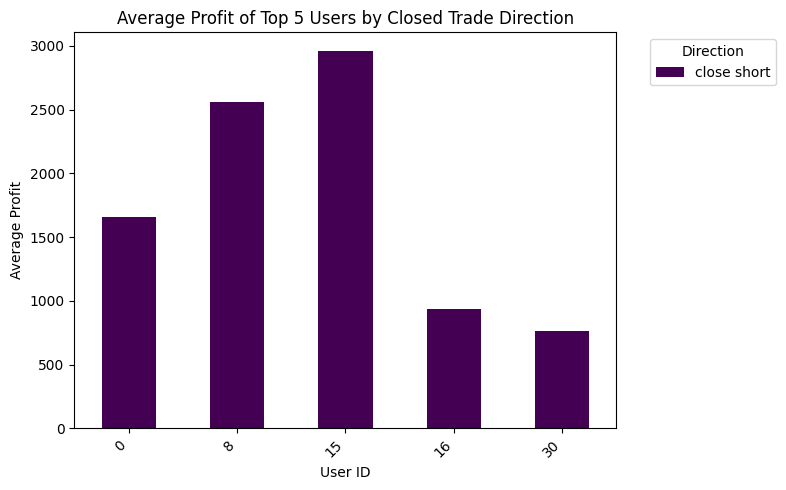

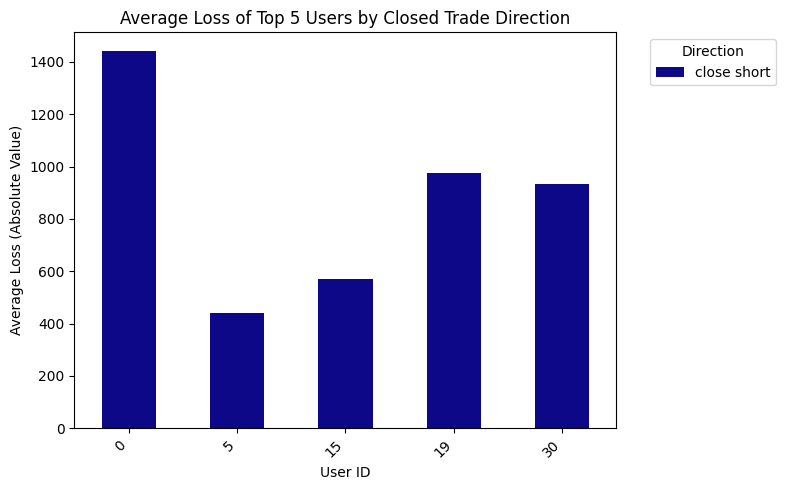

In [27]:
# Filter for profitable trades with 'close long' or 'close short' direction
profitable_trades_closed = df[(df['PnL'] > 0) & (df['Direction'].isin(['close long', 'close short']))].copy()

# Calculate the average profit for each User_Id and Direction
average_profit_by_user_direction = profitable_trades_closed.groupby(['User_Id', 'Direction'])['PnL'].mean().unstack()

# Filter for losing trades with 'close long' or 'close short' direction
losing_trades_closed = df[(df['PnL'] < 0) & (df['Direction'].isin(['close long', 'close short']))].copy()

# Calculate the average loss (absolute value) for each User_Id and Direction
average_loss_by_user_direction = losing_trades_closed.groupby(['User_Id', 'Direction'])['PnL'].mean().abs().unstack()

# Calculate overall average profit and loss for users in closed trades to identify top users
overall_average_profit_closed = profitable_trades_closed.groupby('User_Id')['PnL'].mean().sort_values(ascending=False)
top_5_profit_users_closed = overall_average_profit_closed.head(5).index.tolist()

overall_average_loss_closed = losing_trades_closed.groupby('User_Id')['PnL'].mean().abs().sort_values(ascending=False)
top_5_loss_users_closed = overall_average_loss_closed.head(5).index.tolist()

# Filter the average profit and loss data for the top users
average_profit_top_users_direction = average_profit_by_user_direction[average_profit_by_user_direction.index.isin(top_5_profit_users_closed)]
average_loss_top_users_direction = average_loss_by_user_direction[average_loss_by_user_direction.index.isin(top_5_loss_users_closed)]

# Create a bar chart for average profit of top users by direction
plt.figure(figsize=(8,5))
average_profit_top_users_direction.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Profit of Top 5 Users by Closed Trade Direction')
plt.xlabel('User ID')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Direction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a bar chart for average loss of top users by direction
plt.figure(figsize=(8, 5))
average_loss_top_users_direction.plot(kind='bar', colormap='plasma', ax=plt.gca())
plt.title('Average Loss of Top 5 Users by Closed Trade Direction')
plt.xlabel('User ID')
plt.ylabel('Average Loss (Absolute Value)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Direction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Task
Generate correlation heatmaps of numerical features for the top 5 users with the highest total profit and the top 5 users with the highest total loss using the data in "/content/merged_df.xls".

## Identify top users

### Subtask:
Calculate the total profit and loss for each user and identify the top 5 users with the highest total profit and the top 5 users with the highest total loss.


**Reasoning**:
Calculate the total profit and loss for each user and identify the top 5 users with the highest total profit and the top 5 users with the highest total loss as per the instructions.



In [ ]:
# Calculate the total PnL for each user
total_pnl_by_user = df.groupby('User_Id')['PnL'].sum()

# Identify top 5 users with the highest total profit
top_5_profitable_users = total_pnl_by_user.sort_values(ascending=False).head(5).index.tolist()

# Identify top 5 users with the highest total loss (based on absolute value of PnL)
top_5_losing_users = total_pnl_by_user.abs().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 Profitable Users (User IDs):", top_5_profitable_users)
print("Top 5 Losing Users (User IDs):", top_5_losing_users)

Top 5 Profitable Users (User IDs): [27, 0, 29, 13, 31]
Top 5 Losing Users (User IDs): [27, 0, 29, 13, 31]


## Filter data for top users

### Subtask:
Create separate DataFrames containing only the trades of the top 5 profit users and the top 5 loss users.


**Reasoning**:
Filter the original DataFrame to create new DataFrames for the top 5 profit and loss users and then filter these DataFrames to keep only profitable trades for the top profit users and losing trades for the top loss users.



In [ ]:
# Filter the original DataFrame for top 5 profit users
top_profit_users_df = df[df['User_Id'].isin(top_5_profitable_users)].copy()

# Filter the original DataFrame for top 5 losing users
top_losing_users_df = df[df['User_Id'].isin(top_5_losing_users)].copy()

# Filter top profit users' trades to keep only profitable ones
top_profit_trades = top_profit_users_df[top_profit_users_df['PnL'] > 0].copy()

# Filter top losing users' trades to keep only losing ones
top_loss_trades = top_losing_users_df[top_losing_users_df['PnL'] < 0].copy()

print("Shape of top_profit_users_df:", top_profit_users_df.shape)
print("Shape of top_losing_users_df:", top_losing_users_df.shape)
print("Shape of top_profit_trades:", top_profit_trades.shape)
print("Shape of top_loss_trades:", top_loss_trades.shape)

Shape of top_profit_users_df: (92163, 17)
Shape of top_losing_users_df: (92163, 17)
Shape of top_profit_trades: (38366, 17)
Shape of top_loss_trades: (7675, 17)


## Calculate correlation matrices

### Subtask:
For the filtered DataFrames (top profit users' profitable trades and top loss users' losing trades), calculate the correlation matrix for all numerical columns.


**Reasoning**:
Calculate the correlation matrices for the numerical columns in the filtered dataframes and display them.



In [ ]:
# Select numerical columns and calculate correlation matrix for top profitable trades
numerical_cols_profit = top_profit_trades.select_dtypes(include=['number']).columns.tolist()
top_profit_corr_matrix = top_profit_trades[numerical_cols_profit].corr()

# Select numerical columns and calculate correlation matrix for top losing trades
numerical_cols_loss = top_loss_trades.select_dtypes(include=['number']).columns.tolist()
top_loss_corr_matrix = top_loss_trades[numerical_cols_loss].corr()

# Display the correlation matrices
print("Correlation Matrix for Top 5 Profitable Users (Profitable Trades):")
display(top_profit_corr_matrix)

print("\nCorrelation Matrix for Top 5 Losing Users (Losing Trades):")
display(top_loss_corr_matrix)

Correlation Matrix for Top 5 Profitable Users (Profitable Trades):


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.568173     0.001622     -0.168329   
Execution_Price -0.568173         1.000000    -0.004468      0.218489   
Size_Tokens      0.001622        -0.004468     1.000000      0.003520   
Total_Amount    -0.168329         0.218489     0.003520      1.000000   
Start_Position   0.149516        -0.162932     0.441629     -0.031711   
PnL             -0.120382        -0.004354     0.015117      0.256409   
Fee             -0.166380         0.219937     0.004868      0.726501   
Setinment_Index  0.048864         0.016429     0.007389     -0.004112   

                 Start_Position       PnL       Fee  Setinment_Index  
User_Id                0.149516 -0.120382 -0.166380         0.048864  
Execution_Price       -0.162932 -0.004354  0.219937         0.016429  
Size_Tokens            0.441629  0.015117  0.004868         0.007389  
Total_Amount          -0.031711  0.256409  0.726501        -0.004112  
Start_Position         1.000000 -0.003652 -0.039636        -0.155758  
PnL                   -0.003652  1.000000  0.217957         0.050920  
Fee                   -0.039636  0.217957  1.000000         0.000186  
Setinment_Index       -0.155758  0.050920  0.000186         1.000000


Correlation Matrix for Top 5 Losing Users (Losing Trades):


User_Id  Execution_Price  Size_Tokens  Total_Amount  \
User_Id          1.000000        -0.489641    -0.001093     -0.259692   
Execution_Price -0.489641         1.000000    -0.011901      0.282858   
Size_Tokens     -0.001093        -0.011901     1.000000     -0.000248   
Total_Amount    -0.259692         0.282858    -0.000248      1.000000   
Start_Position   0.023384        -0.008234    -0.549528     -0.003049   
PnL              0.143253        -0.021460    -0.008025     -0.432733   
Fee             -0.223483         0.340757     0.002807      0.895111   
Setinment_Index -0.173031         0.059447     0.047073      0.047578   

                 Start_Position       PnL       Fee  Setinment_Index  
User_Id                0.023384  0.143253 -0.223483        -0.173031  
Execution_Price       -0.008234 -0.021460  0.340757         0.059447  
Size_Tokens           -0.549528 -0.008025  0.002807         0.047073  
Total_Amount          -0.003049 -0.432733  0.895111         0.047578  
Start_Position         1.000000  0.003559 -0.006309        -0.051823  
PnL                    0.003559  1.000000 -0.249639        -0.034822  
Fee                   -0.006309 -0.249639  1.000000         0.041969  
Setinment_Index       -0.051823 -0.034822  0.041969         1.000000

**Reasoning**:
Visualize the calculated correlation matrices using heatmaps to easily interpret the relationships between numerical features for the top profitable and top losing trades.



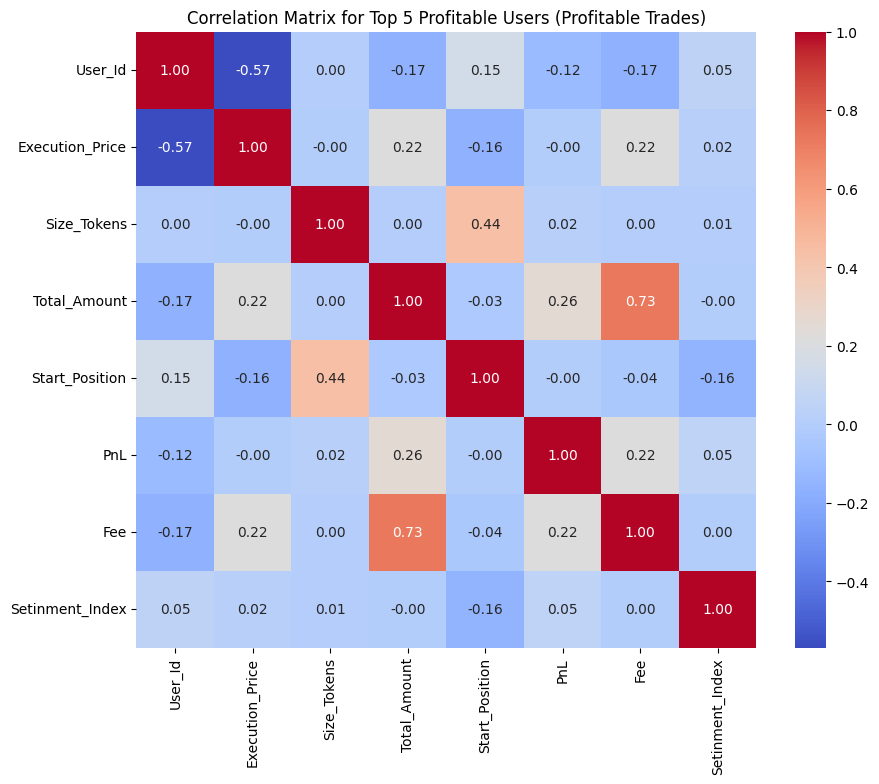

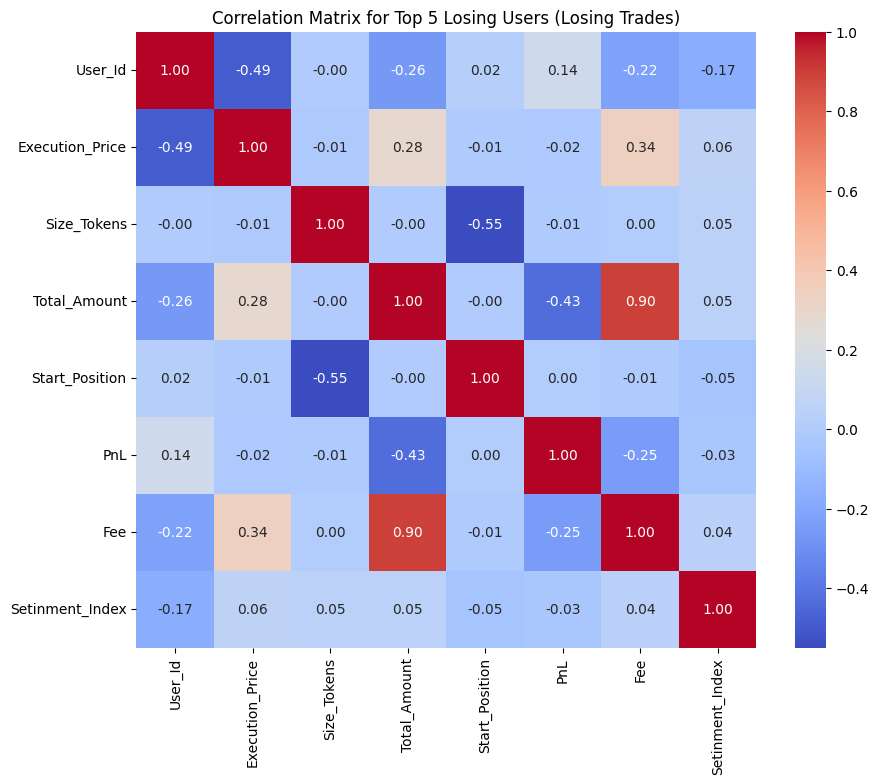

In [ ]:
# Visualize the correlation matrix for top profitable trades
plt.figure(figsize=(10, 8))
sns.heatmap(top_profit_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Top 5 Profitable Users (Profitable Trades)')
plt.show()

# Visualize the correlation matrix for top losing trades
plt.figure(figsize=(10, 8))
sns.heatmap(top_loss_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Top 5 Losing Users (Losing Trades)')
plt.show()

## Visualize correlation heatmaps

### Subtask:
Generate heatmaps for the calculated correlation matrices to visualize the relationships between numerical features for the top profit and top loss users.


**Reasoning**:
Generate heatmaps for the calculated correlation matrices to visualize the relationships between numerical features for the top profit and top loss users.



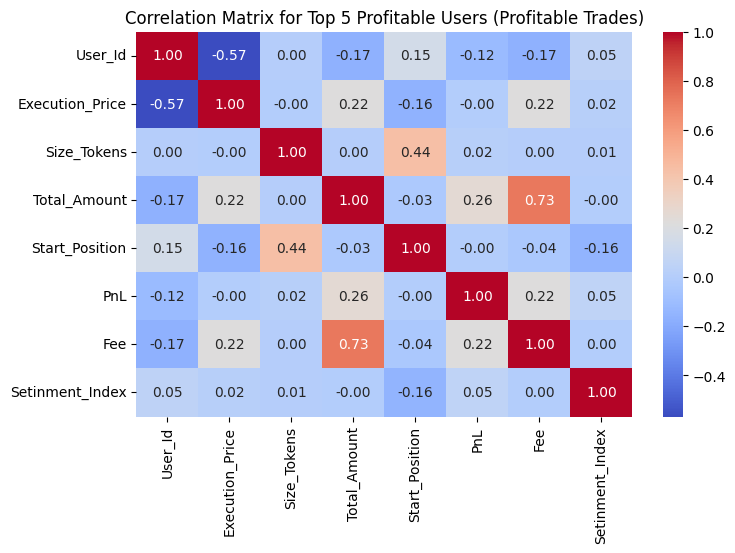

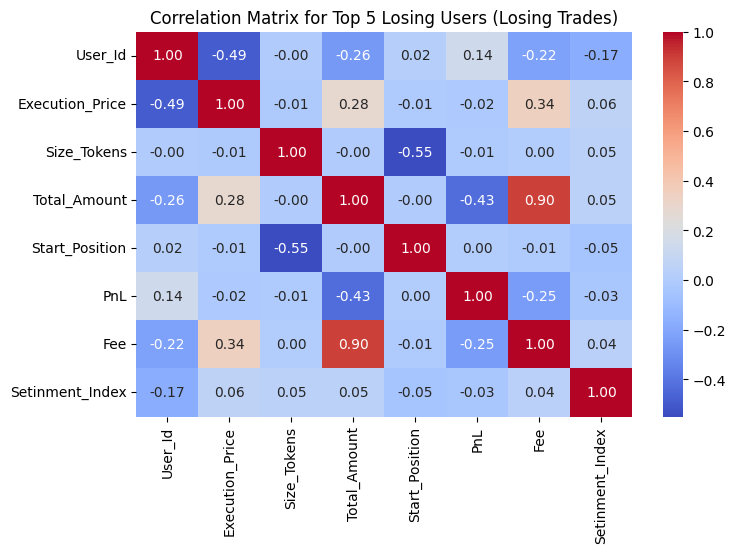

In [ ]:
# Create a figure for the heatmap of the top profit correlation matrix
plt.figure(figsize=(8,5))

# Generate the heatmap for top profitable trades
sns.heatmap(top_profit_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix for Top 5 Profitable Users (Profitable Trades)')

# Display the plot
plt.show()

# Create a figure for the heatmap of the top loss correlation matrix
plt.figure(figsize=(8,5))

# Generate the heatmap for top losing trades
sns.heatmap(top_loss_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix for Top 5 Losing Users (Losing Trades)')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 5 users with the highest total profit and the top 5 users with the highest absolute total loss are the same individuals: User IDs 27, 0, 29, 13, and 31.
*   For profitable trades of the top profit users, there's a strong positive correlation between 'Total\_Amount' and 'Fee' (0.73), and a moderate positive correlation between 'Total\_Amount' and 'PnL' (0.26).
*   For losing trades of the top loss users, there's a very strong positive correlation between 'Total\_Amount' and 'Fee' (0.90) and a strong negative correlation between 'Total\_Amount' and 'PnL' (-0.43).
*   'Size\_Tokens' shows a moderate positive correlation with 'Start\_Position' (0.44) in profitable trades and a moderate negative correlation (-0.55) in losing trades.

### Insights or Next Steps

*   The strong correlation between 'Total\_Amount' and 'Fee' for both profitable and losing trades suggests that fees are heavily dependent on the transaction amount, as expected.
*   The opposing correlations between 'Total\_Amount' and 'PnL' in profitable (positive) versus losing (negative) trades highlight how the size of the transaction impacts the outcome for these top users. Large transactions tend to be more profitable for top profitable users and result in larger losses for top losing users.


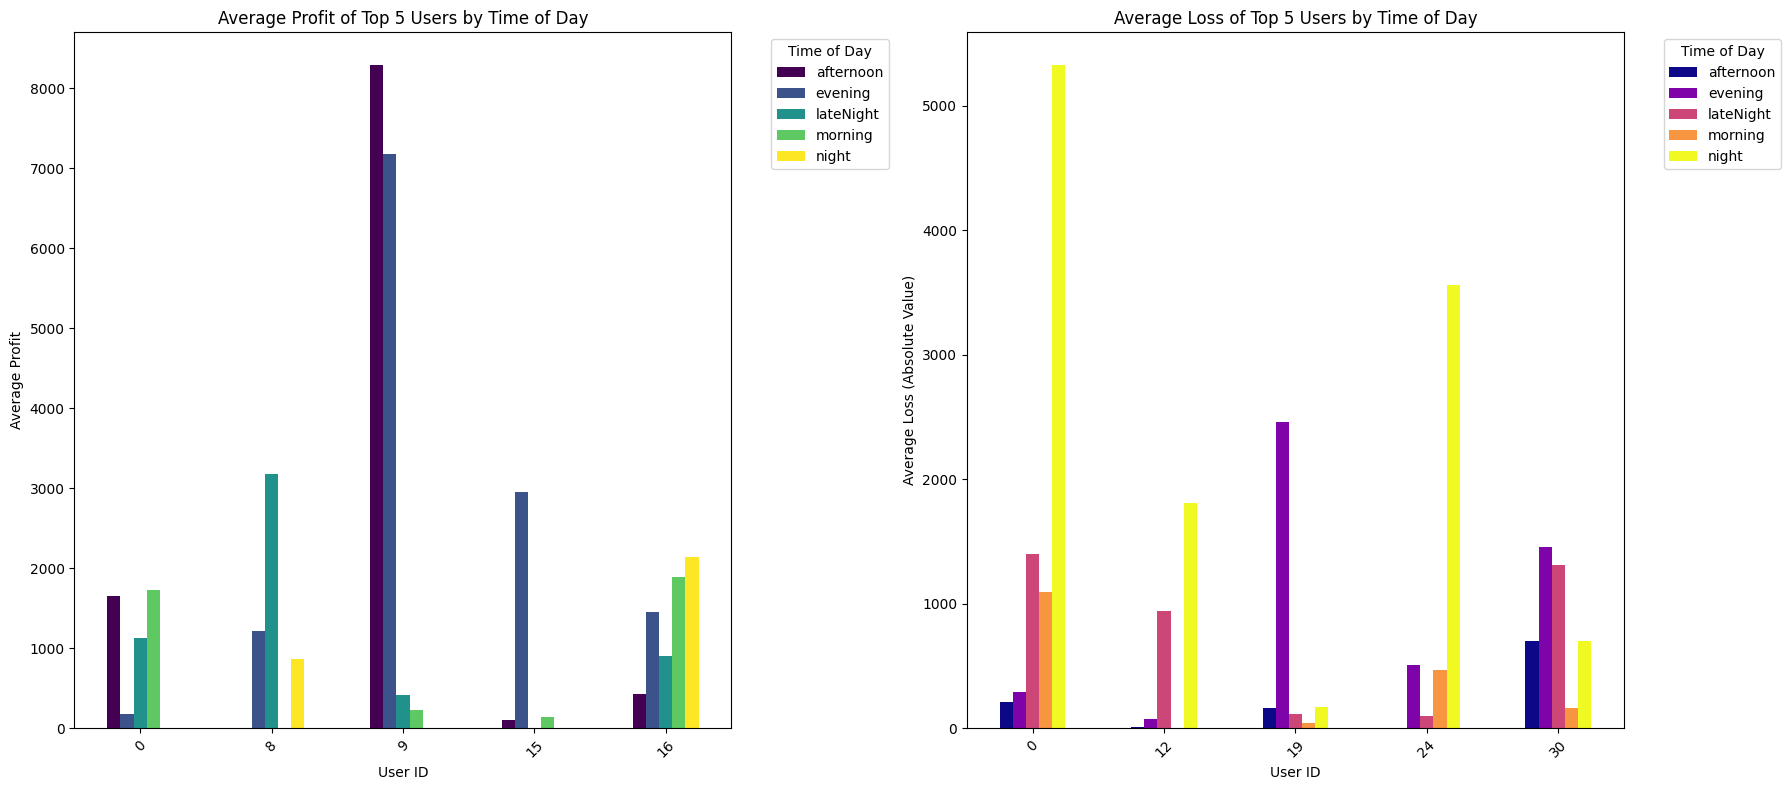

In [ ]:
# Calculate the average profit for each user across all times of day
average_profit_by_user = profitable_trades.groupby('User_Id')['PnL'].mean().sort_values(ascending=False)

# Get the top 5 users by average profit
top_5_profit_users = average_profit_by_user.head(5).index.tolist()

# Calculate the average loss for each user across all times of day
average_loss_by_user = losing_trades.groupby('User_Id')['PnL'].mean().abs().sort_values(ascending=False)

# Get the top 5 users by average loss
top_5_loss_users = average_loss_by_user.head(5).index.tolist()

# Filter the profitable trades data for the top 5 profit users
top_profit_trades = profitable_trades[profitable_trades['User_Id'].isin(top_5_profit_users)].copy()

# Filter the losing trades data for the top 5 loss users
top_loss_trades = losing_trades[losing_trades['User_Id'].isin(top_5_loss_users)].copy()

# Calculate the average profit for top users by time of day
average_profit_top_users_timeofday = top_profit_trades.groupby(['User_Id', 'TimeofDay'])['PnL'].mean().unstack()

# Calculate the average loss for top users by time of day
average_loss_top_users_timeofday = top_loss_trades.groupby(['User_Id', 'TimeofDay'])['PnL'].mean().abs().unstack()

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Create a bar chart for average profit of top users by time of day
average_profit_top_users_timeofday.plot(kind='bar', colormap='viridis', ax=axes[0])
axes[0].set_title('Average Profit of Top 5 Users by Time of Day')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a bar chart for average loss of top users by time of day
average_loss_top_users_timeofday.plot(kind='bar', colormap='plasma', ax=axes[1])
axes[1].set_title('Average Loss of Top 5 Users by Time of Day')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

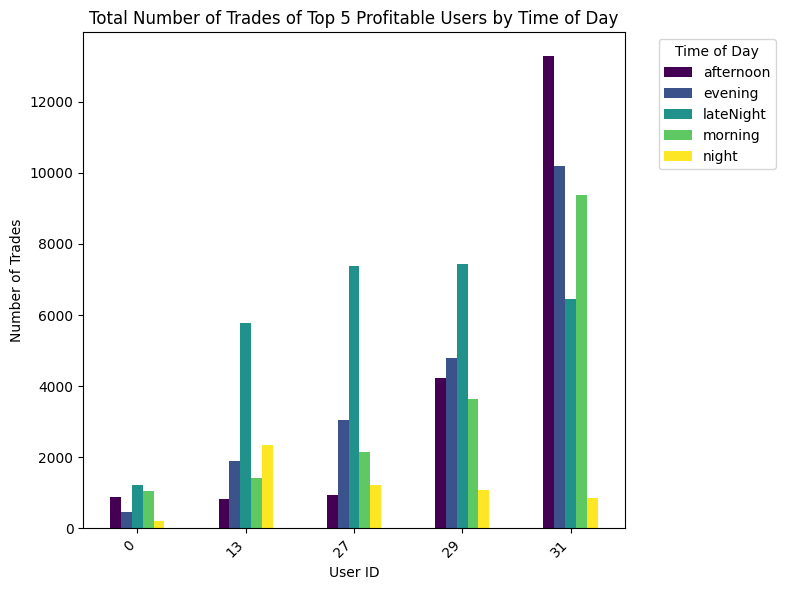

In [ ]:
# Calculate the total profit for each user
total_profit_by_user = df[df['PnL'] > 0].groupby('User_Id')['PnL'].sum().sort_values(ascending=False)

# Get the top 5 users by total profit
top_5_profitable_users = total_profit_by_user.head(5).index.tolist()

# Filter the DataFrame for the top 5 profitable users
top_profitable_trades_df = df[df['User_Id'].isin(top_5_profitable_users)].copy()

# Calculate the total number of trades for top profitable users by time of day
trade_counts_top_profitable_users_timeofday = top_profitable_trades_df.groupby(['User_Id', 'TimeofDay']).size().unstack()

# Create a bar chart for total number of trades of top profitable users by time of day
plt.figure(figsize=(8,6))
trade_counts_top_profitable_users_timeofday.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Total Number of Trades of Top 5 Profitable Users by Time of Day')
plt.xlabel('User ID')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
print(f"Default figure size set to: {plt.rcParams['figure.figsize']}")

Default figure size set to: [8.0, 6.0]


# Task
Generate pie charts showing the distribution of the total number of trades, average profit, and average loss for different coin types and different times of day. Additionally, for the top 5 profitable and top 5 loss-making users, generate pie charts showing the distribution of their average profit, average loss, average execution price, total number of trades, and count of different directions during different times of day and different fear/greed categories. Plot all related pie charts side-by-side. Use the data from "/content/merged_df.xls".

## Distribution of trades by coin type

### Subtask:
Generate a pie chart showing the distribution of the total number of trades across different coin types ('penny', 'moderate', 'expensive').


**Reasoning**:
Calculate the total number of trades for each Coin_Type and generate a pie chart to visualize the distribution as per the instructions.



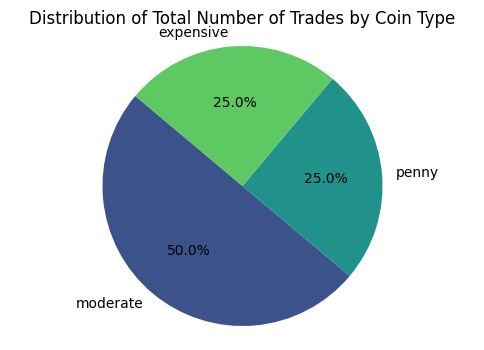

In [28]:
# Calculate the total number of trades for each Coin_Type
trade_counts_by_cointype = df['Coin_Type'].value_counts()

# Create a pie chart for the total number of trades by Coin_Type
plt.figure(figsize=(6,4))
plt.pie(trade_counts_by_cointype, labels=trade_counts_by_cointype.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(trade_counts_by_cointype)))
plt.title('Distribution of Total Number of Trades by Coin Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Reasoning**:
The previous step successfully generated the pie chart for the distribution of total trades by Coin Type. The next logical step according to the subtask is to generate the pie chart for the distribution of average profit by Coin Type.



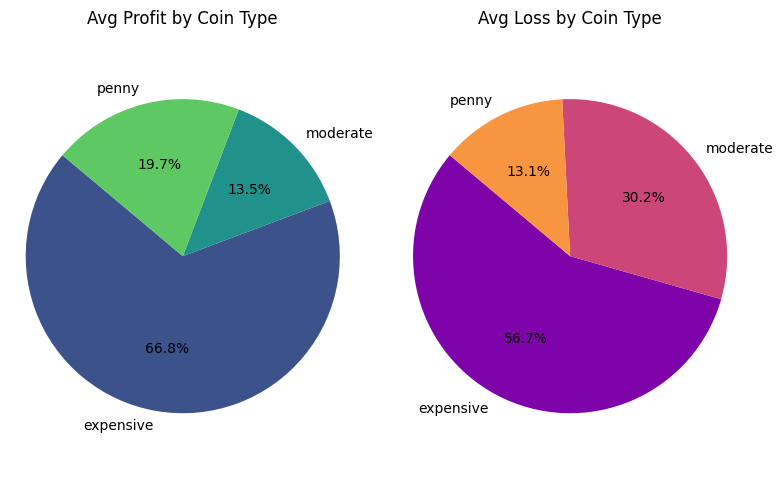

In [29]:
# Calculate average profit by Coin Type
average_profit_by_cointype = df[df['PnL'] > 0] \
    .groupby('Coin_Type')['PnL'].mean()

# Calculate average loss by Coin Type (absolute values for pie chart)
average_loss_by_cointype = df[df['PnL'] < 0] \
    .groupby('Coin_Type')['PnL'].mean().abs()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Pie chart: Average Profit
axs[0].pie(
    average_profit_by_cointype,
    labels=average_profit_by_cointype.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(average_profit_by_cointype))
)
axs[0].set_title('Avg Profit by Coin Type')
axs[0].axis('equal')

# Pie chart: Average Loss
axs[1].pie(
    average_loss_by_cointype,
    labels=average_loss_by_cointype.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('plasma', len(average_loss_by_cointype))
)
axs[1].set_title('Avg Loss by Coin Type')
axs[1].axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()


**Reasoning**:
The previous step generated the pie chart for the average profit by Coin Type. The next step according to the subtask is to generate a pie chart showing the distribution of average loss by Coin Type.



**Reasoning**:
The previous steps have generated pie charts for the distribution of total trades, average profit, and average loss by Coin Type. The next part of the subtask is to generate pie charts for the distribution of the total number of trades across different times of day.



**Reasoning**:
The previous steps generated pie charts for the distribution of total trades by Coin Type and Time of Day. The next step according to the subtask is to generate a pie chart showing the distribution of average profit by Time of Day.



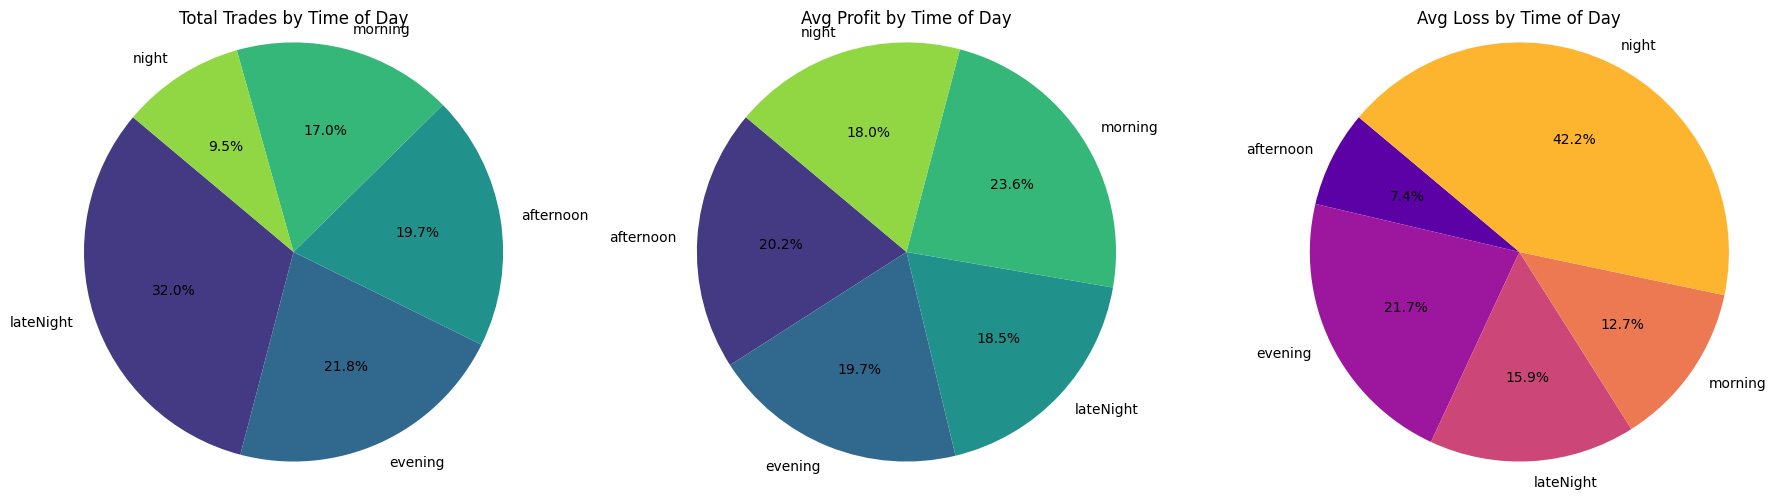

In [ ]:
# Calculate total trades by TimeOfDay
trade_counts_by_timeofday = df['TimeofDay'].value_counts()

# Calculate average profit by TimeOfDay
average_profit_by_timeofday = df[df['PnL'] > 0] \
    .groupby('TimeofDay')['PnL'].mean()

# Calculate average loss by TimeOfDay (absolute)
average_loss_by_timeofday = df[df['PnL'] < 0] \
    .groupby('TimeofDay')['PnL'].mean().abs()

# Create 3 pie charts side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Total Trades
axs[0].pie(
    trade_counts_by_timeofday,
    labels=trade_counts_by_timeofday.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(trade_counts_by_timeofday))
)
axs[0].set_title('Total Trades by Time of Day')
axs[0].axis('equal')

# 2. Avg Profit
axs[1].pie(
    average_profit_by_timeofday,
    labels=average_profit_by_timeofday.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(average_profit_by_timeofday))
)
axs[1].set_title('Avg Profit by Time of Day')
axs[1].axis('equal')

# 3. Avg Loss
axs[2].pie(
    average_loss_by_timeofday,
    labels=average_loss_by_timeofday.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('plasma', len(average_loss_by_timeofday))
)
axs[2].set_title('Avg Loss by Time of Day')
axs[2].axis('equal')

plt.tight_layout()
plt.show()


**Reasoning**:
The previous step generated the pie chart for the average profit by Time of Day. The next step according to the subtask is to generate a pie chart showing the distribution of average loss by Time of Day.



**Reasoning**:
The previous steps completed the generation of pie charts for the distribution of total trades, average profit, and average loss by Coin Type and Time of Day. The subtask requires generating pie charts for the top 5 profitable and top 5 loss-making users, showing the distribution of their average profit by Time of Day and Fear/Greed categories. The next step is to generate the pie charts for the distribution of average profit for the top 5 profitable users across different Times of Day.



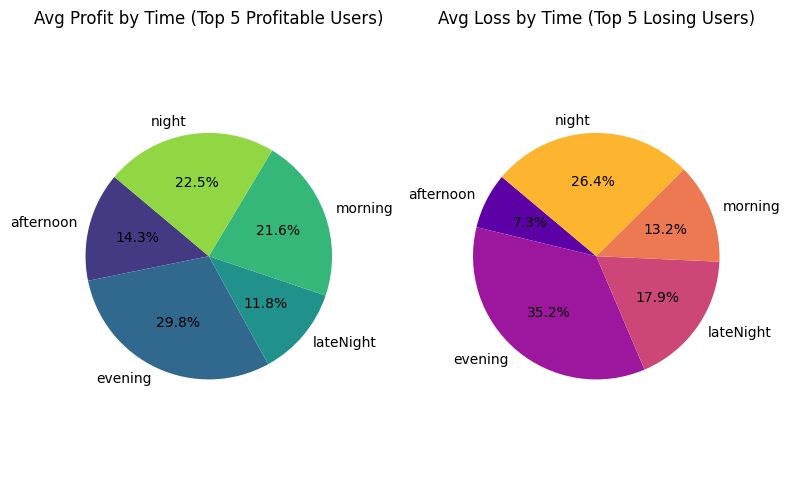

In [ ]:
# ---- Top 5 Profitable Users ----
average_profit_by_user = df[df['PnL'] > 0] \
    .groupby('User_Id')['PnL'].mean().sort_values(ascending=False)

top_5_profit_users = average_profit_by_user.head(5).index.tolist()

top_profit_trades = df[(df['PnL'] > 0) &
                              (df['User_Id'].isin(top_5_profit_users))].copy()

average_profit_top_users_timeofday = top_profit_trades \
    .groupby('TimeofDay')['PnL'].mean()


# ---- Top 5 Loss-Making Users ----
average_loss_by_user = df[df['PnL'] < 0] \
    .groupby('User_Id')['PnL'].mean().sort_values()  # more negative = worse

top_5_loss_users = average_loss_by_user.head(5).index.tolist()

top_loss_trades = df[(df['PnL'] < 0) &
                            (df['User_Id'].isin(top_5_loss_users))].copy()

average_loss_top_users_timeofday = top_loss_trades \
    .groupby('TimeofDay')['PnL'].mean().abs()  # use abs for pie chart

# ---- Plot Side-by-Side Pie Charts ----
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Profit Pie
axs[0].pie(
    average_profit_top_users_timeofday,
    labels=average_profit_top_users_timeofday.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(average_profit_top_users_timeofday))
)
axs[0].set_title('Avg Profit by Time (Top 5 Profitable Users)')
axs[0].axis('equal')

# Loss Pie
axs[1].pie(
    average_loss_top_users_timeofday,
    labels=average_loss_top_users_timeofday.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('plasma', len(average_loss_top_users_timeofday))
)
axs[1].set_title('Avg Loss by Time (Top 5 Losing Users)')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


**Reasoning**:
The previous step generated the pie chart for the average profit of top 5 profitable users by Time of Day. The next step according to the subtask is to generate a pie chart showing the distribution of average profit for the top 5 profitable users across different Fear/Greed categories.



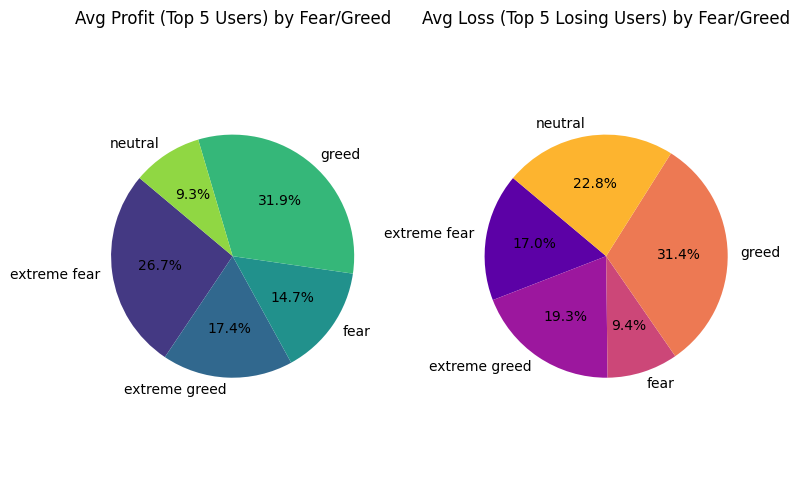

In [30]:
# ---- Top 5 Profitable Users ----
average_profit_by_user = df[df['PnL'] > 0] \
    .groupby('User_Id')['PnL'].mean().sort_values(ascending=False)

top_5_profit_users = average_profit_by_user.head(5).index.tolist()

top_profit_trades = df[(df['PnL'] > 0) &
                              (df['User_Id'].isin(top_5_profit_users))].copy()

average_profit_top_users_fear_greed = top_profit_trades \
    .groupby('Fear/Greed')['PnL'].mean()


# ---- Top 5 Loss-Making Users ----
average_loss_by_user = df[df['PnL'] < 0] \
    .groupby('User_Id')['PnL'].mean().sort_values()  # more negative = worse

top_5_loss_users = average_loss_by_user.head(5).index.tolist()

top_loss_trades = df[(df['PnL'] < 0) &
                            (df['User_Id'].isin(top_5_loss_users))].copy()

average_loss_top_users_fear_greed = top_loss_trades \
    .groupby('Fear/Greed')['PnL'].mean().abs()  # use abs for pie chart

# ---- Plot Side-by-Side Pie Charts ----
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Profit Pie
axs[0].pie(
    average_profit_top_users_fear_greed,
    labels=average_profit_top_users_fear_greed.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(average_profit_top_users_fear_greed))
)
axs[0].set_title('Avg Profit (Top 5 Users) by Fear/Greed')
axs[0].axis('equal')

# Loss Pie
axs[1].pie(
    average_loss_top_users_fear_greed,
    labels=average_loss_top_users_fear_greed.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('plasma', len(average_loss_top_users_fear_greed))
)
axs[1].set_title('Avg Loss (Top 5 Losing Users) by Fear/Greed')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


## Distribution of average loss by top 5 loss making users during different times of day

### Subtask:
Identify the top 5 loss-making users, calculate their average loss during each time of day, and generate a pie chart showing the distribution of these average losses for each of these users.


**Reasoning**:
Filter the DataFrame to include only trades with a negative 'PnL', group by 'User_Id' and calculate the absolute mean of 'PnL', sort to get top 5 losing users, filter the original DataFrame for these users and negative PnL, group by 'TimeofDay' and calculate absolute mean PnL, and then generate a pie chart for each of the top 5 users showing the distribution of their average loss by time of day.



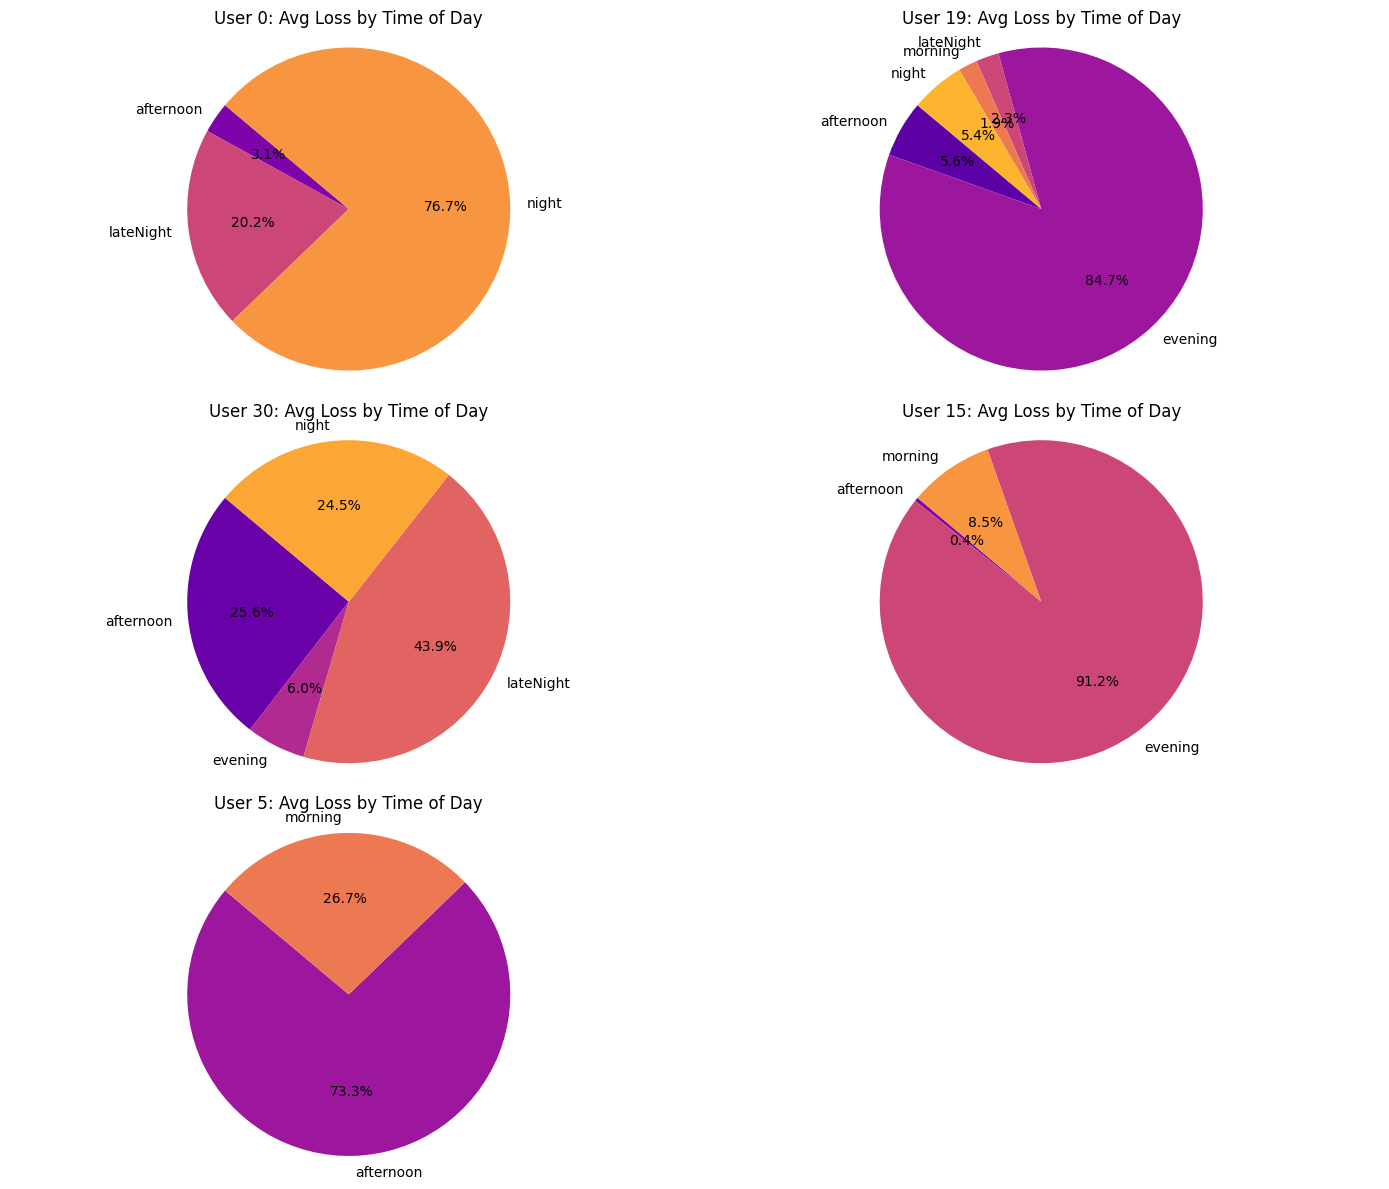

In [31]:
# 1. Filter trades with negative PnL
losing_trades_df = df[df['PnL'] < 0].copy()

# 2. Group by 'User_Id' and get mean absolute loss
average_loss_by_user = losing_trades_df.groupby('User_Id')['PnL'].mean().abs()

# 3. Get top 5 loss-making users
top_5_loss_users = average_loss_by_user.sort_values(ascending=False).head(5).index.tolist()

# 4. Filter for these users and their losing trades
top_loss_trades = df[(df['User_Id'].isin(top_5_loss_users)) & (df['PnL'] < 0)].copy()

# 5. Create subplots in 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to loop easily

# 6. Loop through top users and generate pie charts
for i, user_id in enumerate(top_5_loss_users):
    user_losing_trades = top_loss_trades[top_loss_trades['User_Id'] == user_id].copy()
    average_loss_by_timeofday_user = user_losing_trades.groupby('TimeofDay')['PnL'].mean().abs()

    axes[i].pie(
        average_loss_by_timeofday_user,
        labels=average_loss_by_timeofday_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('plasma', len(average_loss_by_timeofday_user))
    )
    axes[i].set_title(f'User {user_id}: Avg Loss by Time of Day')
    axes[i].axis('equal')

# 7. Hide the 6th unused subplot
if len(top_5_loss_users) < len(axes):
    axes[-1].axis('off')

# 8. Display the plot
plt.tight_layout()
plt.show()


**Reasoning**:
Identify the top 5 loss-making users, calculate their average loss during each fear/greed category, and generate a pie chart showing the distribution of these average losses for each of these users.



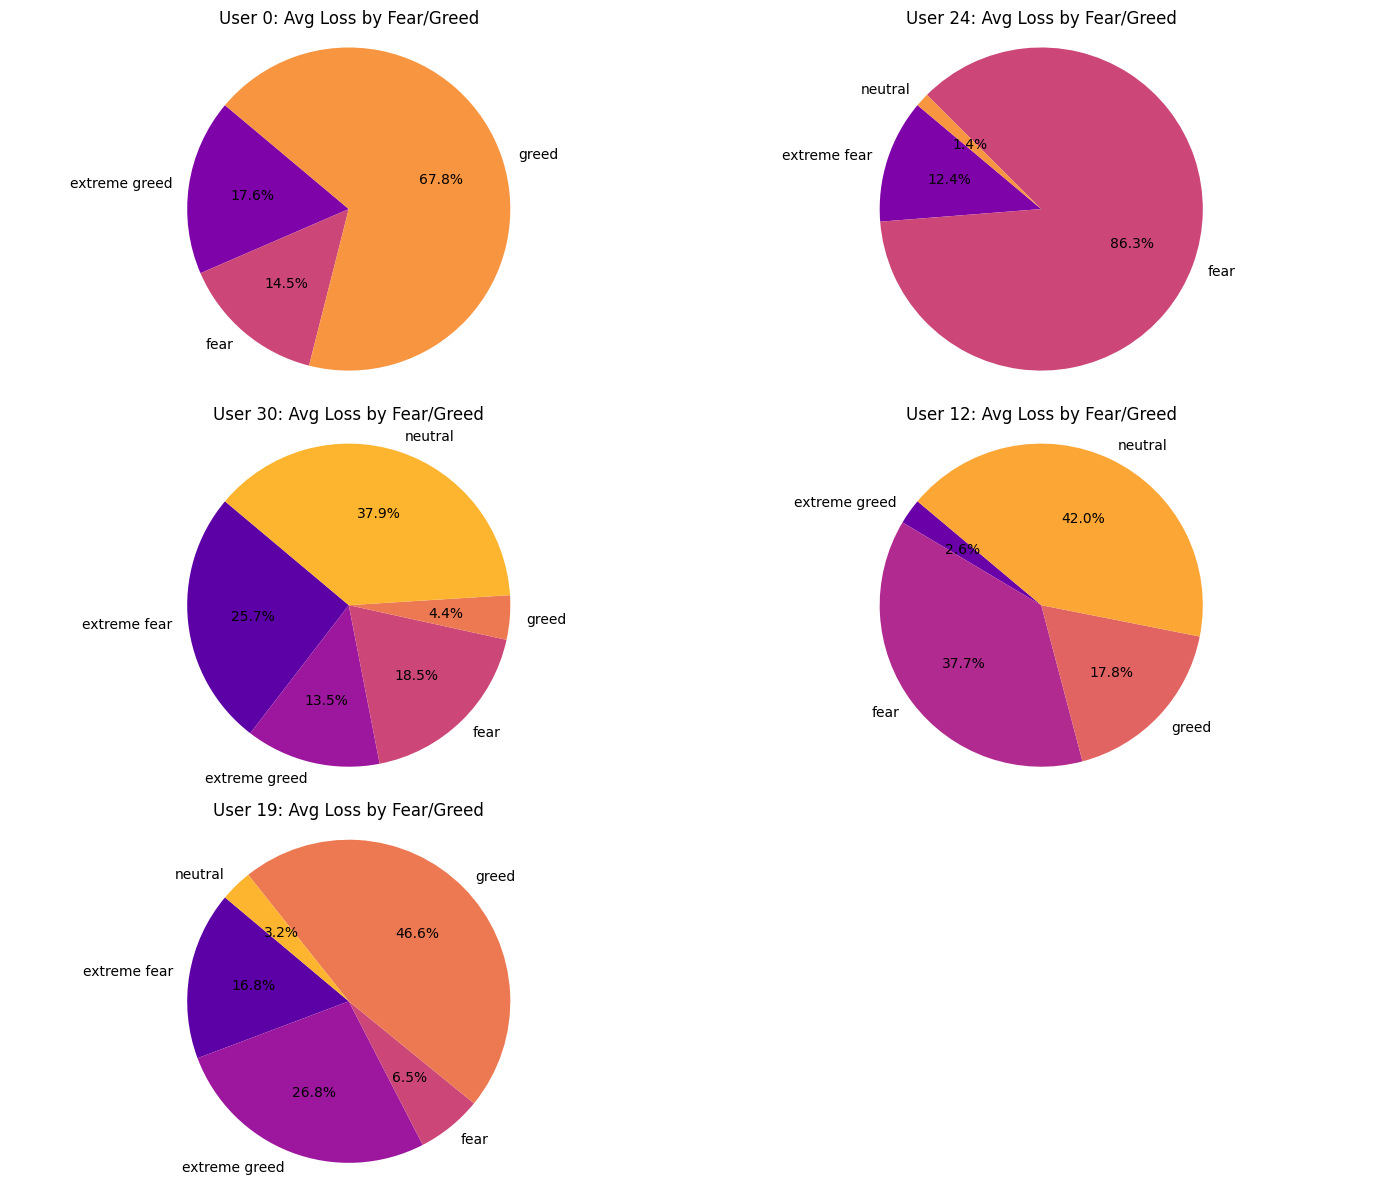

In [ ]:
# Filter only losing trades
losing_trades_df = df[df['PnL'] < 0].copy()

# Calculate mean absolute loss per user
average_loss_by_user = losing_trades_df.groupby('User_Id')['PnL'].mean().abs()

# Top 5 loss-making users
top_5_loss_users = average_loss_by_user.sort_values(ascending=False).head(5).index.tolist()

# Filter trades for those users
top_loss_trades = df[(df['User_Id'].isin(top_5_loss_users)) &
                            (df['PnL'] < 0)].copy()

# Create 3×2 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plot pie charts
for i, user_id in enumerate(top_5_loss_users):
    user_losing_trades = top_loss_trades[top_loss_trades['User_Id'] == user_id].copy()
    average_loss_by_fear_greed_user = user_losing_trades.groupby('Fear/Greed')['PnL'].mean().abs()

    axes[i].pie(
        average_loss_by_fear_greed_user,
        labels=average_loss_by_fear_greed_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('plasma', len(average_loss_by_fear_greed_user))
    )
    axes[i].set_title(f'User {user_id}: Avg Loss by Fear/Greed')
    axes[i].axis('equal')

# Hide unused subplot (6th)
if len(top_5_loss_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


**Reasoning**:
Identify the top 5 loss-making users, calculate their average execution price during each time of day, and generate a pie chart showing the distribution of these average execution prices for each of these users.



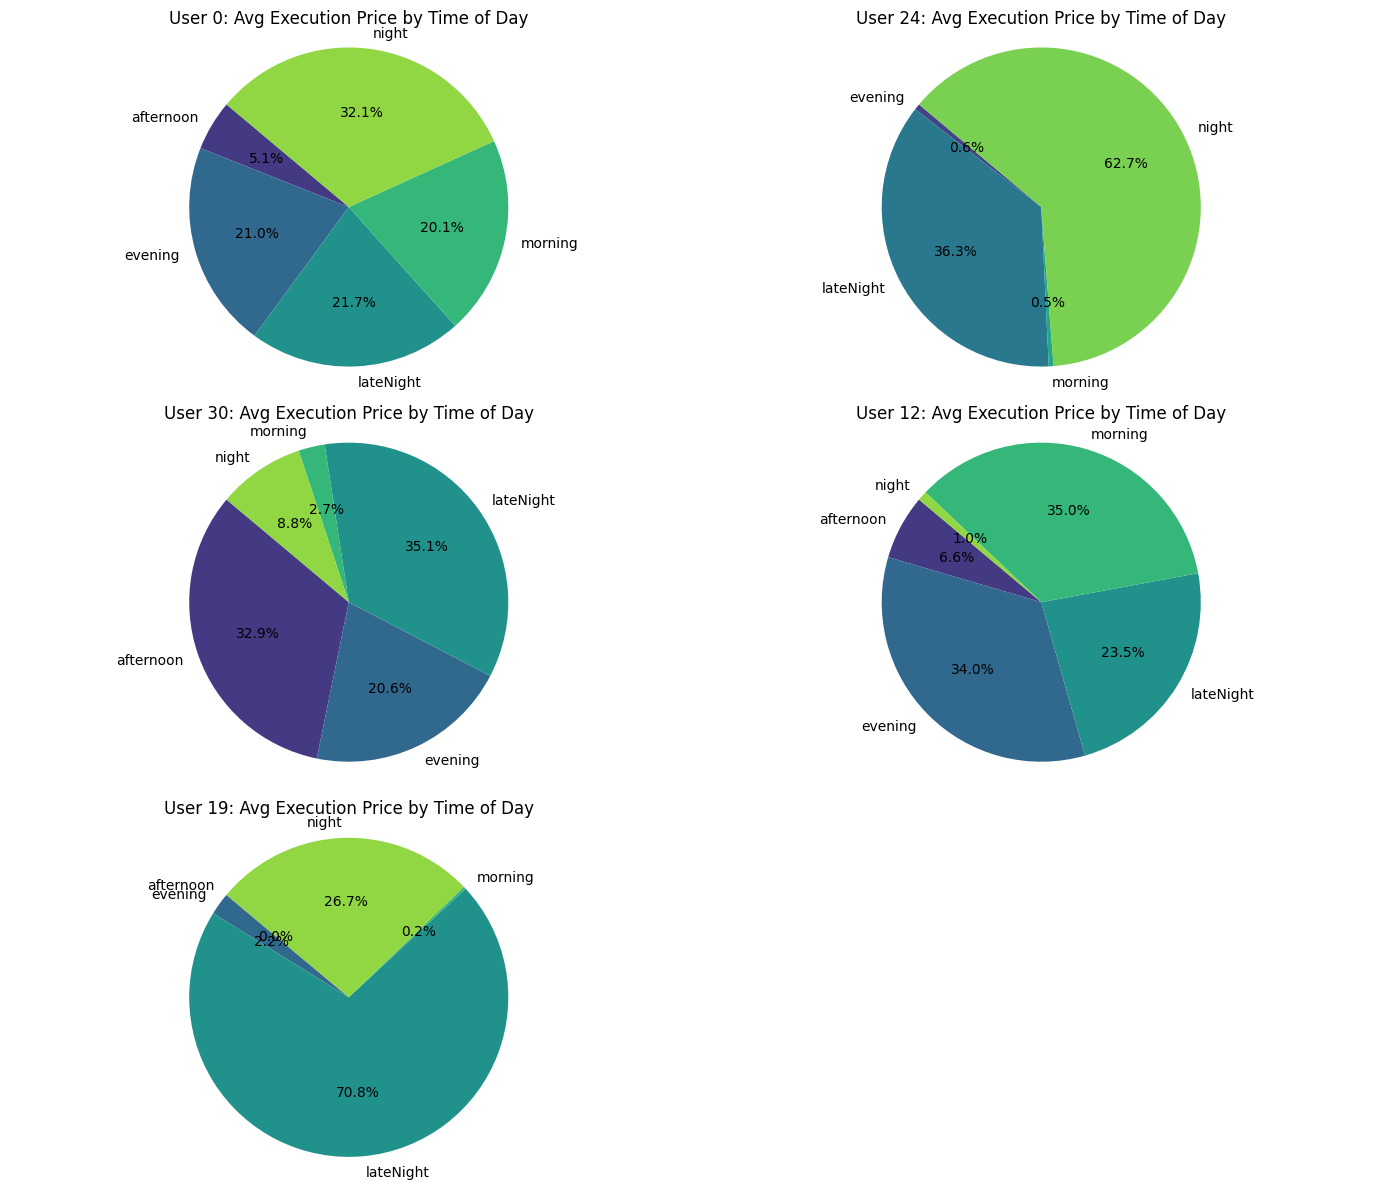

In [ ]:
# Filter the DataFrame to include only trades with a negative 'PnL'
losing_trades_df = df[df['PnL'] < 0].copy()

# Group by 'User_Id' and calculate the absolute mean of 'PnL'
average_loss_by_user = losing_trades_df.groupby('User_Id')['PnL'].mean().abs()

# Sort and select the top 5 user IDs
top_5_loss_users = average_loss_by_user.sort_values(ascending=False).head(5).index.tolist()

# Filter the original DataFrame for these top 5 users and negative PnL
top_loss_trades = df[(df['User_Id'].isin(top_5_loss_users)) & (df['PnL'] < 0)].copy()

# Create subplots (3 rows × 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generate a pie chart for each user
for i, user_id in enumerate(top_5_loss_users):
    user_losing_trades = top_loss_trades[top_loss_trades['User_Id'] == user_id].copy()
    average_execution_price_by_timeofday_user = user_losing_trades.groupby('TimeofDay')['Execution_Price'].mean()

    axes[i].pie(
        average_execution_price_by_timeofday_user,
        labels=average_execution_price_by_timeofday_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('viridis', len(average_execution_price_by_timeofday_user))
    )
    axes[i].set_title(f'User {user_id}: Avg Execution Price by Time of Day')
    axes[i].axis('equal')

# Hide the unused 6th subplot
if len(top_5_loss_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


**Reasoning**:
Identify the top 5 loss-making users, calculate their average execution price during each fear/greed category, and generate a pie chart showing the distribution of these average execution prices for each of these users.



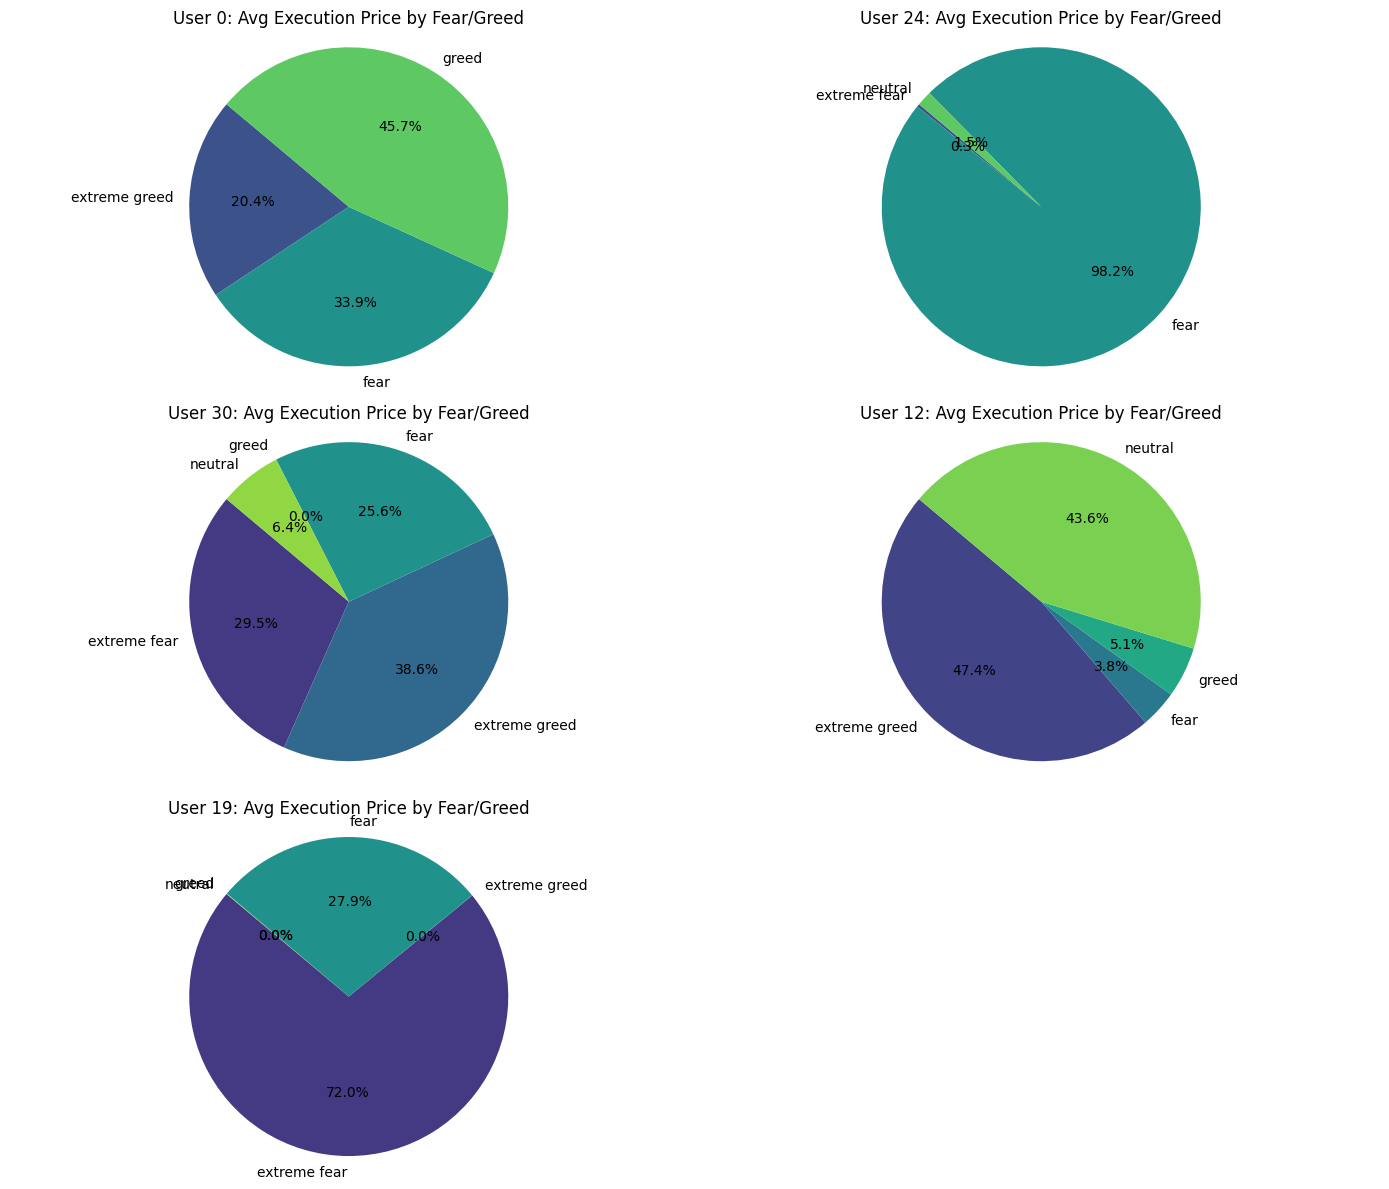

In [ ]:
# Filter the DataFrame to include only trades with a negative 'PnL'.
losing_trades_df = df[df['PnL'] < 0].copy()

# Group by 'User_Id' and calculate the absolute mean of 'PnL'.
average_loss_by_user = losing_trades_df.groupby('User_Id')['PnL'].mean().abs()

# Sort and select the top 5 user IDs.
top_5_loss_users = average_loss_by_user.sort_values(ascending=False).head(5).index.tolist()

# Filter the original DataFrame for these top 5 users and negative PnL.
top_loss_trades = df[(df['User_Id'].isin(top_5_loss_users)) &
                            (df['PnL'] < 0)].copy()

# Create a 3-row × 2-column grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generate pie charts
for i, user_id in enumerate(top_5_loss_users):
    # Filter trades for the current user
    user_losing_trades = top_loss_trades[top_loss_trades['User_Id'] == user_id].copy()

    # Group by 'Fear/Greed' and calculate the average 'Execution_Price'
    average_execution_price_by_fear_greed_user = user_losing_trades.groupby('Fear/Greed')['Execution_Price'].mean()

    # Generate pie chart
    axes[i].pie(
        average_execution_price_by_fear_greed_user,
        labels=average_execution_price_by_fear_greed_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('viridis', len(average_execution_price_by_fear_greed_user))
    )

    axes[i].set_title(f'User {user_id}: Avg Execution Price by Fear/Greed')
    axes[i].axis('equal')

# Hide the unused 6th subplot
if len(top_5_loss_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


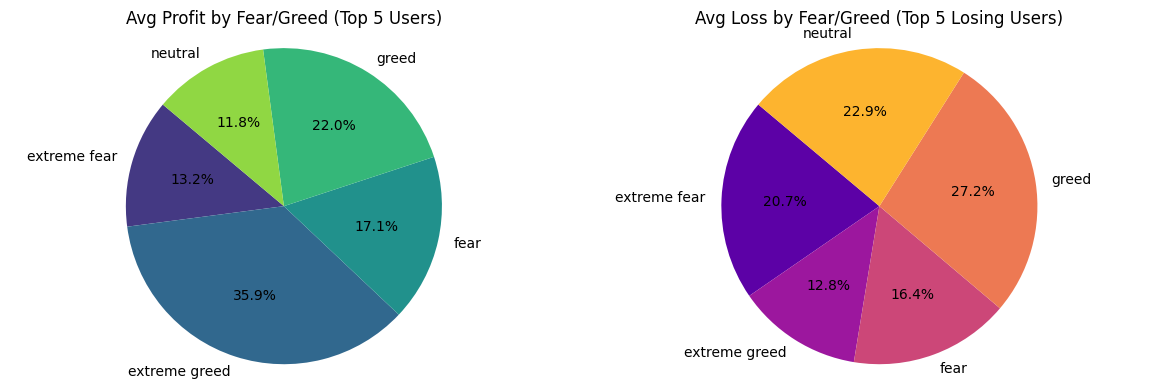

In [ ]:
# ---- Top 5 Profitable Users (already defined in previous step) ----
# top_5_profit_users = ...

top_profit_trades = df[(df['PnL'] > 0) &
                              (df['User_Id'].isin(top_5_profit_users))].copy()

average_profit_top_users_fear_greed = top_profit_trades.groupby('Fear/Greed')['PnL'].mean()


# ---- Top 5 Loss-Making Users ----
losing_trades_df = df[df['PnL'] < 0].copy()
average_loss_by_user = losing_trades_df.groupby('User_Id')['PnL'].mean().abs()
top_5_loss_users = average_loss_by_user.sort_values(ascending=False).head(5).index.tolist()

top_loss_trades = df[(df['User_Id'].isin(top_5_loss_users)) &
                            (df['PnL'] < 0)].copy()

average_loss_top_users_fear_greed = top_loss_trades.groupby('Fear/Greed')['PnL'].mean().abs()

# ---- Plot Side-by-Side Pie Charts ----
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Profit Pie
axs[0].pie(
    average_profit_top_users_fear_greed,
    labels=average_profit_top_users_fear_greed.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(average_profit_top_users_fear_greed))
)
axs[0].set_title('Avg Profit by Fear/Greed (Top 5 Users)')
axs[0].axis('equal')

# Loss Pie
axs[1].pie(
    average_loss_top_users_fear_greed,
    labels=average_loss_top_users_fear_greed.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('plasma', len(average_loss_top_users_fear_greed))
)
axs[1].set_title('Avg Loss by Fear/Greed (Top 5 Losing Users)')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


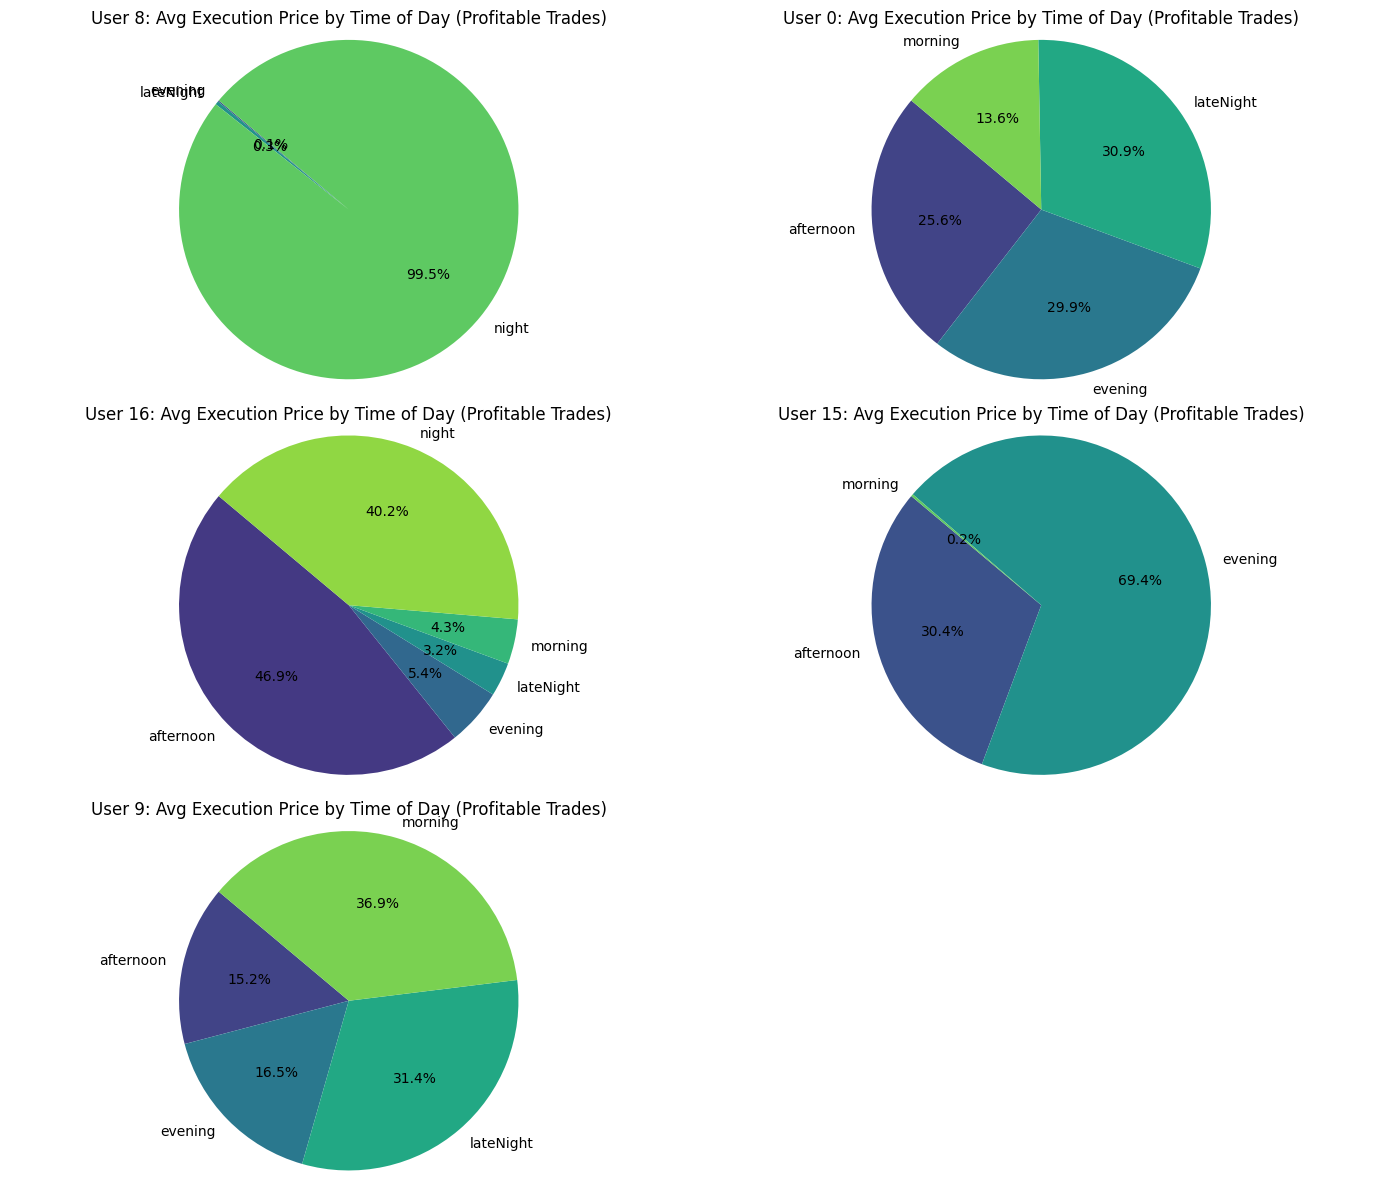

In [ ]:
# Calculate the average profit for each user across all times of day
average_profit_by_user = df[df['PnL'] > 0] \
    .groupby('User_Id')['PnL'].mean().sort_values(ascending=False)

# Get the top 5 users by average profit
top_5_profit_users = average_profit_by_user.head(5).index.tolist()

# Filter the profitable trades data for the top 5 profit users
top_profit_trades = df[(df['PnL'] > 0) &
                              (df['User_Id'].isin(top_5_profit_users))].copy()

# Create subplots: 3 rows × 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generate pie chart for each user
for i, user_id in enumerate(top_5_profit_users):
    user_profitable_trades = top_profit_trades[top_profit_trades['User_Id'] == user_id].copy()

    average_execution_price_by_timeofday_user = user_profitable_trades.groupby('TimeofDay')['Execution_Price'].mean()

    axes[i].pie(
        average_execution_price_by_timeofday_user,
        labels=average_execution_price_by_timeofday_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('viridis', len(average_execution_price_by_timeofday_user))
    )
    axes[i].set_title(f'User {user_id}: Avg Execution Price by Time of Day (Profitable Trades)')
    axes[i].axis('equal')

# Hide the unused 6th plot
if len(top_5_profit_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


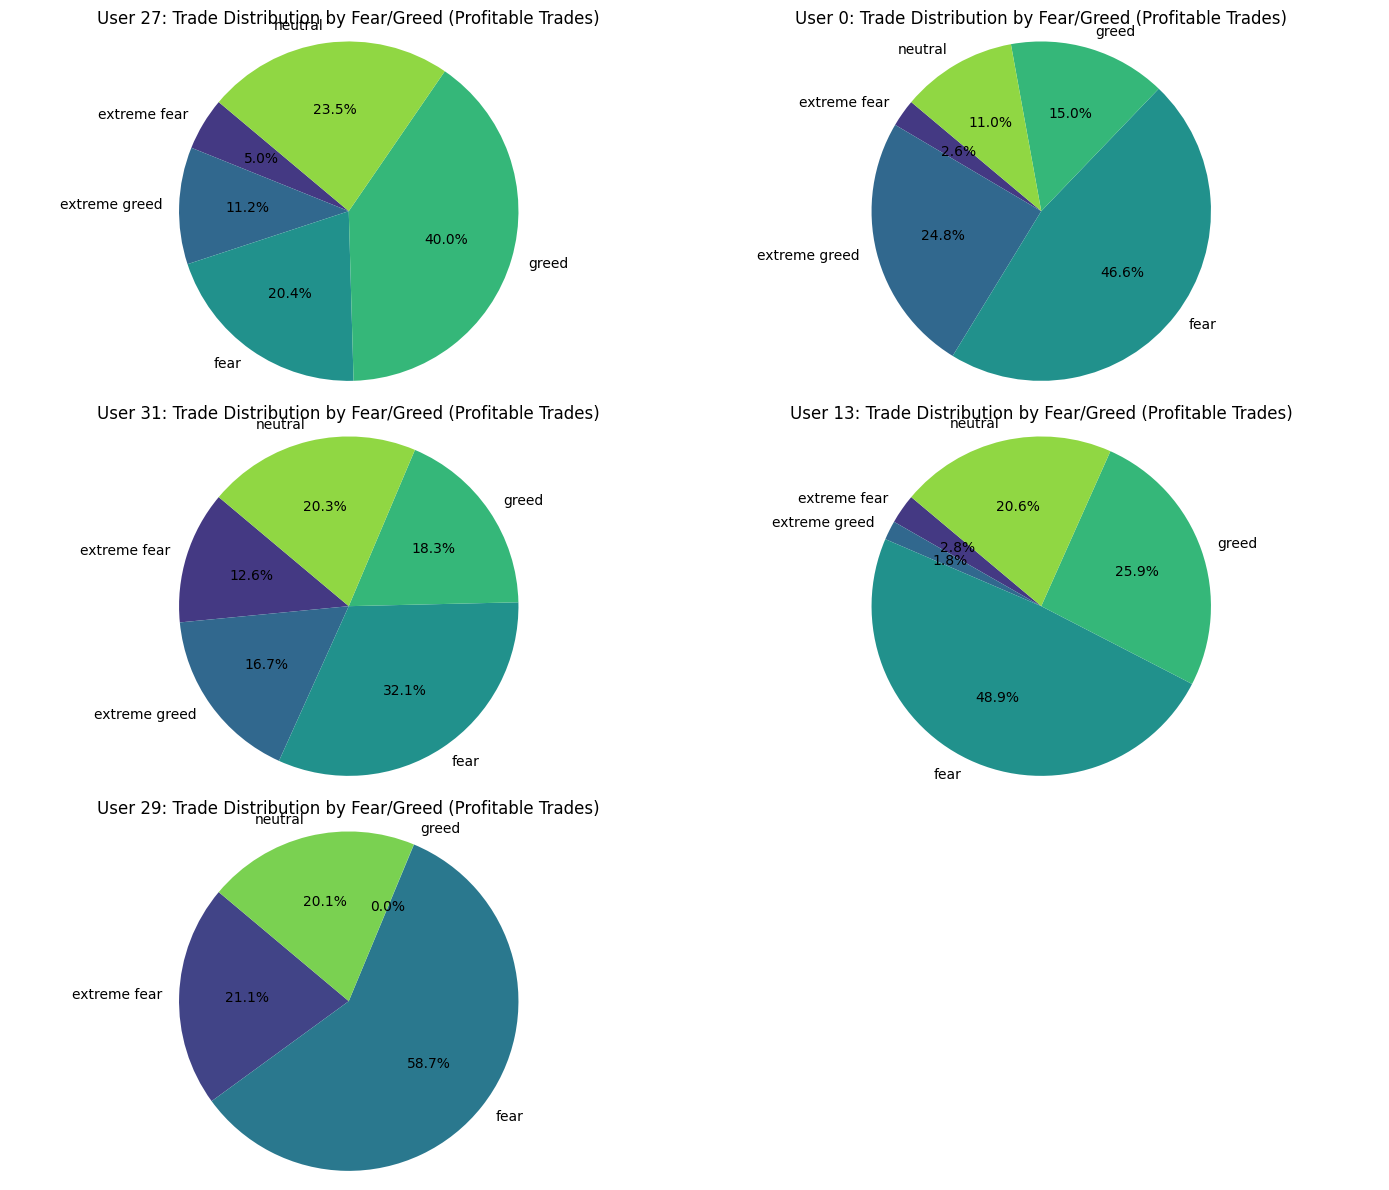

In [ ]:
# Calculate the total profit for each user to identify top profitable users
total_profit_by_user = df[df['PnL'] > 0] \
    .groupby('User_Id')['PnL'].sum().sort_values(ascending=False)

top_5_profit_users = total_profit_by_user.head(5).index.tolist()

# Filter the DataFrame for the top 5 profitable users
top_profitable_trades_df = df[df['User_Id'].isin(top_5_profit_users)].copy()

# Create subplots: 3 rows × 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generate pie chart for each user
for i, user_id in enumerate(top_5_profit_users):
    user_profitable_trades = top_profitable_trades_df[top_profitable_trades_df['User_Id'] == user_id].copy()

    trade_counts_by_fear_greed_user = user_profitable_trades.groupby('Fear/Greed').size()

    axes[i].pie(
        trade_counts_by_fear_greed_user,
        labels=trade_counts_by_fear_greed_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('viridis', len(trade_counts_by_fear_greed_user))
    )
    axes[i].set_title(f'User {user_id}: Trade Distribution by Fear/Greed (Profitable Trades)')
    axes[i].axis('equal')

# Hide the unused 6th plot
if len(top_5_profit_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


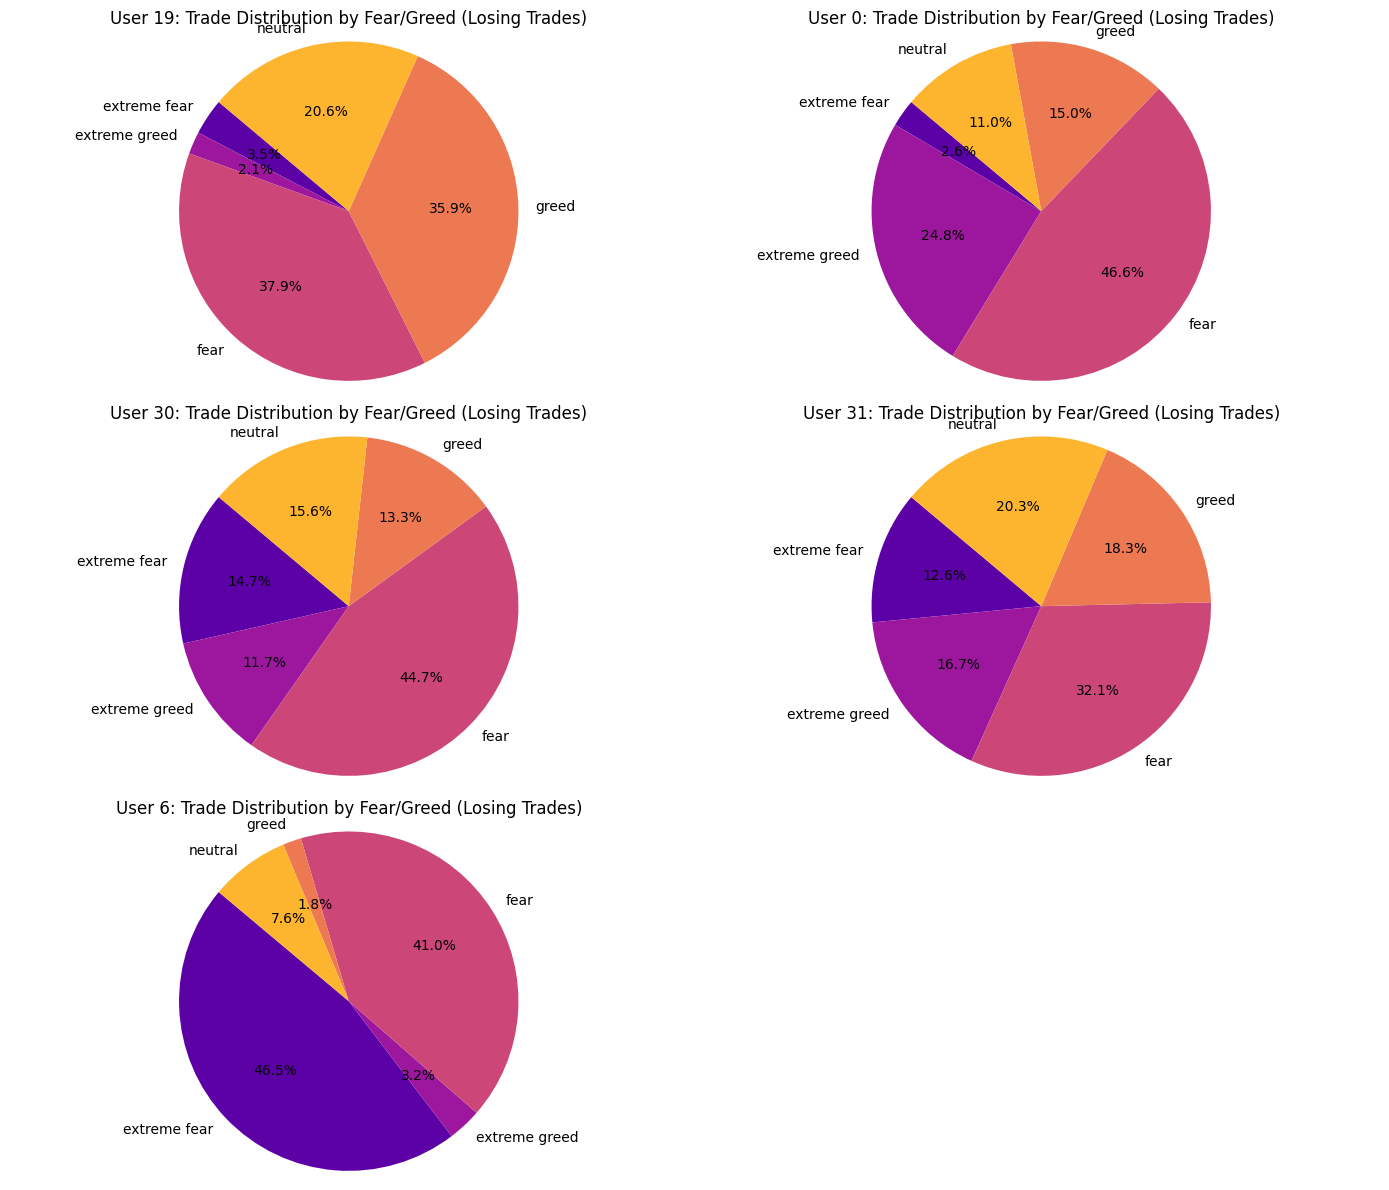

In [ ]:
# Calculate the total loss for each user to identify top loss-making users
total_loss_by_user = df[df['PnL'] < 0] \
    .groupby('User_Id')['PnL'].sum().abs().sort_values(ascending=False)

top_5_loss_users = total_loss_by_user.head(5).index.tolist()

# Filter the DataFrame for the top 5 loss-making users
top_loss_trades_df = df[df['User_Id'].isin(top_5_loss_users)].copy()

# Create subplots: 3 rows × 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generate pie chart for each user
for i, user_id in enumerate(top_5_loss_users):
    user_losing_trades = top_loss_trades_df[top_loss_trades_df['User_Id'] == user_id].copy()

    trade_counts_by_fear_greed_user = user_losing_trades.groupby('Fear/Greed').size()

    axes[i].pie(
        trade_counts_by_fear_greed_user,
        labels=trade_counts_by_fear_greed_user.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('plasma', len(trade_counts_by_fear_greed_user))
    )
    axes[i].set_title(f'User {user_id}: Trade Distribution by Fear/Greed (Losing Trades)')
    axes[i].axis('equal')

# Hide unused 6th subplot
if len(top_5_loss_users) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


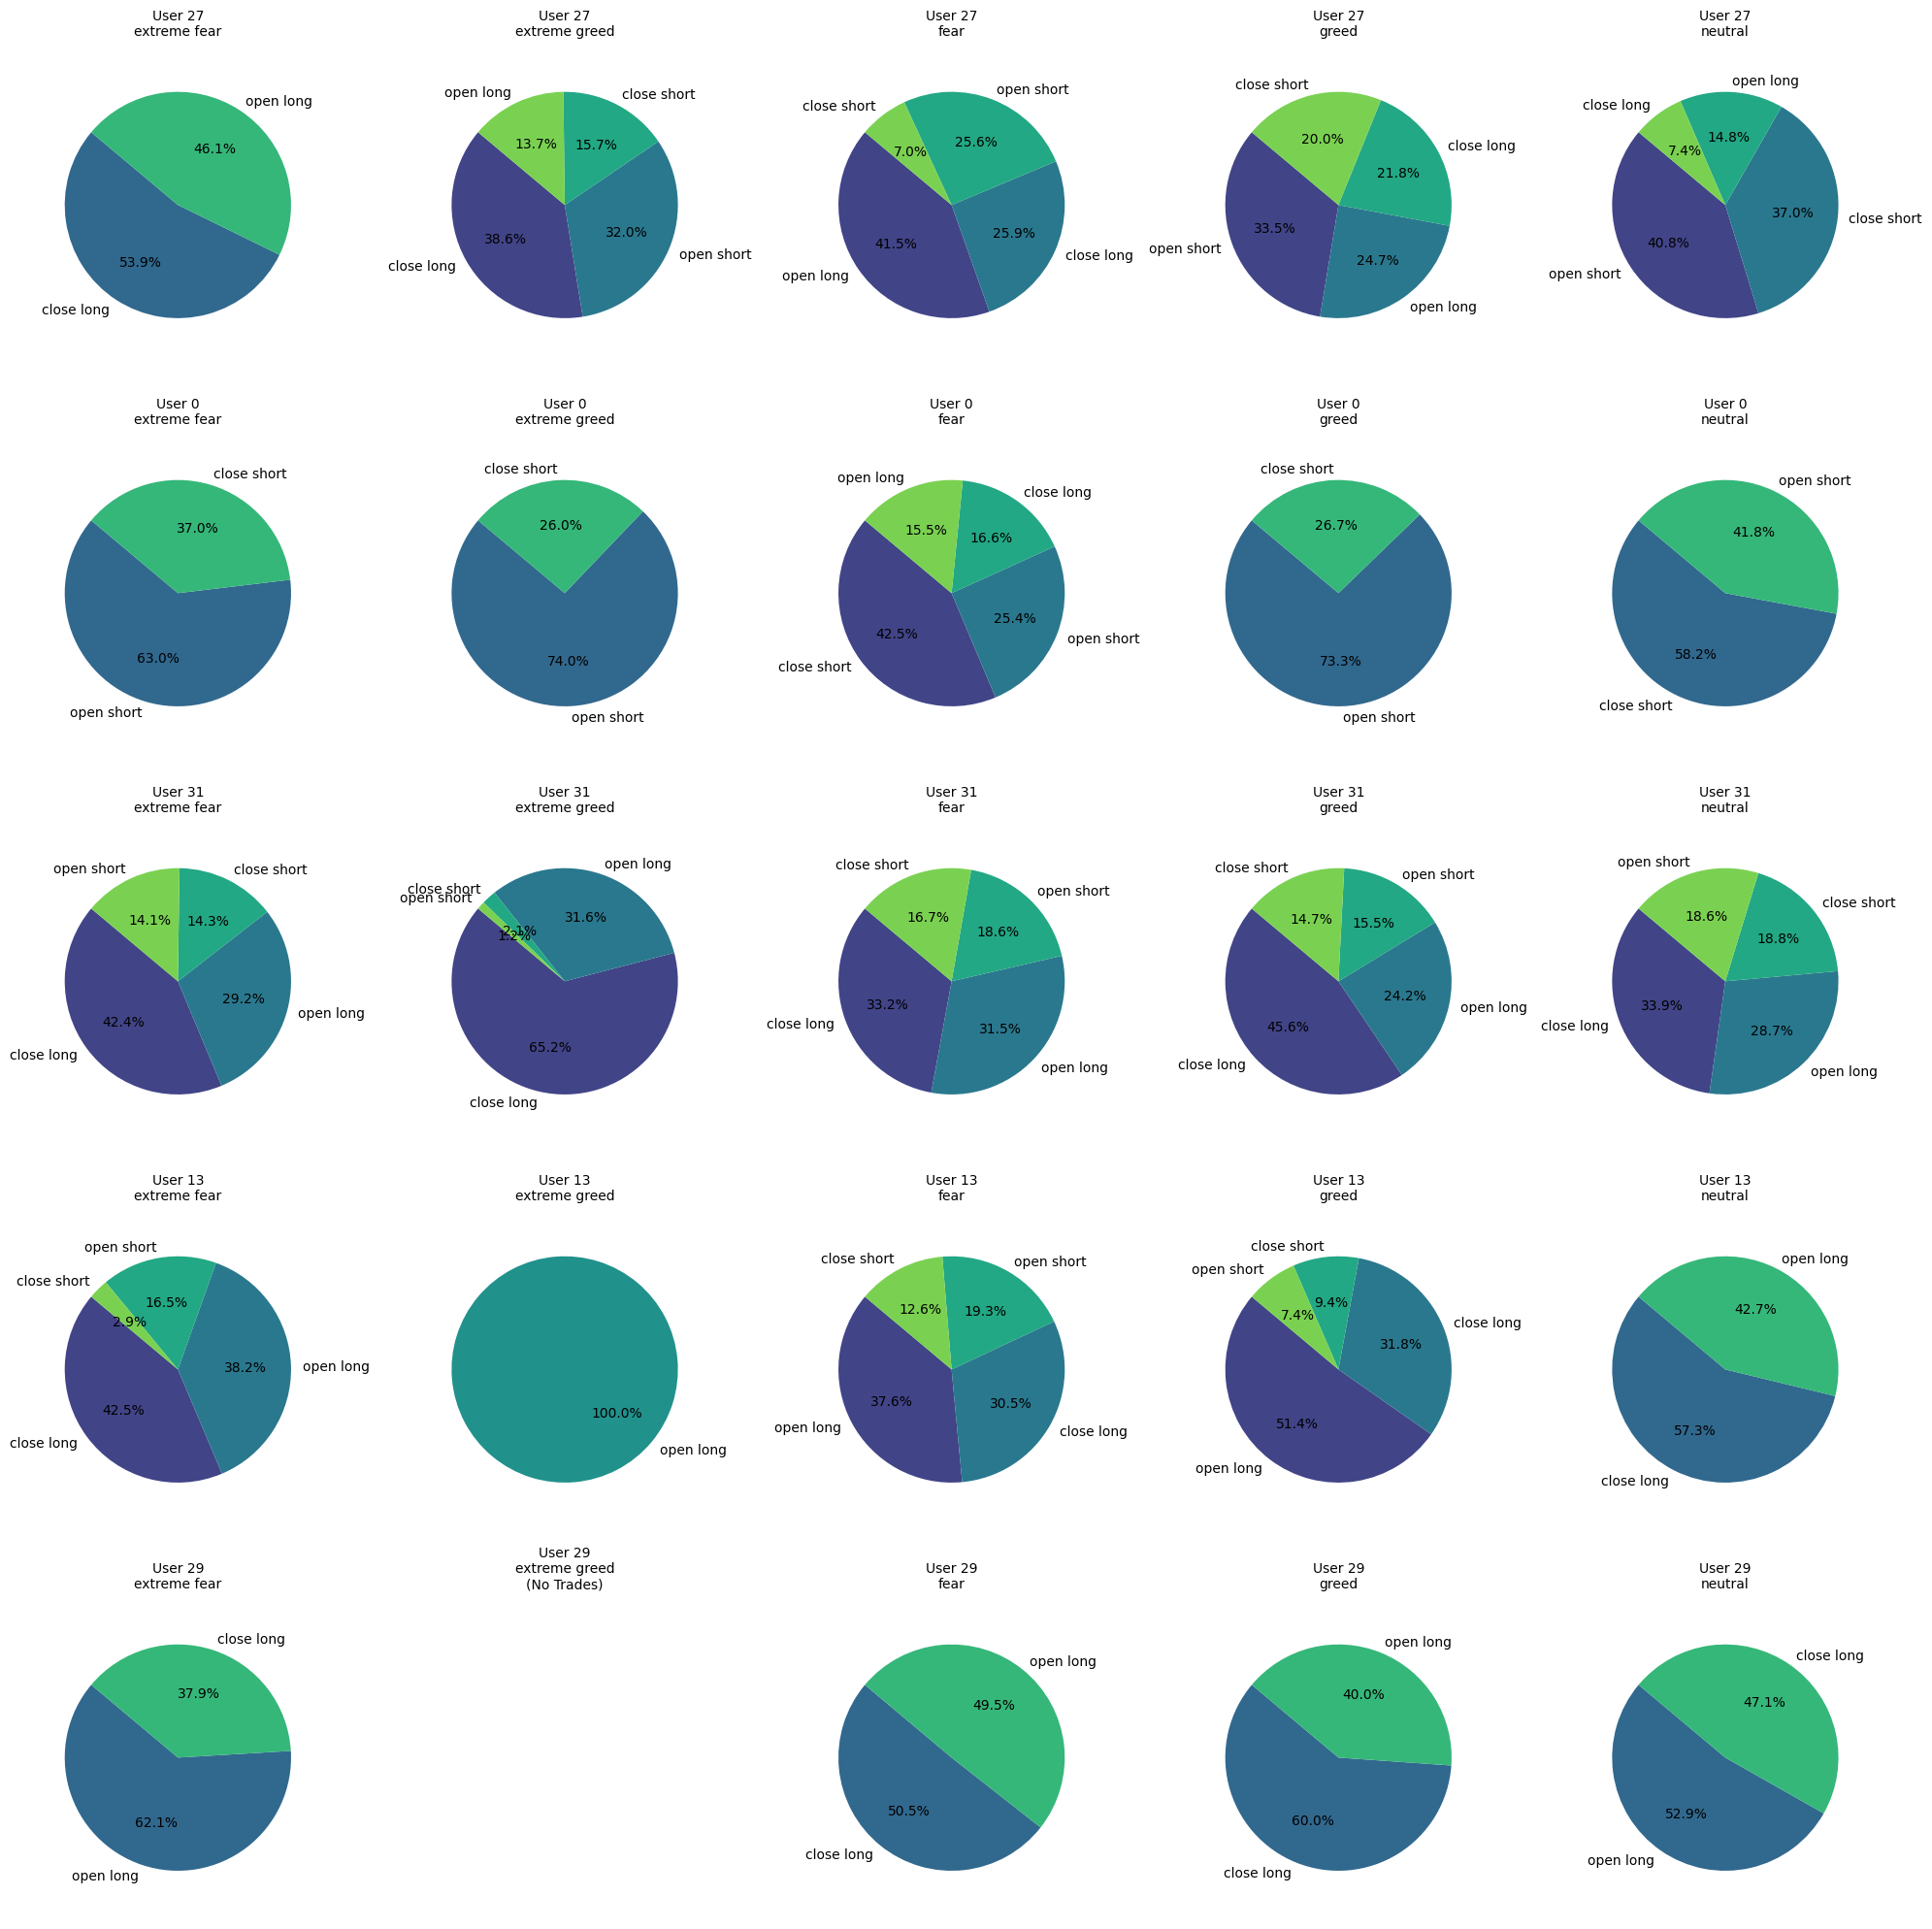

In [ ]:
# Step 1: Get top 5 profitable users
total_profit_by_user = df[df['PnL'] > 0] \
    .groupby('User_Id')['PnL'].sum().sort_values(ascending=False)

top_5_profit_users = total_profit_by_user.head(5).index.tolist()

# Step 2: Filter for these users
top_profitable_trades_df = df[df['User_Id'].isin(top_5_profit_users)].copy()

# Step 3: Get unique Fear/Greed categories
fear_greed_categories = df['Fear/Greed'].dropna().unique()
fear_greed_categories = sorted(fear_greed_categories, key=str)  # Sort for consistent layout

# Step 4: Setup subplot grid: 5 users × len(fear_greed_categories)
rows = len(top_5_profit_users) # 5 users
cols = len(fear_greed_categories) # 5 categories

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 4 * rows)) # Adjusted figsize
axes = axes.flatten()

# Step 5: Create pie charts
plot_index = 0
for user_id in top_5_profit_users:
    user_trades = top_profitable_trades_df[top_profitable_trades_df['User_Id'] == user_id]

    for category in fear_greed_categories:
        ax = axes[plot_index]
        plot_index += 1

        category_trades = user_trades[user_trades['Fear/Greed'] == category]
        direction_counts = category_trades['Direction'].value_counts()

        if not direction_counts.empty:
            ax.pie(
                direction_counts,
                labels=direction_counts.index,
                autopct='%1.1f%%',
                startangle=140,
                colors=sns.color_palette('viridis', len(direction_counts))
            )
            ax.set_title(f'User {user_id}\n{category}', fontsize=10)
            ax.axis('equal')
        else:
            ax.axis('off')
            ax.set_title(f'User {user_id}\n{category}\n(No Trades)', fontsize=10)

# Step 6: Hide any unused axes (should not be any with 5x5 grid for 25 plots)
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

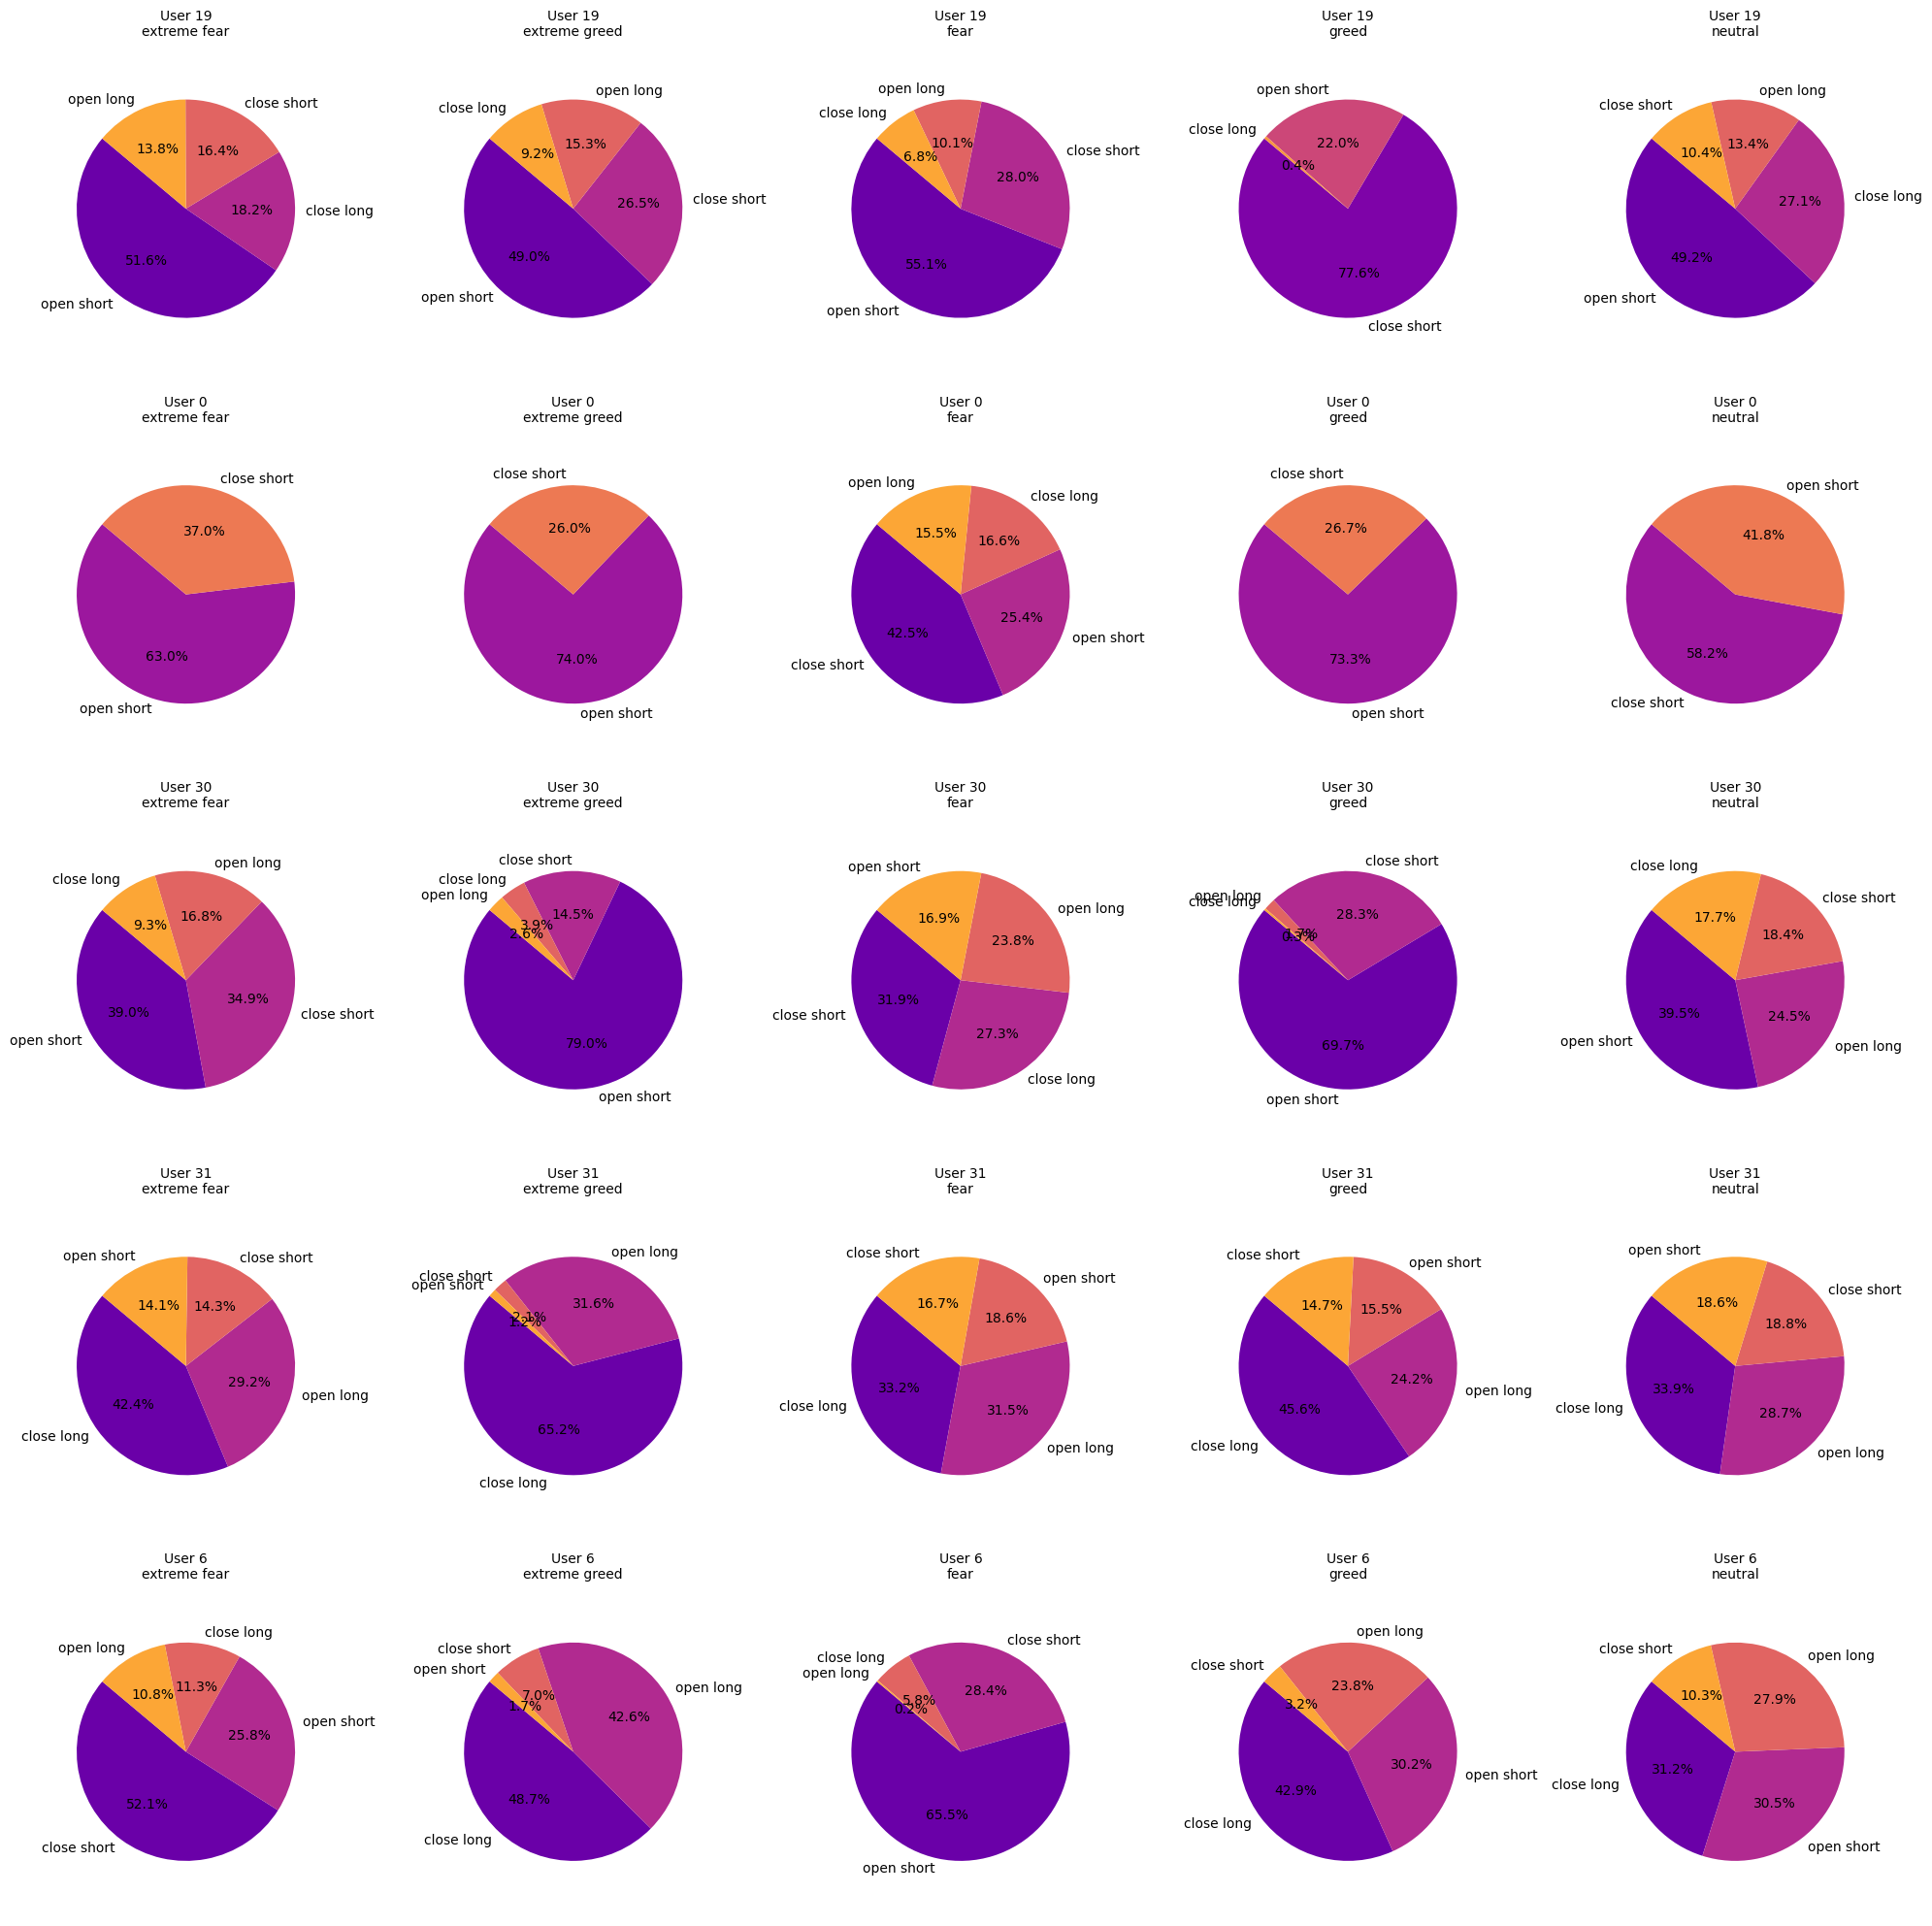

In [ ]:
# Calculate the total loss for each user to identify top loss making users
total_loss_by_user = df[df['PnL'] < 0].groupby('User_Id')['PnL'].sum().abs().sort_values(ascending=False)
top_5_loss_users = total_loss_by_user.head(5).index.tolist()

# Filter the DataFrame for the top 5 loss making users
top_loss_trades_df = df[df['User_Id'].isin(top_5_loss_users)].copy()

# Get unique Fear/Greed categories
fear_greed_categories = df['Fear/Greed'].dropna().unique() # Use dropna() to handle potential NaNs
fear_greed_categories = sorted(fear_greed_categories, key=str)  # Sort for consistent layout

# Create a 5x5 grid of subplots for the 5 users and 5 fear/greed categories
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(4 * 5, 4 * 5)) # Adjusted grid size and figsize
axes = axes.flatten() # Flatten the array of axes for easy iteration

plot_index = 0
for user_id in top_5_loss_users:
    # Filter trades for the current user
    user_losing_trades = top_loss_trades_df[top_loss_trades_df['User_Id'] == user_id].copy()

    for category in fear_greed_categories:
        ax = axes[plot_index]
        plot_index += 1

        # Filter trades for the current Fear/Greed category
        category_trades = user_losing_trades[user_losing_trades['Fear/Greed'] == category].copy()

        # Group by 'Direction' and count the number of trades.
        direction_counts = category_trades['Direction'].value_counts()

        # Generate a pie chart if there are trades in this category and direction
        if not direction_counts.empty:
            ax.pie(direction_counts, labels=direction_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(direction_counts)))
            ax.set_title(f'User {user_id}\n{category}', fontsize=10)
            ax.axis('equal')
        else:
            # Hide the axis if there are no trades in this category
            ax.axis('off')
            ax.set_title(f'User {user_id}\n{category}\n(No Trades)', fontsize=10)

# Hide any unused axes (should not be any with 5x5 grid for 25 plots)
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the frequency of each coin
coin_counts = df['Coin'].value_counts()

# Display the most frequently traded coins
print("Most Frequently Traded Coins:")
display(coin_counts.head(10)) # Displaying top 10 coins for brevity

Most Frequently Traded Coins:


Coin
hype         68005
@107         29992
btc          26064
eth          11158
sol          10691
fartcoin      4650
melania       4428
purr/usdc     2774
wld           1983
sui           1979
Name: count, dtype: int64

In [ ]:
# Calculate the average execution price
average_execution_price = df['Execution_Price'].mean()
print(f"Average Execution Price: {average_execution_price:.2f}")

# Calculate the average size in tokens
average_size_tokens = df['Size_Tokens'].mean()
print(f"Average Size (Tokens): {average_size_tokens:.2f}")

# Calculate the average total amount (size in USD)
average_total_amount = df['Total_Amount'].mean()
print(f"Average Total Amount (USD): {average_total_amount:.2f}")

Average Execution Price: 11415.05
Average Size (Tokens): 4623.34
Average Total Amount (USD): 5639.19


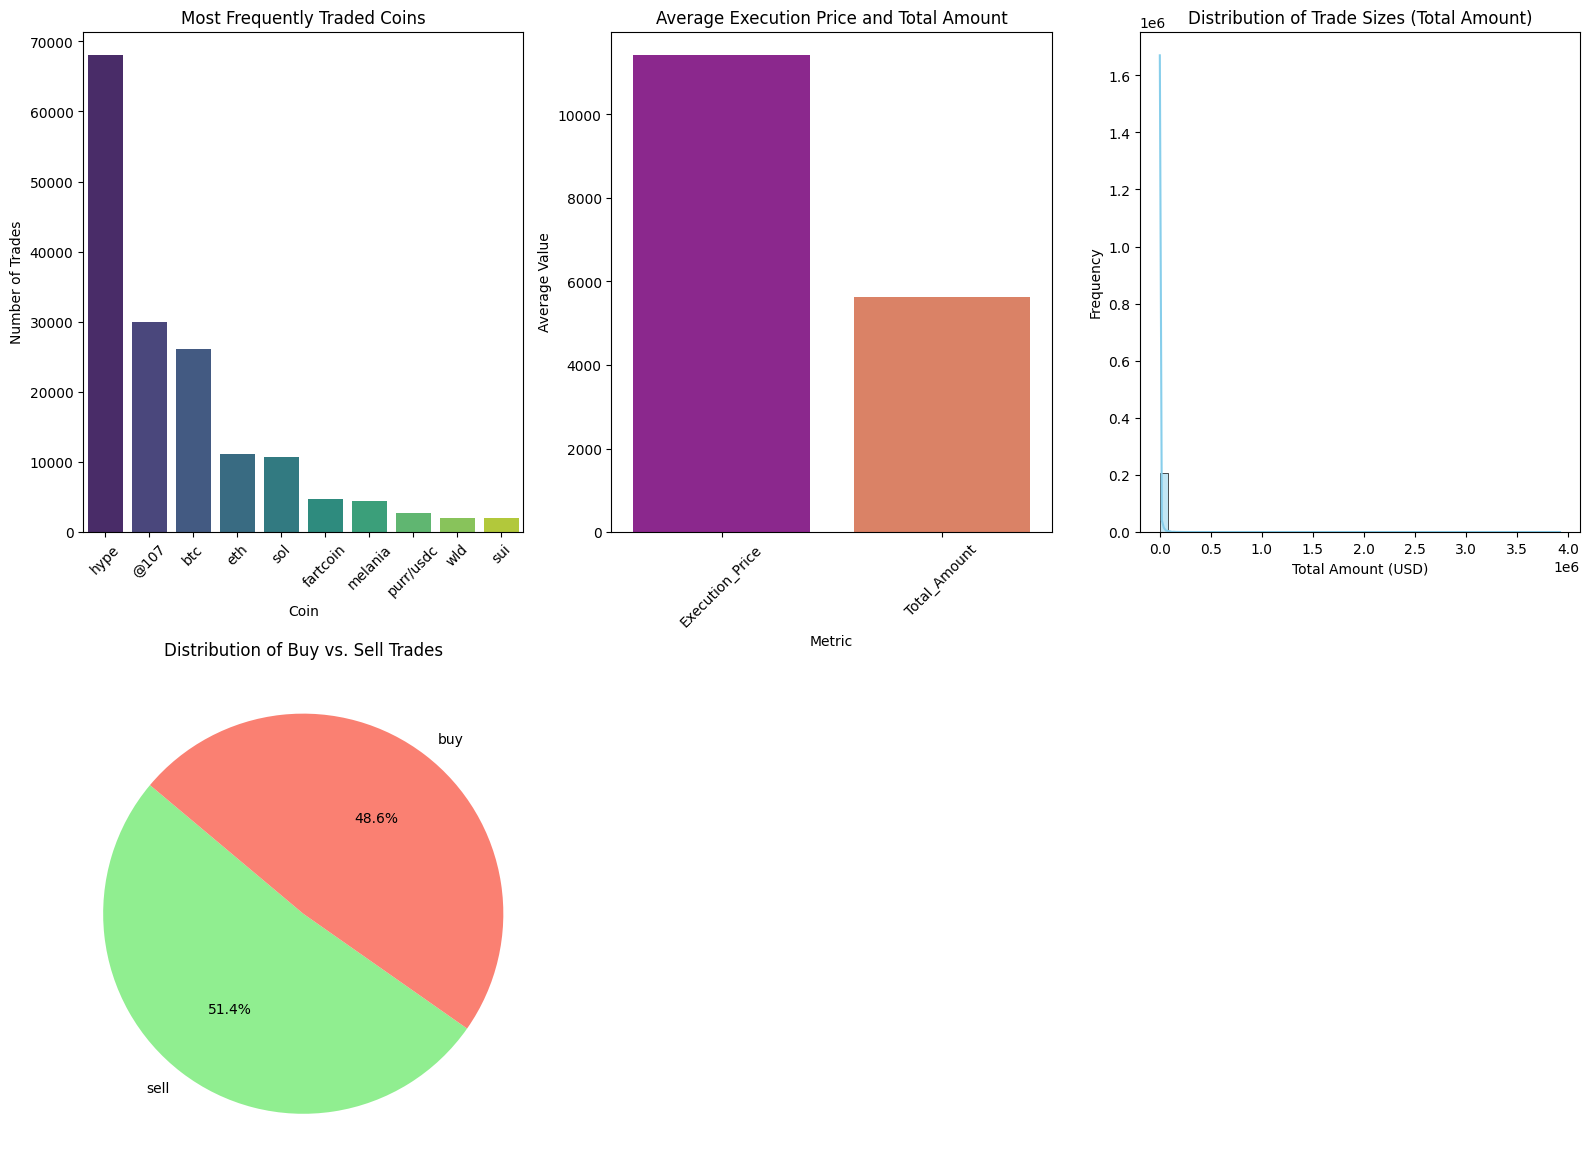


Typical Holding Duration:
Calculating typical holding duration requires matching buy and sell trades for the same coin by the same user and determining the time difference. This is a complex operation and cannot be easily visualized in the requested grid format. It would require a more in-depth analysis involving sorting and pairing trades.


In [ ]:
# Set default figure size
plt.rcParams['figure.figsize'] = (8, 6)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 12)) # Adjust figure size for a 2x3 grid
axes = axes.flatten() # Flatten the 2x3 array to easily iterate

# 1. Most Frequently Traded Coins (using a bar plot)
coin_counts = df['Coin'].value_counts().head(10) # Top 10 coins
sns.barplot(x=coin_counts.index, y=coin_counts.values, ax=axes[0], palette='viridis', hue=coin_counts.index, legend=False)
axes[0].set_title('Most Frequently Traded Coins')
axes[0].set_xlabel('Coin')
axes[0].set_ylabel('Number of Trades')
axes[0].tick_params(axis='x', rotation=45)

# 2. Average Execution Price and Size (using bar plots for metrics)
# This is a bit tricky to show on a single plot with different scales.
# Let's show average execution price and average total amount as separate bars.
avg_metrics = df[['Execution_Price', 'Total_Amount']].mean()
sns.barplot(x=avg_metrics.index, y=avg_metrics.values, ax=axes[1], palette='plasma', hue=avg_metrics.index, legend=False)
axes[1].set_title('Average Execution Price and Total Amount')
axes[1].set_xlabel('Metric')
axes[1].set_ylabel('Average Value')
axes[1].tick_params(axis='x', rotation=45)


# 3. Distribution of Trade Sizes (using a histogram of Total_Amount)
sns.histplot(df['Total_Amount'], bins=50, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Trade Sizes (Total Amount)')
axes[2].set_xlabel('Total Amount (USD)')
axes[2].set_ylabel('Frequency')


# 4. Buy vs. Sell Trade Counts and Ratio (using a pie chart)
buy_sell_counts = df['Buy/Sell'].value_counts()
axes[3].pie(buy_sell_counts, labels=buy_sell_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
axes[3].set_title('Distribution of Buy vs. Sell Trades')
axes[3].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.


# 5. Typical Holding Duration (This requires calculating durations, which is complex for a single plot in this grid)
# Calculating holding duration requires pairing buy and sell trades for the same coin and user, which is non-trivial
# for a simple plot in this context. I will skip this plot for now in the grid.
# Instead, I will explain this in the summary.

# Hide the last two unused subplots
axes[4].axis('off')
axes[5].axis('off')


plt.tight_layout()
plt.show()

# Explain typical holding duration separately
print("\nTypical Holding Duration:")
print("Calculating typical holding duration requires matching buy and sell trades for the same coin by the same user and determining the time difference. This is a complex operation and cannot be easily visualized in the requested grid format. It would require a more in-depth analysis involving sorting and pairing trades.")

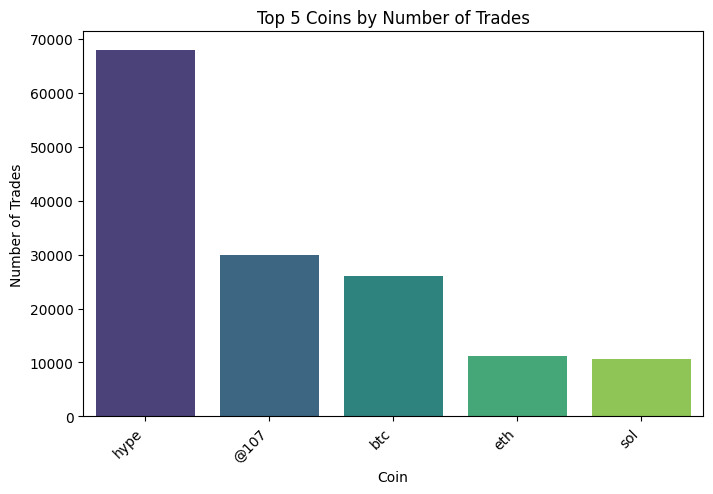

In [ ]:
# Calculate the number of trades for each coin
coin_trade_counts = df['Coin'].value_counts()

# Get the top 5 coins with the highest number of trades
top_5_coins_trades = coin_trade_counts.head(5)

# Create a bar chart for the top 5 coins by number of trades
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_coins_trades.index, y=top_5_coins_trades.values, palette='viridis')
plt.title('Top 5 Coins by Number of Trades')
plt.xlabel('Coin')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.show()

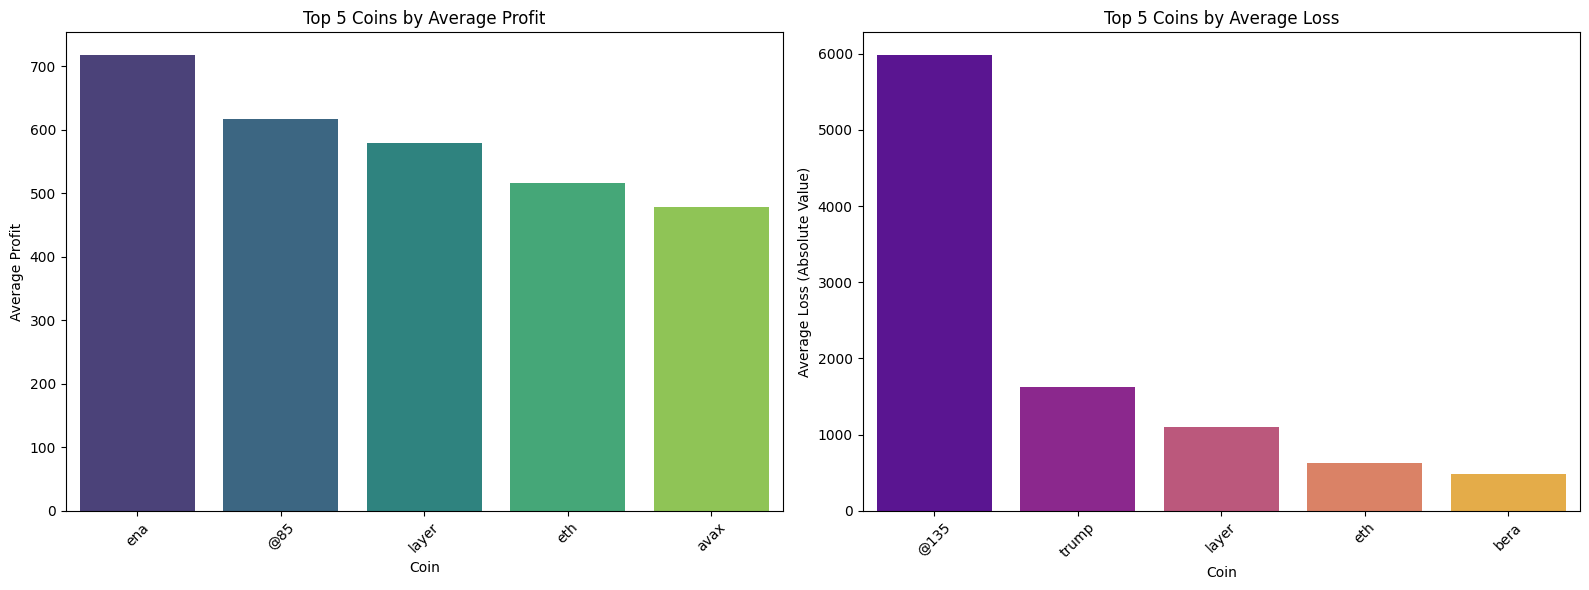

In [ ]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0].copy()

# Calculate the average profit for each coin
average_profit_by_coin = profitable_trades.groupby('Coin')['PnL'].mean().sort_values(ascending=False)

# Get the top 5 coins by average profit
top_5_profitable_coins = average_profit_by_coin.head(5)

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) for each coin
average_loss_by_coin = losing_trades.groupby('Coin')['PnL'].mean().abs().sort_values(ascending=False)

# Get the top 5 coins by average loss
top_5_losing_coins = average_loss_by_coin.head(5)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar chart for top 5 profitable coins
sns.barplot(x=top_5_profitable_coins.index, y=top_5_profitable_coins.values, palette='viridis', ax=axes[0], hue=top_5_profitable_coins.index, legend=False)
axes[0].set_title('Top 5 Coins by Average Profit')
axes[0].set_xlabel('Coin')
axes[0].set_ylabel('Average Profit')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for top 5 losing coins
sns.barplot(x=top_5_losing_coins.index, y=top_5_losing_coins.values, palette='plasma', ax=axes[1], hue=top_5_losing_coins.index, legend=False)
axes[1].set_title('Top 5 Coins by Average Loss')
axes[1].set_xlabel('Coin')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-139-1770405300.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_profit_by_crossed.index, y=average_profit_by_crossed.values, palette='viridis', ax=axes[0])
/tmp/ipython-input-139-1770405300.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loss_by_crossed.index, y=average_loss_by_crossed.values, palette='plasma', ax=axes[1])


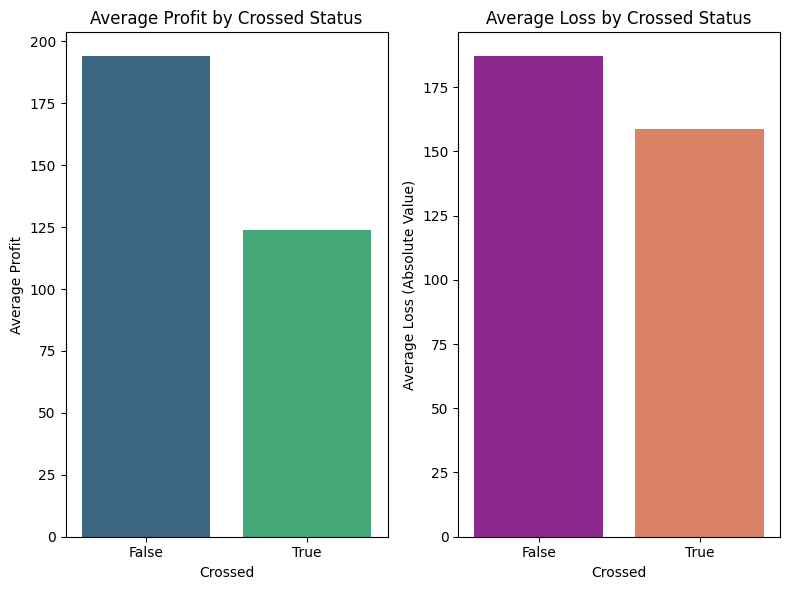

In [ ]:
# Filter for profitable trades (PnL > 0)
profitable_trades = df[df['PnL'] > 0].copy()

# Calculate the average profit when Crossed is True and False
average_profit_by_crossed = profitable_trades.groupby('Crossed')['PnL'].mean()

# Filter for losing trades (PnL < 0)
losing_trades = df[df['PnL'] < 0].copy()

# Calculate the average loss (absolute value) when Crossed is True and False
average_loss_by_crossed = losing_trades.groupby('Crossed')['PnL'].mean().abs()

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Create a bar chart for average profit
sns.barplot(x=average_profit_by_crossed.index, y=average_profit_by_crossed.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Profit by Crossed Status')
axes[0].set_xlabel('Crossed')
axes[0].set_ylabel('Average Profit')
axes[0].set_xticks([0, 1], ['False', 'True'])


# Create a bar chart for average loss
sns.barplot(x=average_loss_by_crossed.index, y=average_loss_by_crossed.values, palette='plasma', ax=axes[1])
axes[1].set_title('Average Loss by Crossed Status')
axes[1].set_xlabel('Crossed')
axes[1].set_ylabel('Average Loss (Absolute Value)')
axes[1].set_xticks([0, 1], ['False', 'True'])


plt.tight_layout()
plt.show()

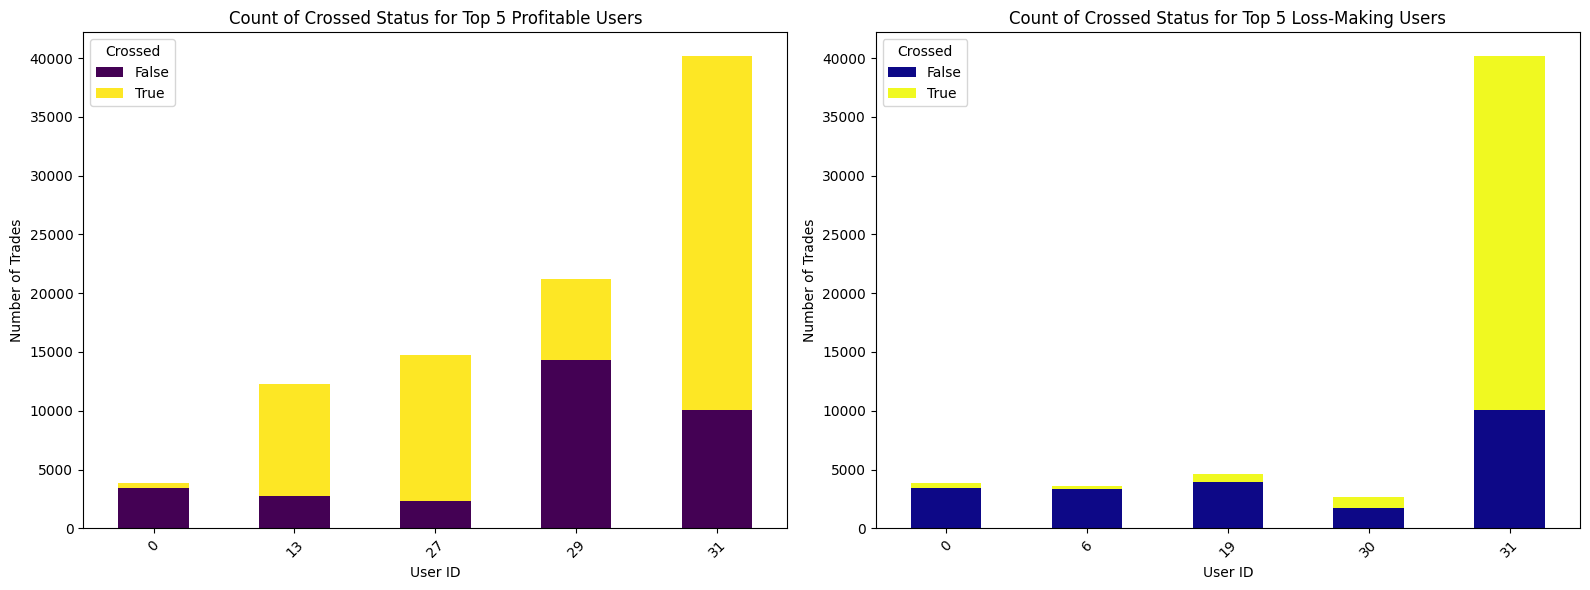

In [ ]:
# Calculate total profit per user to find top 5 profitable users
total_profit_by_user = df[df['PnL'] > 0].groupby('User_Id')['PnL'].sum().sort_values(ascending=False)
top_5_profitable_users = total_profit_by_user.head(5).index.tolist()

# Filter data for top 5 profitable users
top_profitable_trades_df = df[df['User_Id'].isin(top_5_profitable_users)].copy()

# Calculate count of Crossed (True/False) for top profitable users
crossed_counts_profitable_users = top_profitable_trades_df.groupby(['User_Id', 'Crossed']).size().unstack(fill_value=0)

# Calculate total loss per user to find top 5 loss-making users
total_loss_by_user = df[df['PnL'] < 0].groupby('User_Id')['PnL'].sum().abs().sort_values(ascending=False)
top_5_losing_users = total_loss_by_user.head(5).index.tolist()

# Filter data for top 5 loss-making users
top_losing_trades_df = df[df['User_Id'].isin(top_5_losing_users)].copy()

# Calculate count of Crossed (True/False) for top loss-making users
crossed_counts_losing_users = top_losing_trades_df.groupby(['User_Id', 'Crossed']).size().unstack(fill_value=0)

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for top 5 profitable users
crossed_counts_profitable_users.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Count of Crossed Status for Top 5 Profitable Users')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Number of Trades')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Crossed', labels=['False', 'True'])


# Bar chart for top 5 loss-making users
crossed_counts_losing_users.plot(kind='bar', stacked=True, ax=axes[1], colormap='plasma')
axes[1].set_title('Count of Crossed Status for Top 5 Loss-Making Users')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Number of Trades')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Crossed', labels=['False', 'True'])


plt.tight_layout()
plt.show()

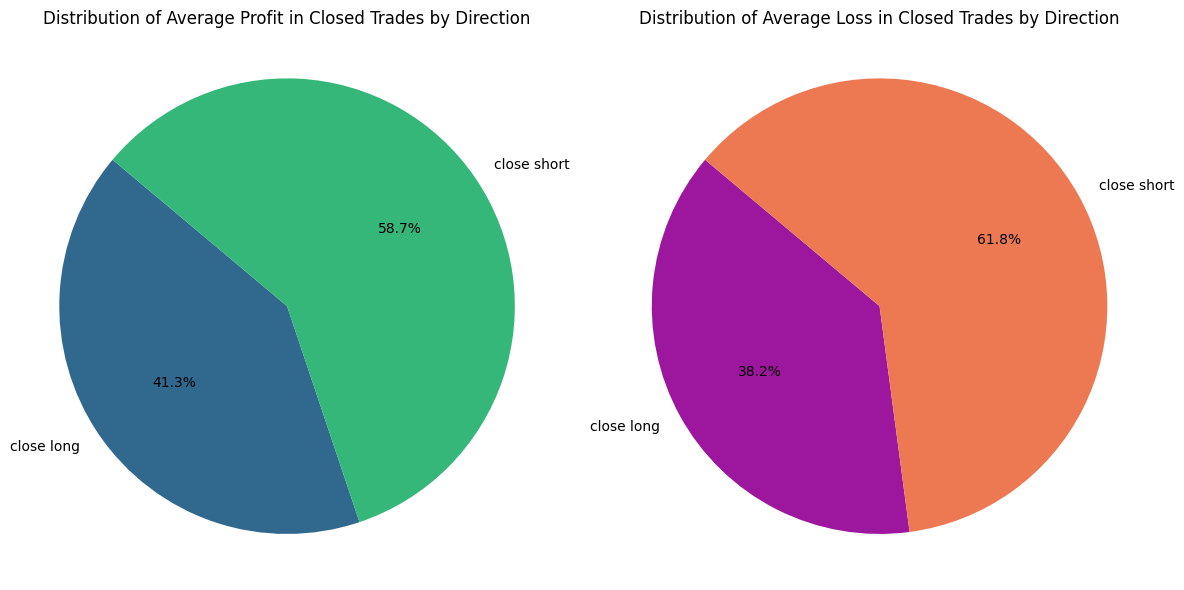

In [ ]:
# Filter for profitable trades with 'close long' or 'close short' direction
profitable_trades_closed = df[(df['PnL'] > 0) & (df['Direction'].isin(['close long', 'close short']))].copy()

# Calculate the average profit for each direction
average_profit_by_direction_closed = profitable_trades_closed.groupby('Direction')['PnL'].mean()

# Filter for losing trades with 'close long' or 'close short' direction
losing_trades_closed = df[(df['PnL'] < 0) & (df['Direction'].isin(['close long', 'close short']))].copy()

# Calculate the average loss (absolute value) for each direction
average_loss_by_direction_closed = losing_trades_closed.groupby('Direction')['PnL'].mean().abs()

# Create subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for average profit
axes[0].pie(average_profit_by_direction_closed, labels=average_profit_by_direction_closed.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(average_profit_by_direction_closed)))
axes[0].set_title('Distribution of Average Profit in Closed Trades by Direction')
axes[0].axis('equal')

# Create a pie chart for average loss
axes[1].pie(average_loss_by_direction_closed, labels=average_loss_by_direction_closed.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(average_loss_by_direction_closed)))
axes[1].set_title('Distribution of Average Loss in Closed Trades by Direction')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

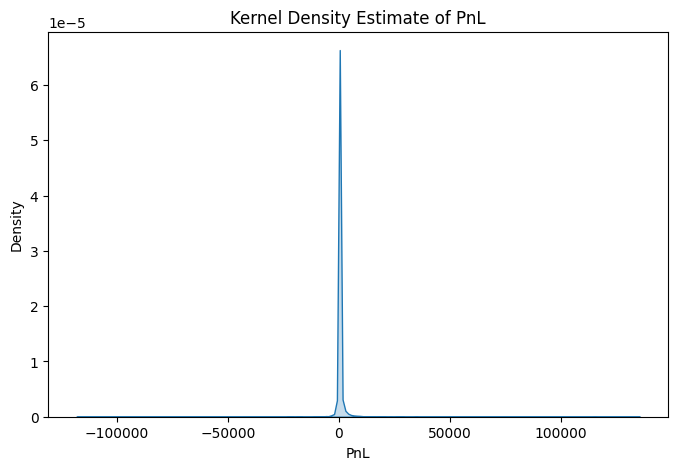

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['PnL'], fill=True)
plt.title('Kernel Density Estimate of PnL')
plt.xlabel('PnL')
plt.ylabel('Density')
plt.show()

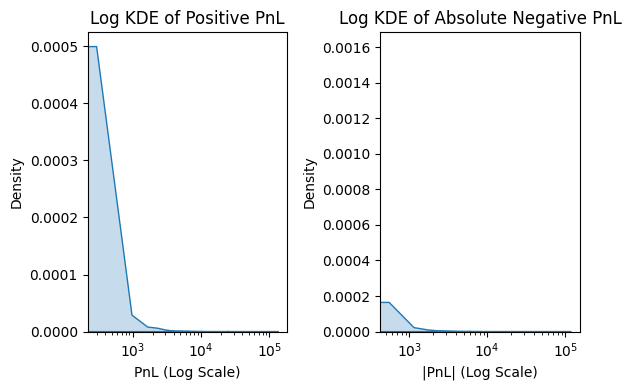

In [ ]:
import numpy as np
# Separate positive and negative PnL values
positive_pnl = df[df['PnL'] > 0]['PnL']
negative_pnl = df[df['PnL'] < 0]['PnL'].abs() # Use absolute value for log scale

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(6,4))

# KDE plot for positive PnL on a log scale
if not positive_pnl.empty:
    sns.kdeplot(positive_pnl, fill=True, ax=axes[0])
    axes[0].set_xscale('log')
    axes[0].set_title('Log KDE of Positive PnL')
    axes[0].set_xlabel('PnL (Log Scale)')
    axes[0].set_ylabel('Density')
else:
    axes[0].set_title('Log KDE of Positive PnL (No data)')
    axes[0].axis('off')

# KDE plot for absolute negative PnL on a log scale
if not negative_pnl.empty:
    sns.kdeplot(negative_pnl, fill=True, ax=axes[1])
    axes[1].set_xscale('log')
    axes[1].set_title('Log KDE of Absolute Negative PnL')
    axes[1].set_xlabel('|PnL| (Log Scale)')
    axes[1].set_ylabel('Density')
else:
    axes[1].set_title('Log KDE of Absolute Negative PnL (No data)')
    axes[1].axis('off')

plt.tight_layout()
plt.show()